# The Office Story: That's what the data said 

# Analysis and Visualization of the show's dialogues and ratings dataset 

(a) Performed data pre-processing, feature engineering and data analysis on a dataset having every dialogue from the popular American TV series “The Office” to summarize character stats, relationships and their influence on the popularity and success of the show (in terms of ratings and votes), presented through interactive visualizations. 

(b) Goal - To determine what kind of questions can be answered from the show's script and ratings data analysis that can lead the makers to better data-driven decisions while investing in a season revival/reboot using pandas, plotly, d3graph and chord packages.

(c) Two datasets are used - The dialogues dataset from theofficequotes.net and IMDB ratings dataset from Kaggle.

This project is organized as follows: 
<br>1) EDA(Understanding each variable of the dataset and analyzing relationships between variables); 
<br>2) Data pre-processing(cleaning);
<br>3) Data Visualization(Analysis and Insights)- 6 pointers.

Author: Swarnita Venkatraman

Date: 15/12/2020

## 1) EDA 

## 1a) EDA for Dialogues dataset (df) 

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np

#reading file 1- dialogues dataset
df = pd.read_excel("the-office-lines.xlsx")

In [2]:
df.head()

id  season  episode  scene  \
0   1       1        1      1   
1   2       1        1      1   
2   3       1        1      1   
3   4       1        1      1   
4   5       1        1      1   

                                           line_text  speaker  deleted  
0  All right Jim. Your quarterlies look very good...  Michael    False  
1         Oh, I told you. I couldn't close it. So...      Jim    False  
2  So you've come to the master for guidance? Is ...  Michael    False  
3         Actually, you called me in here, but yeah.      Jim    False  
4    All right. Well, let me show you how it's done.  Michael    False

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59909 entries, 0 to 59908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         59909 non-null  int64 
 1   season     59909 non-null  int64 
 2   episode    59909 non-null  int64 
 3   scene      59909 non-null  int64 
 4   line_text  59909 non-null  object
 5   speaker    59909 non-null  object
 6   deleted    59909 non-null  bool  
dtypes: bool(1), int64(4), object(2)
memory usage: 2.8+ MB


In [4]:
df.shape

(59909, 7)

In [5]:
#column names
column_names = df.columns
print(column_names)
#column data types
df.dtypes
#check if the column is unique
for i in column_names:
  print('{} is unique: {}'.format(i, df[i].is_unique))

Index(['id', 'season', 'episode', 'scene', 'line_text', 'speaker', 'deleted'], dtype='object')
id is unique: True
season is unique: False
episode is unique: False
scene is unique: False
line_text is unique: False
speaker is unique: False
deleted is unique: False


### EXPLORING DELETED SCENES DATA (column - "deleted")

In [6]:
df['deleted'].value_counts()#57973 lines spoken in the non-deleted scenes throughout the show

False    57973
True      1936
Name: deleted, dtype: int64

In [7]:
df[df['deleted']==True] #deleted scenes data - present from season 1 to season 3

id  season  episode  scene  \
229      230       1        1     40   
230      231       1        1     40   
231      232       1        1     40   
232      233       1        1     41   
233      234       1        1     41   
...      ...     ...      ...    ...   
13320  13321       3       12     40   
13321  13322       3       12     40   
13322  13323       3       12     40   
13323  13324       3       12     40   
13324  13325       3       12     40   

                                               line_text  speaker  deleted  
229    Dwight Schrute. My father's name, also Dwight ...   Dwight     True  
230    [holding up a Dundie and pretending it is talk...  Michael     True  
231    My name is Jim Halpert and I am a sales rep, w...      Jim     True  
232    Pam! Pam-Pam! Pam has been with us for...  for...  Michael     True  
233                                             I guess.      Pam     True  
...                                                  ...      ...      ...  
13320                Yeah. Can I see it when I get back?      Jim     True  
13321                                              Yeah.      Pam     True  
13322                                   Congratulations.      Jim     True  
13323                                            Thanks.      Pam     True  
13324                                          Big deal.      Jim     True  

[1936 rows x 7 columns]

In [8]:
#isolating only single scenes wise data
df_del=df.drop_duplicates(['season','episode','scene','deleted'])
df_del

id  season  episode  scene  \
0          1       1        1      1   
5          6       1        1      2   
6          7       1        1      3   
15        16       1        1      4   
16        17       1        1      5   
...      ...     ...      ...    ...   
59904  59905       9       23    112   
59905  59906       9       23    113   
59906  59907       9       23    114   
59907  59908       9       23    115   
59908  59909       9       23    116   

                                               line_text   speaker  deleted  
0      All right Jim. Your quarterlies look very good...   Michael    False  
5      [on the phone] Yes, I'd like to speak to your ...   Michael    False  
6      I've, uh, I've been at Dunder Mifflin for 12 y...   Michael    False  
15     People say I am the best boss. They go, 'God w...   Michael    False  
16     [singing] Shall I play for you? Pa rum pump um...    Dwight    False  
...                                                  ...       ...      ...  
59904  It all seems so very arbitrary. I applied for ...     Creed    False  
59905  I just feel lucky that I got a chance to share...  Meredith    False  
59906  I���m happy that this was all filmed so I can ...   Phyllis    False  
59907  I sold paper at this company for 12 years. My ...       Jim    False  
59908  I thought it was weird when you picked us to m...       Pam    False  

[9161 rows x 7 columns]

In [9]:
df_del.groupby('season')['deleted'].value_counts().to_dict()#season wise breakdown

{(1, False): 238,
 (1, True): 68,
 (2, False): 1053,
 (2, True): 239,
 (3, False): 1386,
 (3, True): 5,
 (4, False): 882,
 (5, False): 1130,
 (6, False): 1023,
 (7, False): 1002,
 (8, False): 1027,
 (9, False): 1108}

In [10]:
df_del.groupby('season')['deleted'].value_counts().tolist()

[238, 68, 1053, 239, 1386, 5, 882, 1130, 1023, 1002, 1027, 1108]

In [11]:
df_del['deleted'].value_counts().values #8849 non-deleted scenes, 312 deleted scenes

array([8849,  312], dtype=int64)

##### Visualizing percent of deleted scenes :

In [13]:
import numpy as np
import plotly.graph_objects as go

labels=['Not deleted','Deleted']
values=df_del['deleted'].value_counts().values

colors = ['rgb(33, 75, 99)', 'brickred']

fig1 = go.Figure(data=[go.Pie(labels=labels, values=values, 
                             text = [[238, 1053,1386, 882, 1130, 1023, 1002, 1027, 1108],[68,239,5]],
                             customdata=np.array(("1-9","1-3")),
                             hovertemplate = "%{value} scenes distributed between <br>Seasons %{customdata[0]} as %{text}<extra></extra> ")])

fig1.update_traces(textfont_size=14,textposition='outside', textinfo='label+percent',
                  marker=dict(colors=colors, line=dict(color='#000000', width=1.5)))

fig1.update_layout(
        
    hoverlabel_align = 'left',
    width=1000,height=500,
    showlegend=False,
    autosize=False,    


    title={
        'text': "The Office - Distribution of deleted scenes",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    })
fig1.show()

After visualizing using a pie chart, I used a Sunburst chart since I also wanted to visualize season-wise number of deleted scenes.

In [14]:
import plotly.graph_objects as go
from chart_studio import plotly
from plotly.offline import plot

fig2 =go.Figure(go.Sunburst(
     ids=[
    "Deleted", "Not deleted", "Deleted-Season 1", "Deleted-Season 2", "Deleted-Season 3",
    "Not deleted - Season 1", "Not deleted - Season 2", "Not deleted - Season 3",
    "Not deleted - Season 4","Not deleted - Season 5", "Not deleted - Season 6",
    "Not deleted - Season 7", "Not deleted - Season 8", "Not deleted - Season 9"
  ],

  labels= ["Deleted", "Not deleted", "Season 1", "Season 2","Season 3","Season 1", "Season 2", "Season 3",
      "Season 4","Season 5","Season 6","Season 7","Season 8","Season 9"
  ],
  parents=[
    "", "", "Deleted", "Deleted","Deleted","Not deleted","Not deleted","Not deleted",
    "Not deleted","Not deleted","Not deleted","Not deleted","Not deleted","Not deleted"  
  ],
  values= [312, 8849, 68, 239, 5, 238, 1053,1386, 882, 1130, 1023, 1002, 1027, 1108],
    branchvalues="total"
))


colors = ['rgb(175, 51, 21)','rgb(56, 75, 126)']
 
fig2.update_traces(textfont_size=12,textinfo='label+percent parent',text=['scenes']*14,hoverinfo='value+text',
                  marker_colors=colors,
                  marker=dict(line=dict(color='#000000', width=1.5)))
fig2.update_layout(
         annotations=[
            dict(
                text='Click on any of center slices to expand.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=0.9,
                y=0.01,
                #bordercolor='blue',
                #borderwidth=0.6,
                font=dict(
                family="Arial",
                size=12,
            ),    
            ),    
    
        ],
        margin = dict(t=10, l=0, r=0, b=10),
        hoverlabel_align = 'left',
        width=1000,height=550,
        showlegend=False,
    title={
        'text': "The Office - Distribution of deleted scenes",
        'y':0.99,
        'x':0.01,
        'xanchor': 'left',
        'yanchor': 'top'    })
fig2.show()

The show has 9 seasons in total. As seen from the percentage value, number of non-deleted scenes are almost evenly distributed among all seasons except season 1 where it is lowest and season 3 where it is highest. This dataset has deleted scenes only upto season 3. Highest chunk of deleted scenes belong to season 2.

##### Filtering out deleted scenes :


In [15]:
df = df[df['deleted'] == False] 

In [16]:
df.head()

id  season  episode  scene  \
0   1       1        1      1   
1   2       1        1      1   
2   3       1        1      1   
3   4       1        1      1   
4   5       1        1      1   

                                           line_text  speaker  deleted  
0  All right Jim. Your quarterlies look very good...  Michael    False  
1         Oh, I told you. I couldn't close it. So...      Jim    False  
2  So you've come to the master for guidance? Is ...  Michael    False  
3         Actually, you called me in here, but yeah.      Jim    False  
4    All right. Well, let me show you how it's done.  Michael    False

In [17]:
df.shape

(57973, 7)

### Dropping columns "id" and "deleted" 

In [18]:
# Create list of the columns to drop
columns_to_drop = [column_names[i] for i in [0, 6]]
# Drop unwanted columns
df.drop(columns_to_drop, inplace=True, axis=1)

In [19]:
df.head()

season  episode  scene                                          line_text  \
0       1        1      1  All right Jim. Your quarterlies look very good...   
1       1        1      1         Oh, I told you. I couldn't close it. So...   
2       1        1      1  So you've come to the master for guidance? Is ...   
3       1        1      1         Actually, you called me in here, but yeah.   
4       1        1      1    All right. Well, let me show you how it's done.   

   speaker  
0  Michael  
1      Jim  
2  Michael  
3      Jim  
4  Michael

### Checking if there are any missing values 

In [20]:
df.isnull().sum()

season       0
episode      0
scene        0
line_text    0
speaker      0
dtype: int64

### EXPLORING EPISODES DATA (column = "episode")

##### Number of episodes per season:

In [21]:
df.groupby('season')['episode'].nunique()

season
1     6
2    22
3    23
4    14
5    26
6    24
7    24
8    24
9    23
Name: episode, dtype: int64

In [29]:
seasons=df['season'].unique().tolist() #storing seasons in a list

In [30]:
episodes=df.groupby('season')['episode'].nunique().tolist() #storing number of episodes season-wise in a list

In [551]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Lines', x=seasons, y=episodes),
])
fig.update_layout(title="Season-wise episodes distribution")
fig.update_xaxes(title="Season")
fig.update_yaxes(title="Number of episodes")
fig.show()

Season 5 has highest number of episodes while season 1 has lowest. Season 4 has only 14 episodes as the show had to stop production in November 2007 due to a writer’s strike when it was being shot.

### EXPLORING SCENES DATA(column - "scene")

##### Number of scenes per season:

In [32]:
df_scenes = df.sort_values(['season','episode','scene']).drop_duplicates(['season','episode','scene'],keep='first')
df_scenes

season  episode  scene  \
0           1        1      1   
5           1        1      2   
6           1        1      3   
15          1        1      4   
16          1        1      5   
...       ...      ...    ...   
59904       9       23    112   
59905       9       23    113   
59906       9       23    114   
59907       9       23    115   
59908       9       23    116   

                                               line_text   speaker  
0      All right Jim. Your quarterlies look very good...   Michael  
5      [on the phone] Yes, I'd like to speak to your ...   Michael  
6      I've, uh, I've been at Dunder Mifflin for 12 y...   Michael  
15     People say I am the best boss. They go, 'God w...   Michael  
16     [singing] Shall I play for you? Pa rum pump um...    Dwight  
...                                                  ...       ...  
59904  It all seems so very arbitrary. I applied for ...     Creed  
59905  I just feel lucky that I got a chance to share...  Meredith  
59906  I���m happy that this was all filmed so I can ...   Phyllis  
59907  I sold paper at this company for 12 years. My ...       Jim  
59908  I thought it was weird when you picked us to m...       Pam  

[8849 rows x 5 columns]

In [33]:
df_scenes.groupby(['season','episode'])['scene'].count()

season  episode
1       1           39
        2           35
        3           39
        4           49
        5           40
                  ... 
9       19          49
        20          46
        21          53
        22          70
        23         116
Name: scene, Length: 186, dtype: int64

In [34]:
df_scenes.groupby(['season','episode'])['scene'].count().nlargest()
#largest from season 4 cus it had lesser episodes hence more scenes maybe

season  episode
5       1          116
9       23         116
4       14         103
        1           92
        4           92
Name: scene, dtype: int64

In [35]:
df_scenes.groupby(['season','episode'])['scene'].count().nsmallest()

season  episode
6       13         21
8       20         25
7       14         26
        16         26
5       12         27
Name: scene, dtype: int64

In [36]:
ff = df_scenes.pivot_table(index='season', columns='episode', values='scene',aggfunc='count')
ff.head()

episode     1     2     3     4     5     6     7     8     9     10  ...  \
season                                                                ...   
1         39.0  35.0  39.0  49.0  40.0  36.0   NaN   NaN   NaN   NaN  ...   
2         62.0  45.0  50.0  53.0  43.0  37.0  44.0  41.0  38.0  70.0  ...   
3         61.0  51.0  66.0  55.0  60.0  52.0  51.0  76.0  32.0  88.0  ...   
4         92.0  80.0  90.0  92.0  46.0  50.0  61.0  46.0  31.0  49.0  ...   
5        116.0  30.0  49.0  50.0  54.0  51.0  36.0  29.0  30.0  49.0  ...   

episode    17    18    19    20    21    22    23    24    25    26  
season                                                               
1         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2        45.0  44.0  42.0  39.0  59.0  57.0   NaN   NaN   NaN   NaN  
3        61.0  57.0  59.0  75.0  60.0  77.0  88.0   NaN   NaN   NaN  
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
5        32.0  35.0  46.0  40.0  39.0  46.0  32.0  35.0  54.0  42.0  

[5 rows x 26 columns]

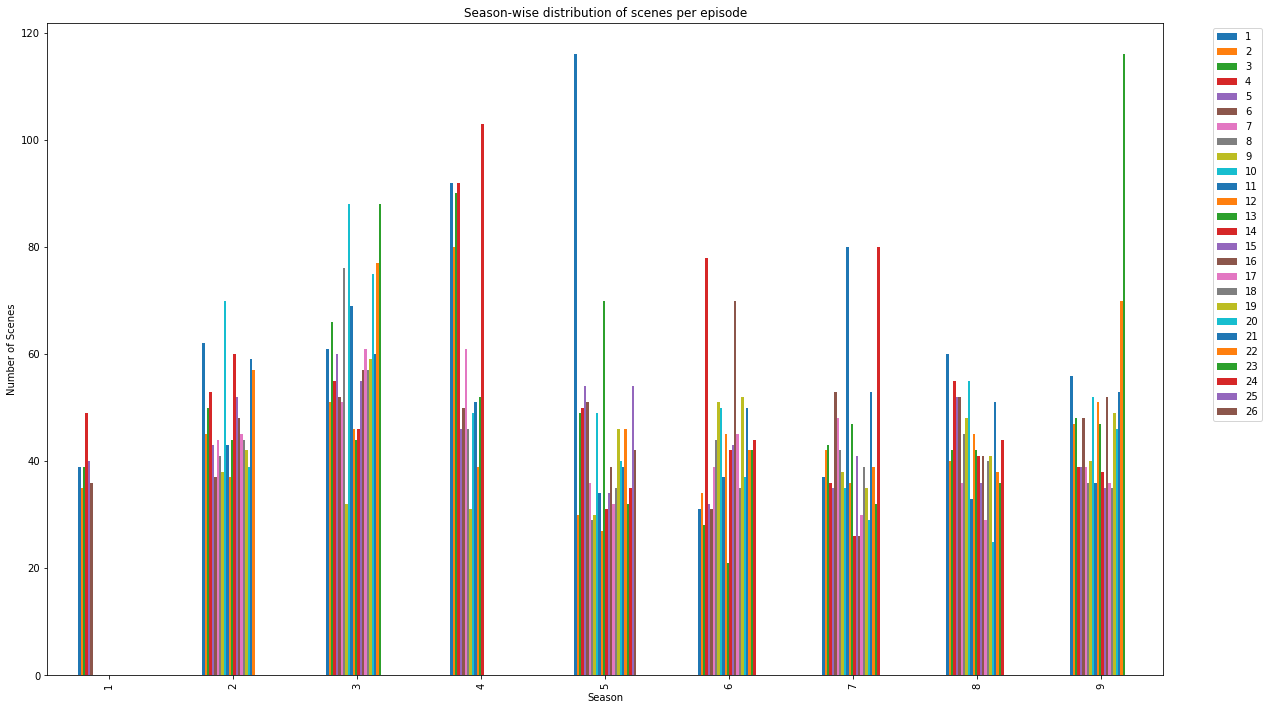

In [37]:
import matplotlib.pyplot as plt
ff.plot(kind='bar',figsize=(20,12),title="Season-wise distribution of scenes per episode")
plt.xlabel('Season')
plt.ylabel('Number of Scenes')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [38]:
df_scenes_t=ff.sum(axis=1)
df_scenes_t

season
1     238.0
2    1053.0
3    1386.0
4     882.0
5    1130.0
6    1023.0
7    1002.0
8    1027.0
9    1108.0
dtype: float64

<AxesSubplot:xlabel='season'>

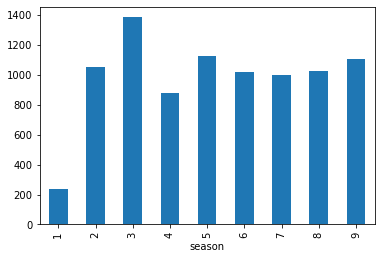

In [39]:
df_scenes_t.plot(kind='bar')

Season 3 has overall highest number of scenes followed by Season 5. Seasons 1 and 4 comparatively have lesser scenes owing to lesser number of episodes.  Also as confirmed from non-deleted scenes distribution. Highest peaks seen during seasons 5 and 9.

### EXPLORING LINES DATA (column - "line_text")

##### Number of lines per season:

In [43]:
df.groupby(['season','episode'])['line_text'].count()

season  episode
1       1          229
        2          217
        3          244
        4          265
        5          235
                  ... 
9       19         273
        20         234
        21         382
        22         501
        23         522
Name: line_text, Length: 186, dtype: int64

In [44]:
df.groupby(['season','episode'])['line_text'].count().nlargest() #again season 4 features here thrice in top 5

season  episode
6       16         625
4       14         617
        2          615
7       11         598
4       3          597
Name: line_text, dtype: int64

In [45]:
df.groupby(['season','episode'])['line_text'].count().nsmallest()

season  episode
7       16          72
6       13         131
3       1          173
        15         180
        9          191
Name: line_text, dtype: int64

In [46]:
df.groupby('season')['line_text'].count().sum() #total number of lines spoken in the show

57973

In [47]:
fff = df.pivot_table(index='season', columns='episode', values='line_text',aggfunc='count')
fff

episode     1      2      3      4      5      6      7      8      9      10  \
season                                                                          
1        229.0  217.0  244.0  265.0  235.0  346.0    NaN    NaN    NaN    NaN   
2        279.0  283.0  287.0  319.0  276.0  278.0  254.0  284.0  275.0  292.0   
3        173.0  335.0  291.0  313.0  312.0  279.0  260.0  584.0  191.0  547.0   
4        560.0  615.0  597.0  557.0  269.0  324.0  274.0  300.0  331.0  276.0   
5        569.0  265.0  311.0  311.0  435.0  417.0  325.0  298.0  323.0  240.0   
6        332.0  268.0  303.0  552.0  353.0  315.0  319.0  367.0  247.0  267.0   
7        240.0  268.0  229.0  321.0  390.0  284.0  286.0  278.0  307.0  310.0   
8        274.0  320.0  317.0  267.0  291.0  324.0  321.0  282.0  299.0  352.0   
9        225.0  296.0  243.0  316.0  292.0  283.0  294.0  322.0  287.0  253.0   

episode  ...     17     18     19     20     21     22     23     24     25  \
season   ...                                                                  
1        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2        ...  220.0  267.0  250.0  213.0  257.0  385.0    NaN    NaN    NaN   
3        ...  340.0  356.0  386.0  398.0  323.0  365.0  544.0    NaN    NaN   
4        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5        ...  311.0  297.0  267.0  309.0  256.0  298.0  288.0  319.0  298.0   
6        ...  279.0  281.0  359.0  267.0  328.0  308.0  326.0  245.0    NaN   
7        ...  313.0  290.0  244.0  262.0  329.0  265.0  257.0  494.0    NaN   
8        ...  259.0  264.0  261.0  307.0  292.0  239.0  288.0  295.0    NaN   
9        ...  219.0  318.0  273.0  234.0  382.0  501.0  522.0    NaN    NaN   

episode     26  
season          
1          NaN  
2          NaN  
3          NaN  
4          NaN  
5        273.0  
6          NaN  
7          NaN  
8          NaN  
9          NaN  

[9 rows x 26 columns]

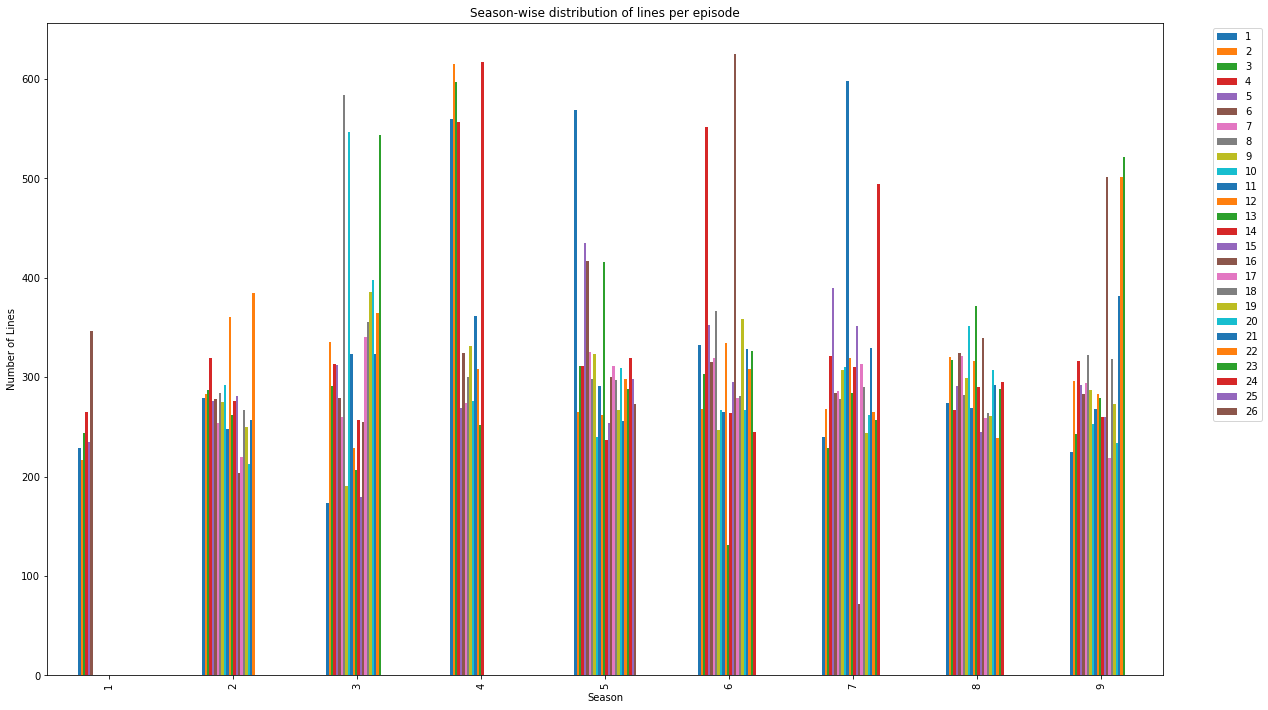

In [48]:
fff.plot(kind='bar',figsize=(20,12),title="Season-wise distribution of lines per episode")
plt.xlabel('Season')
plt.ylabel('Number of Lines')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [49]:
df.groupby('season')['line_text'].count()

season
1    1536
2    6051
3    7448
4    5642
5    8170
6    7630
7    7302
8    7083
9    7111
Name: line_text, dtype: int64

<AxesSubplot:xlabel='season'>

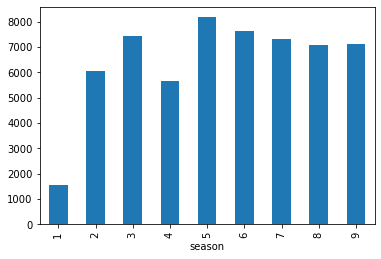

In [50]:
df.groupby('season')['line_text'].count().plot(kind='bar')

Season 5 (with the highest episodes) had the highest number of lines followed by season 6. Although season 3 had the highest number of scenes it appears third on the list of highest number of lines. Confirms that more scenes does not necessarily mean more lines in a season.

### EXPLORING SPEAKERS DATA (column - "speaker")

In [51]:
df['speaker'].nunique()

790

In [52]:
df.groupby('season')['speaker'].nunique()

season
1     31
2    125
3    120
4    117
5    145
6    151
7    155
8    136
9    194
Name: speaker, dtype: int64

<AxesSubplot:xlabel='season'>

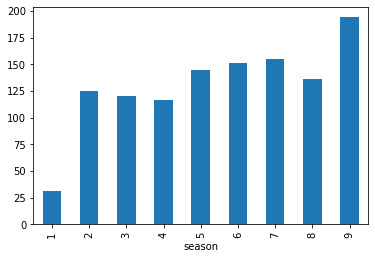

In [53]:
df.groupby('season')['speaker'].nunique().plot(kind='bar')

In [54]:
df['speaker'].value_counts()#max lines

Michael                       11574
Dwight                         7167
Jim                            6609
Pam                            5205
Andy                           3968
                              ...  
Drummer                           1
Offscreen                         1
Amanda                            1
Michael, Holly, and Darryl        1
Philip                            1
Name: speaker, Length: 790, dtype: int64

Season 9 has the highest number of unique speakers probably because it was the last season, season 7 comes second. Top 5 characters with maximum lines include Michael,Dwight,Jim,Pam and Andy.

##### Number of scenes each character appeared in every season:

In [55]:
dff1 = df.sort_values(['season','episode','scene']).drop_duplicates(['season','episode','scene','speaker'],keep='first')
dff1#singled out every character's appearance per scene

season  episode  scene  \
0           1        1      1   
1           1        1      1   
5           1        1      2   
6           1        1      3   
7           1        1      3   
...       ...      ...    ...   
59904       9       23    112   
59905       9       23    113   
59906       9       23    114   
59907       9       23    115   
59908       9       23    116   

                                               line_text   speaker  
0      All right Jim. Your quarterlies look very good...   Michael  
1             Oh, I told you. I couldn't close it. So...       Jim  
5      [on the phone] Yes, I'd like to speak to your ...   Michael  
6      I've, uh, I've been at Dunder Mifflin for 12 y...   Michael  
7                                    Well. I don't know.       Pam  
...                                                  ...       ...  
59904  It all seems so very arbitrary. I applied for ...     Creed  
59905  I just feel lucky that I got a chance to share...  Meredith  
59906  I���m happy that this was all filmed so I can ...   Phyllis  
59907  I sold paper at this company for 12 years. My ...       Jim  
59908  I thought it was weird when you picked us to m...       Pam  

[21016 rows x 5 columns]

In [56]:
df_char_scene = dff1.pivot_table(index='speaker', columns=['season','episode'], values='scene',aggfunc='count')
#applying threshold of min 19 episodes to include characters appearing in atleast 10% of total 186 episodes
df_char_scene=df_char_scene.dropna(axis=0,how='any',thresh=19)
df_char_scene

season       1                                   2                    ...  \
episode     1     2     3     4     5     6     1     2     3     4   ...   
speaker                                                               ...   
All        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Andy       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Angela     1.0   1.0   3.0   4.0   2.0   1.0   2.0   1.0   3.0   4.0  ...   
Clark      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Creed      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Darryl     NaN   NaN   NaN   NaN   7.0   NaN   1.0   2.0   NaN   NaN  ...   
David      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Dwight    10.0   6.0  16.0  24.0   9.0   7.0  13.0   5.0  20.0  20.0  ...   
Erin       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Everyone   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN  ...   
Gabe       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Jan        3.0   NaN   2.0   NaN   NaN   1.0   1.0   4.0   NaN   NaN  ...   
Jim       11.0  11.0  11.0  21.0  13.0   9.0  16.0   8.0  22.0  14.0  ...   
Karen      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Kelly      NaN   2.0   NaN   NaN   NaN   NaN   4.0   NaN   NaN   2.0  ...   
Kevin      1.0   5.0   4.0   2.0   1.0   2.0   1.0   3.0   4.0   4.0  ...   
Meredith   NaN   NaN   2.0   3.0   NaN   NaN   NaN   1.0   1.0   3.0  ...   
Michael   20.0  25.0  19.0  19.0  31.0  21.0  36.0  26.0  22.0  26.0  ...   
Nellie     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Oscar      3.0   2.0   5.0   4.0   2.0   1.0   3.0   NaN   5.0   2.0  ...   
Pam       14.0   7.0  10.0  10.0   6.0  11.0  22.0  13.0  12.0   9.0  ...   
Pete       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Phyllis    2.0   NaN   NaN   2.0   3.0   NaN   5.0   2.0   2.0   3.0  ...   
Robert     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Roy        2.0   NaN   NaN   1.0   8.0   2.0   3.0   3.0   NaN   2.0  ...   
Ryan       5.0   1.0   1.0   2.0   5.0   4.0   2.0   1.0   3.0  18.0  ...   
Stanley    2.0   2.0   5.0   2.0   1.0   1.0   3.0   1.0   3.0   4.0  ...   
Toby       NaN   1.0   NaN   2.0   NaN   1.0   NaN  10.0   NaN   NaN  ...   

season       9                                                        
episode     14    15    16    17    18    19    20    21    22    23  
speaker                                                               
All        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   9.0  
Andy       NaN  11.0  19.0   3.0   6.0  12.0  12.0  20.0   9.0  15.0  
Angela     6.0   2.0   7.0   4.0  11.0   2.0  11.0   8.0   9.0   9.0  
Clark      1.0   5.0   3.0   3.0   7.0  12.0   4.0   3.0   3.0   3.0  
Creed      1.0   NaN   2.0   3.0   NaN   1.0   1.0   2.0   3.0   6.0  
Darryl     9.0   2.0   3.0   1.0   4.0   NaN   6.0   2.0   9.0  10.0  
David      NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Dwight    11.0   9.0   8.0  18.0   8.0  19.0  10.0  13.0  30.0  27.0  
Erin       7.0  10.0   8.0   4.0   3.0   7.0   9.0   5.0   9.0   6.0  
Everyone   NaN   NaN   NaN   NaN   NaN   2.0   NaN   NaN   1.0   NaN  
Gabe       NaN   NaN   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Jan        NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Jim        7.0   7.0   4.0   3.0   4.0   5.0   7.0  16.0  23.0  33.0  
Karen      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Kelly      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   5.0  
Kevin      4.0   4.0   3.0   6.0   6.0   2.0   4.0   9.0  11.0  14.0  
Meredith   1.0   2.0   3.0   3.0   3.0   2.0   NaN   1.0   6.0   9.0  
Michael    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0  
Nellie     5.0   4.0   3.0   2.0   4.0   6.0  10.0   3.0   NaN   5.0  
Oscar      8.0   5.0   4.0   5.0   9.0   5.0   1.0

In [57]:
df_scene_total=df_char_scene.sum(level=[0],axis=1)
df_scene_total

season        1      2      3      4      5      6      7      8      9
speaker                                                                
All         0.0    1.0    1.0    4.0    2.0    2.0   13.0   14.0   14.0
Andy        0.0    0.0  155.0   95.0  171.0  194.0  202.0  342.0  182.0
Angela     12.0   71.0  126.0   77.0   95.0   66.0   77.0   80.0  134.0
Clark       0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   91.0
Creed       0.0   28.0   50.0   35.0   37.0   31.0   40.0   29.0   43.0
Darryl      7.0   21.0   21.0   20.0   36.0   30.0   94.0  125.0  116.0
David       0.0    5.0   15.0    1.0   31.0   23.0    1.0    5.0    5.0
Dwight     72.0  289.0  363.0  189.0  306.0  273.0  226.0  315.0  333.0
Erin        0.0    0.0    0.0    0.0   20.0  122.0  132.0  180.0  160.0
Everyone    0.0    2.0    5.0    4.0    4.0   10.0    1.0   11.0   12.0
Gabe        0.0    0.0    0.0    0.0    0.0   33.0   82.0   63.0    3.0
Jan         6.0   60.0   69.0   48.0   21.0    0.0    5.0    0.0    5.0
Jim        76.0  263.0  268.0  224.0  276.0  273.0  236.0  291.0  243.0
Karen       0.0    0.0  129.0    9.0    5.0    0.0    1.0    0.0    0.0
Kelly       2.0   48.0   74.0   43.0   69.0   54.0   75.0   64.0    7.0
Kevin      15.0   82.0  119.0   72.0   94.0  106.0  116.0  137.0  132.0
Meredith    5.0   25.0   39.0   25.0   55.0   52.0   46.0   52.0   73.0
Michael   135.0  541.0  601.0  418.0  506.0  478.0  347.0    0.0    2.0
Nellie      0.0    0.0    0.0    0.0    0.0    0.0    2.0   83.0  126.0
Oscar      17.0   58.0   43.0   64.0   98.0   88.0   86.0  118.0  145.0
Pam        58.0  260.0  270.0  216.0  255.0  225.0  218.0  173.0  246.0
Pete        0.0    0.0    0.0    0.0    4.0    2.0    0.0    0.0   77.0
Phyllis     7.0   55.0   68.0   55.0   98.0   83.0   88.0   88.0   80.0
Robert      0.0    0.0    0.0    0.0    0.0    0.0    7.0  124.0    4.0
Roy        13.0   31.0   34.0    0.0    2.0    0.0    0.0    0.0    3.0
Ryan       18.0   82.0   96.0   63.0   66.0   48.0   76.0   85.0    6.0
Stanley    13.0   47.0   60.0   43.0   71.0   48.0   52.0   68.0   63.0
Toby        4.0   47.0   51.0   58.0   25.0   36.0   45.0   44.0   48.0

In [572]:
dff1['speaker'].value_counts()

Michael               3033
Dwight                2367
Jim                   2150
Pam                   1922
Andy                  1341
                      ... 
Emergency Operator       1
Tech Guy                 1
Warren Buffet            1
Nail stylist 1           1
Officer 1                1
Name: speaker, Length: 699, dtype: int64

Top 5 characters with maximum scenes include Michael,Dwight,Jim,Pam and Andy.

In [58]:
#function that plots scenes for the given character
def name_plot(speaker):
    data = df_scene_total.loc[speaker]
    plt.plot(data.index,data.values)

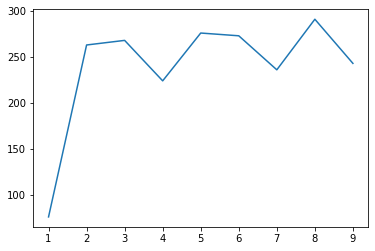

In [59]:
name_plot('Jim')

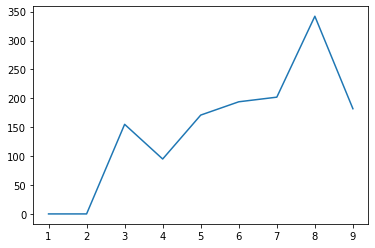

In [60]:
name_plot('Andy')

In [61]:
#function that returns particular season scenes value for given char
def season_scene_no(speaker,season):
    return len(dff1[(dff1['speaker']==speaker)& (dff1['season']==season)])

In [62]:
season_scene_no('Pam',8)

173

In [63]:
season_scene_no('Creed',5)

37

In [64]:
#transposing pivot table
df_scene_total_trans=df_scene_total.transpose()
df_scene_total_trans

speaker   All   Andy  Angela  Clark  Creed  Darryl  David  Dwight   Erin  \
season                                                                     
1         0.0    0.0    12.0    0.0    0.0     7.0    0.0    72.0    0.0   
2         1.0    0.0    71.0    0.0   28.0    21.0    5.0   289.0    0.0   
3         1.0  155.0   126.0    0.0   50.0    21.0   15.0   363.0    0.0   
4         4.0   95.0    77.0    0.0   35.0    20.0    1.0   189.0    0.0   
5         2.0  171.0    95.0    0.0   37.0    36.0   31.0   306.0   20.0   
6         2.0  194.0    66.0    1.0   31.0    30.0   23.0   273.0  122.0   
7        13.0  202.0    77.0    0.0   40.0    94.0    1.0   226.0  132.0   
8        14.0  342.0    80.0    0.0   29.0   125.0    5.0   315.0  180.0   
9        14.0  182.0   134.0   91.0   43.0   116.0    5.0   333.0  160.0   

speaker  Everyone  ...  Nellie  Oscar    Pam  Pete  Phyllis  Robert   Roy  \
season             ...                                                      
1             0.0  ...     0.0   17.0   58.0   0.0      7.0     0.0  13.0   
2             2.0  ...     0.0   58.0  260.0   0.0     55.0     0.0  31.0   
3             5.0  ...     0.0   43.0  270.0   0.0     68.0     0.0  34.0   
4             4.0  ...     0.0   64.0  216.0   0.0     55.0     0.0   0.0   
5             4.0  ...     0.0   98.0  255.0   4.0     98.0     0.0   2.0   
6            10.0  ...     0.0   88.0  225.0   2.0     83.0     0.0   0.0   
7             1.0  ...     2.0   86.0  218.0   0.0     88.0     7.0   0.0   
8            11.0  ...    83.0  118.0  173.0   0.0     88.0   124.0   0.0   
9            12.0  ...   126.0  145.0  246.0  77.0     80.0     4.0   3.0   

speaker  Ryan  Stanley  Toby  
season                        
1        18.0     13.0   4.0  
2        82.0     47.0  47.0  
3        96.0     60.0  51.0  
4        63.0     43.0  58.0  
5        66.0     71.0  25.0  
6        48.0     48.0  36.0  
7        76.0     52.0  45.0  
8        85.0     68.0  44.0  
9         6.0     63.0  48.0  

[9 rows x 28 columns]

In [65]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline()

figure=df_scene_total_trans.iplot(title='Season-wise scenes distribution for characters appearing in atleast 10% episodes',
                                 xTitle='Season',yTitle='Number of scenes')

Michael appears in the highest number of scenes in every season until season 7 after which he left the show. Dwight comes second in 4 seasons(2,3,5,9),Jim in 3 seasons(1,4,7) and Andy in season 8. Jim and Dwight tie in season 6. All the supporting characters seem to follow a somewhat similar pattern over 9 seasons.

##### Number of lines each character spoke in every season:

In [66]:
df_char_lines = df.pivot_table(index='speaker', columns=['season','episode'], values='line_text',aggfunc='count')
#applying threshold of min 19 episodes to include characters appearing in atleast 10% of total 186 episodes
df_char_lines=df_char_lines.dropna(axis=0,how='any',thresh=19)
df_char_lines

season       1                                      2                     ...  \
episode     1     2     3     4      5      6      1      2     3     4   ...   
speaker                                                                   ...   
All        NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN  ...   
Andy       NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN  ...   
Angela     1.0   4.0   5.0   7.0    3.0    3.0    3.0    2.0   6.0  17.0  ...   
Clark      NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN  ...   
Creed      NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN  ...   
Darryl     NaN   NaN   NaN   NaN   15.0    NaN    1.0    9.0   NaN   NaN  ...   
David      NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN  ...   
Dwight    29.0  19.0  62.0  58.0   26.0   28.0   39.0   11.0  58.0  65.0  ...   
Erin       NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN  ...   
Everyone   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   1.0   NaN  ...   
Gabe       NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN  ...   
Jan       12.0   NaN  18.0   NaN    NaN    8.0    9.0   11.0   NaN   NaN  ...   
Jim       36.0  27.0  42.0  49.0   22.0   55.0   33.0   16.0  56.0  51.0  ...   
Karen      NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN  ...   
Kelly      NaN   2.0   NaN   NaN    NaN    NaN    8.0    NaN   NaN   4.0  ...   
Kevin      1.0   8.0   6.0   3.0    1.0    5.0    1.0    6.0   9.0   5.0  ...   
Meredith   NaN   NaN   3.0  10.0    NaN    NaN    NaN    1.0   1.0   4.0  ...   
Michael   81.0  81.0  56.0  79.0  106.0  106.0  106.0  100.0  83.0  69.0  ...   
Nellie     NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN  ...   
Oscar      3.0  13.0   9.0  14.0    2.0    1.0    4.0    NaN  10.0   4.0  ...   
Pam       41.0  16.0  32.0  22.0   14.0   45.0   41.0   27.0  35.0  22.0  ...   
Pete       NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN  ...   
Phyllis    2.0   NaN   NaN   5.0    4.0    NaN   10.0    6.0   2.0   6.0  ...   
Robert     NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN  ...   
Roy        5.0   NaN   NaN   3.0   12.0   14.0    6.0   14.0   NaN   6.0  ...   
Ryan       8.0   4.0   1.0   4.0    8.0   12.0    2.0    1.0   5.0  40.0  ...   
Stanley    5.0   5.0   6.0   2.0    3.0    3.0    8.0    1.0   3.0   5.0  ...   
Toby       NaN   2.0   NaN   4.0    NaN    7.0    NaN   26.0   NaN   NaN  ...   

season       9                                                        
episode     14    15    16    17    18    19    20    21    22    23  
speaker                                                               
All        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  10.0  
Andy       NaN  62.0  83.0   5.0  11.0  31.0  39.0  68.0  44.0  31.0  
Angela    15.0   4.0  42.0   8.0  32.0   4.0  16.0  30.0  39.0  23.0  
Clark      4.0   9.0   9.0   5.0  23.0  37.0   6.0   8.0   5.0   3.0  
Creed      1.0   NaN   4.0   3.0   NaN   2.0   1.0   2.0   4.0   8.0  
Darryl    35.0   3.0   5.0   1.0  12.0   NaN  10.0  11.0  30.0  19.0  
David      NaN   NaN  15.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Dwight    37.0  32.0  44.0  51.0  37.0  61.0  21.0  54.0  87.0  76.0  
Erin      10.0  26.0  33.0   4.0   3.0  10.0  16.0   9.0  22.0  11.0  
Everyone   NaN   NaN   NaN   NaN   NaN   2.0   NaN   NaN   1.0   NaN  
Gabe       NaN   NaN  20.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Jan        NaN   8.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Jim       30.0  26.0  28.0   6.0  31.0  15.0  17.0  63.0  89.0  73.0  
Karen      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Kelly      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  12.0  
Kevin      6.0   6.0   5.0  12.0   9.0   5.0  10.0  13.0  30.0  31.0  
Meredith   1.0   2.0   7.0   3.0   3.0   2.0   NaN   1.0   9.0  15.0  
Michael    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0

In [67]:
df_lines_total=df_char_lines.sum(level=[0],axis=1)
df_lines_total

season        1       2       3       4       5       6       7       8  \
speaker                                                                   
All         0.0     1.0     1.0     7.0     2.0     2.0    18.0    15.0   
Andy        0.0     0.0   391.0   223.0   497.0   538.0   557.0  1125.0   
Angela     23.0   138.0   239.0   193.0   221.0   136.0   161.0   166.0   
Clark       0.0     0.0     0.0     0.0     0.0    13.0     0.0     0.0   
Creed       0.0    52.0    71.0    67.0    52.0    38.0    66.0    33.0   
Darryl     15.0    63.0    88.0    59.0   102.0    84.0   227.0   312.0   
David       0.0    12.0    64.0     3.0   127.0   113.0    12.0    26.0   
Dwight    222.0   856.0   939.0   547.0  1074.0   811.0   703.0   946.0   
Erin        0.0     0.0     0.0     0.0    53.0   298.0   311.0   427.0   
Everyone    0.0     2.0     5.0     4.0     5.0    14.0     1.0    13.0   
Gabe        0.0     0.0     0.0     0.0     0.0    86.0   211.0   119.0   
Jan        38.0   234.0   298.0   214.0    64.0     0.0    17.0     0.0   
Jim       231.0   764.0   773.0   684.0   875.0   928.0   687.0   869.0   
Karen       0.0     0.0   292.0    25.0    22.0     0.0     1.0     0.0   
Kelly       2.0    96.0   176.0    95.0   156.0   120.0   153.0   123.0   
Kevin      24.0   126.0   209.0   141.0   187.0   228.0   240.0   247.0   
Meredith   13.0    32.0    60.0    62.0   115.0    82.0    70.0    83.0   
Michael   509.0  1894.0  1989.0  1633.0  2163.0  1983.0  1401.0     0.0   
Nellie      0.0     0.0     0.0     0.0     0.0     0.0     9.0   233.0   
Oscar      42.0   100.0    72.0   111.0   216.0   177.0   197.0   235.0   
Pam       170.0   625.0   648.0   528.0   706.0   706.0   612.0   475.0   
Pete        0.0     0.0     0.0     0.0    15.0     6.0     0.0     0.0   
Phyllis    11.0    94.0   112.0    99.0   180.0   138.0   147.0   123.0   
Robert      0.0     0.0     0.0     0.0     0.0     0.0    17.0   404.0   
Roy        34.0    85.0    89.0     0.0    14.0     0.0     0.0     0.0   
Ryan       37.0   164.0   197.0   228.0   169.0   125.0   176.0   189.0   
Stanley    24.0    82.0    94.0    81.0   113.0    72.0    75.0    91.0   
Toby       13.0   111.0   122.0   144.0    71.0   100.0    97.0   106.0   

season         9  
speaker           
All         16.0  
Andy       637.0  
Angela     381.0  
Clark      247.0  
Creed       52.0  
Darryl     278.0  
David       25.0  
Dwight    1069.0  
Erin       380.0  
Everyone    15.0  
Gabe        20.0  
Jan         33.0  
Jim        798.0  
Karen        0.0  
Kelly       14.0  
Kevin      266.0  
Meredith   114.0  
Michael      2.0  
Nellie     287.0  
Oscar      294.0  
Pam        735.0  
Pete       192.0  
Phyllis    127.0  
Robert       9.0  
Roy         11.0  
Ryan        16.0  
Stanley    100.0  
Toby       125.0

In [68]:
#function that plots lines for the given character
def name_plot_lines(speaker):
    data = df_lines_total.loc[speaker]
    plt.plot(data.index,data.values)

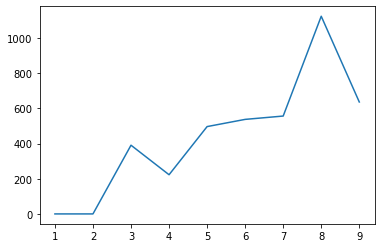

In [69]:
name_plot_lines('Andy')

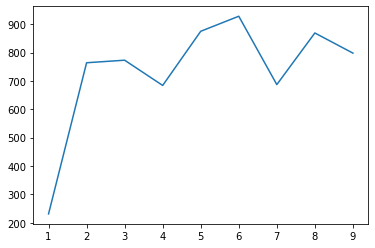

In [70]:
name_plot_lines('Jim')

In [71]:
#function that returns particular season lines value for given char
def season_lines_no(speaker,season):
    return len(df[(df['speaker']==speaker)& (df['season']==season)])

In [72]:
season_lines_no('Pam',8)

475

In [73]:
season_lines_no('Clark',9)

247

In [74]:
season_lines_no('Clark',4) #correctly identified as Clark only came in season 9

0

In [75]:
#transposing pivot table
df_lines_total_trans=df_lines_total.transpose()
df_lines_total_trans

speaker   All    Andy  Angela  Clark  Creed  Darryl  David  Dwight   Erin  \
season                                                                      
1         0.0     0.0    23.0    0.0    0.0    15.0    0.0   222.0    0.0   
2         1.0     0.0   138.0    0.0   52.0    63.0   12.0   856.0    0.0   
3         1.0   391.0   239.0    0.0   71.0    88.0   64.0   939.0    0.0   
4         7.0   223.0   193.0    0.0   67.0    59.0    3.0   547.0    0.0   
5         2.0   497.0   221.0    0.0   52.0   102.0  127.0  1074.0   53.0   
6         2.0   538.0   136.0   13.0   38.0    84.0  113.0   811.0  298.0   
7        18.0   557.0   161.0    0.0   66.0   227.0   12.0   703.0  311.0   
8        15.0  1125.0   166.0    0.0   33.0   312.0   26.0   946.0  427.0   
9        16.0   637.0   381.0  247.0   52.0   278.0   25.0  1069.0  380.0   

speaker  Everyone  ...  Nellie  Oscar    Pam   Pete  Phyllis  Robert   Roy  \
season             ...                                                       
1             0.0  ...     0.0   42.0  170.0    0.0     11.0     0.0  34.0   
2             2.0  ...     0.0  100.0  625.0    0.0     94.0     0.0  85.0   
3             5.0  ...     0.0   72.0  648.0    0.0    112.0     0.0  89.0   
4             4.0  ...     0.0  111.0  528.0    0.0     99.0     0.0   0.0   
5             5.0  ...     0.0  216.0  706.0   15.0    180.0     0.0  14.0   
6            14.0  ...     0.0  177.0  706.0    6.0    138.0     0.0   0.0   
7             1.0  ...     9.0  197.0  612.0    0.0    147.0    17.0   0.0   
8            13.0  ...   233.0  235.0  475.0    0.0    123.0   404.0   0.0   
9            15.0  ...   287.0  294.0  735.0  192.0    127.0     9.0  11.0   

speaker   Ryan  Stanley   Toby  
season                          
1         37.0     24.0   13.0  
2        164.0     82.0  111.0  
3        197.0     94.0  122.0  
4        228.0     81.0  144.0  
5        169.0    113.0   71.0  
6        125.0     72.0  100.0  
7        176.0     75.0   97.0  
8        189.0     91.0  106.0  
9         16.0    100.0  125.0  

[9 rows x 28 columns]

In [76]:
figure2=df_lines_total_trans.iplot(title='Season-wise lines distribution for characters appearing in atleast 10% episodes',
                                 xTitle='Season',yTitle='Number of lines')

Michael again tops all seasons by a large margin until season 7 with the highest number of lines while Dwight has more lines than Jim in season 7 despite Jim appearing in more scenes. Jim has more lines in season 6 despite him and Dwight tieing with the same number of scenes. Except for top 5 characters all other supporting characters have a limited range of lines. Darryl and Erin's upward curve suggests major shoot up in the last few seasons.

## 1b) EDA for IMDB Ratings dataset (df_imdb)

In [77]:
#reading file 2 - IMDB ratings dataset 
df_imdb = pd.read_csv("TheOfficeIMDBPerEpisode.csv")

In [78]:
df_imdb.head()

Season          Title     AirDate  Rating  Num_Votes  \
0       1          Pilot  2005-03-24     7.5       4349   
1       1  Diversity Day  2005-03-29     8.3       4213   
2       1    Health Care  2005-04-05     7.8       3536   
3       1   The Alliance  2005-04-12     8.1       3428   
4       1     Basketball  2005-04-19     8.4       3745   

                                         Description       DirectedBy  \
0  The premiere episode introduces the boss and s...       Ken Kwapis   
1  Michael's off color remark puts a sensitivity ...       Ken Kwapis   
2  Michael leaves Dwight in charge of picking the...  Ken Whittingham   
3  Just for a laugh, Jim agrees to an alliance wi...     Bryan Gordon   
4  Michael and his staff challenge the warehouse ...     Greg Daniels   

                                          WrittenBy  
0  Ricky Gervais |Stephen Merchant and Greg Daniels  
1                                       B. J. Novak  
2                                  Paul Lieberstein  
3                                     Michael Schur  
4                                      Greg Daniels

In [79]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       188 non-null    int64  
 1   Title        188 non-null    object 
 2   AirDate      188 non-null    object 
 3   Rating       188 non-null    float64
 4   Num_Votes    188 non-null    int64  
 5   Description  188 non-null    object 
 6   DirectedBy   188 non-null    object 
 7   WrittenBy    188 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 11.9+ KB


In [80]:
#get column names
column_names2 = df_imdb.columns
print(column_names2)

Index(['Season', 'Title', 'AirDate', 'Rating', 'Num_Votes', 'Description',
       'DirectedBy', 'WrittenBy'],
      dtype='object')


In [81]:
# Drop unwanted columns-Description in this case
df_imdb.drop('Description', inplace=True, axis=1)

In [82]:
df_imdb.groupby('Season')['Title'].nunique() 
#comparing with df to verify if df_imdb has same number of episodes in every season

Season
1     6
2    22
3    23
4    14
5    26
6    26
7    24
8    24
9    23
Name: Title, dtype: int64

In [83]:
df.groupby('season')['episode'].nunique()

season
1     6
2    22
3    23
4    14
5    26
6    24
7    24
8    24
9    23
Name: episode, dtype: int64

In [84]:
#df_imdb counts Niagara part 1 and 2 and The Delivery part 1 and 2 of season 6 as separate episodes whereas in df 
#they are counted as single episodes, since most of the analysis is based on df,we will consider Niagara and 
#The Delivery as single episodes
df_imdb[df_imdb['Season']==6]

Season                 Title     AirDate  Rating  Num_Votes  \
91        6                Gossip  2009-09-17     8.8       2504   
92        6           The Meeting  2009-09-24     8.1       2057   
93        6         The Promotion  2009-10-01     8.0       2052   
94        6       Niagara: Part 1  2009-10-08     9.4       4055   
95        6       Niagara: Part 2  2009-10-08     9.4       2509   
96        6                 Mafia  2009-10-15     7.6       2156   
97        6             The Lover  2009-10-22     8.6       2262   
98        6              Koi Pond  2009-10-29     8.2       2047   
99        6           Double Date  2009-11-05     8.1       2018   
100       6                Murder  2009-11-12     8.6       2385   
101       6   Shareholder Meeting  2009-11-19     8.2       2034   
102       6          Scott's Tots  2009-12-03     8.3       2345   
103       6          Secret Santa  2009-12-10     8.5       2162   
104       6            The Banker  2010-01-21     6.8       2665   
105       6                 Sabre  2010-02-04     7.7       1963   
106       6  Manager and Salesman  2010-02-11     8.1       1942   
107       6  The Delivery: Part 1  2010-03-04     8.4       2048   
108       6  The Delivery: Part 2  2010-03-04     8.5       2065   
109       6     St. Patrick's Day  2010-03-11     7.7       1922   
110       6             New Leads  2010-03-18     7.8       1885   
111       6            Happy Hour  2010-03-25     8.6       2199   
112       6       Secretary's Day  2010-04-22     7.9       1892   
113       6         Body Language  2010-04-29     8.0       1922   
114       6          The Cover-Up  2010-05-06     8.2       1920   
115       6             The Chump  2010-05-13     7.8       1850   
116       6         Whistleblower  2010-05-20     8.0       1909   

            DirectedBy                              WrittenBy  
91    Paul Lieberstein                       Paul Lieberstein  
92     Randall Einhorn                            Aaron Shure  
93    Jennifer Celotta                       Jennifer Celotta  
94           Paul Feig            Greg Daniels | Mindy Kaling  
95           Paul Feig            Greg Daniels | Mindy Kaling  
96        David Rogers                        Brent Forrester  
97       Lee Eisenberg        Lee Eisenberg | Gene Stupnitsky  
98       Reggie Hudlin  Warren Lieberstein | Halsted Sullivan  
99         Seth Gordon                         Charlie Grandy  
100       Greg Daniels                            Daniel Chun  
101  Charles McDougall                         Justin Spitzer  
102        B. J. Novak        Gene Stupnitsky | Lee Eisenberg  
103    Randall Einhorn                           Mindy Kaling  
104      Jeffrey Blitz                          Jason Kessler  
105     John Krasinski                       Jennifer Celotta  
106          Marc Webb                           Mindy Kaling  
107        Seth Gordon                            Daniel Chun  
108        Seth Gordon                            Daniel Chun  
109    Randall Einhorn                        Jonathan Hughes  
110    Brent Forrester                        Brent Forrester  
111          Matt Sohn                            B. J. Novak  
112       Steve Carell                           Mindy Kaling  
113       Mindy Kaling                         Justin Spitzer  
114       Rainn Wilson        Gene Stupnitsky | Lee Eisenberg  
115    Randall Einhorn                            Aaron Shure  
116   Paul Lieberstein  Warren Lieberstein | Halsted Sullivan

In [85]:
#taking average of ratings for episodes Niagara Part 1 and 2
(df_imdb.loc[94]['Rating']+df_imdb.loc[95]['Rating'])/2

9.4

In [86]:
#taking average of ratings for episodes The Delivery Part 1 and 2
df_imdb.loc[107]['Rating']+df_imdb.loc[108]['Rating']/2
np.around((df_imdb.loc[107]['Rating']+df_imdb.loc[108]['Rating'])/2,1)

8.4

In [87]:
#combining parts 1 and 2 of season 6 episodes Niagara and The Delivery into one.
#all other feature values remain same,only votes and title change
#keeping the higher number of votes assuming those many people must have seen both the parts
df_imdb.loc[94,"Num_Votes"]=df_imdb.loc[94]['Num_Votes']
df_imdb.loc[107,"Num_Votes"]=df_imdb.loc[108]['Num_Votes']
df_imdb.loc[94,"Title"]="Niagara: Part 1 & 2"
df_imdb.loc[107,"Title"]="The Delivery: Part 1 & 2"

In [88]:
#dropping the extra rows and resetting index
df_imdb.drop(df_imdb.index[[95,108]], inplace=True)
df_imdb.reset_index(drop=True,inplace=True)

In [89]:
df_imdb[df_imdb['Season']==6]

Season                     Title     AirDate  Rating  Num_Votes  \
91        6                    Gossip  2009-09-17     8.8       2504   
92        6               The Meeting  2009-09-24     8.1       2057   
93        6             The Promotion  2009-10-01     8.0       2052   
94        6       Niagara: Part 1 & 2  2009-10-08     9.4       4055   
95        6                     Mafia  2009-10-15     7.6       2156   
96        6                 The Lover  2009-10-22     8.6       2262   
97        6                  Koi Pond  2009-10-29     8.2       2047   
98        6               Double Date  2009-11-05     8.1       2018   
99        6                    Murder  2009-11-12     8.6       2385   
100       6       Shareholder Meeting  2009-11-19     8.2       2034   
101       6              Scott's Tots  2009-12-03     8.3       2345   
102       6              Secret Santa  2009-12-10     8.5       2162   
103       6                The Banker  2010-01-21     6.8       2665   
104       6                     Sabre  2010-02-04     7.7       1963   
105       6      Manager and Salesman  2010-02-11     8.1       1942   
106       6  The Delivery: Part 1 & 2  2010-03-04     8.4       2065   
107       6         St. Patrick's Day  2010-03-11     7.7       1922   
108       6                 New Leads  2010-03-18     7.8       1885   
109       6                Happy Hour  2010-03-25     8.6       2199   
110       6           Secretary's Day  2010-04-22     7.9       1892   
111       6             Body Language  2010-04-29     8.0       1922   
112       6              The Cover-Up  2010-05-06     8.2       1920   
113       6                 The Chump  2010-05-13     7.8       1850   
114       6             Whistleblower  2010-05-20     8.0       1909   

            DirectedBy                              WrittenBy  
91    Paul Lieberstein                       Paul Lieberstein  
92     Randall Einhorn                            Aaron Shure  
93    Jennifer Celotta                       Jennifer Celotta  
94           Paul Feig            Greg Daniels | Mindy Kaling  
95        David Rogers                        Brent Forrester  
96       Lee Eisenberg        Lee Eisenberg | Gene Stupnitsky  
97       Reggie Hudlin  Warren Lieberstein | Halsted Sullivan  
98         Seth Gordon                         Charlie Grandy  
99        Greg Daniels                            Daniel Chun  
100  Charles McDougall                         Justin Spitzer  
101        B. J. Novak        Gene Stupnitsky | Lee Eisenberg  
102    Randall Einhorn                           Mindy Kaling  
103      Jeffrey Blitz                          Jason Kessler  
104     John Krasinski                       Jennifer Celotta  
105          Marc Webb                           Mindy Kaling  
106        Seth Gordon                            Daniel Chun  
107    Randall Einhorn                        Jonathan Hughes  
108    Brent Forrester                        Brent Forrester  
109          Matt Sohn                            B. J. Novak  
110       Steve Carell                           Mindy Kaling  
111       Mindy Kaling                         Justin Spitzer  
112       Rainn Wilson        Gene Stupnitsky | Lee Eisenberg  
113    Randall Einhorn                            Aaron Shure  
114   Paul Lieberstein  Warren Lieberstein | Halsted Sullivan

In [90]:
import seaborn as sns

<AxesSubplot:>

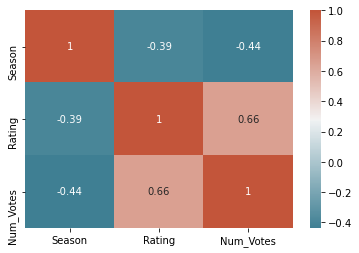

In [91]:
#Pearson's coefficient
corrmat=df_imdb.corr()
sns.heatmap(corrmat, xticklabels=corrmat.columns, yticklabels=corrmat.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Votes and ratings negatively correlated with season.

In [92]:
df_imdb.groupby('Season').mean()

Rating    Num_Votes
Season                       
1       7.983333  3773.833333
2       8.450000  3069.045455
3       8.600000  2835.826087
4       8.564286  2816.214286
5       8.496154  2524.000000
6       8.141667  2175.458333
7       8.320833  2398.500000
8       7.629167  1803.666667
9       7.921739  2174.913043

Ratings dropped in seasons 8 and 9, overall votes seem to decrease over the seasons as expected.

### EXPLORING AIR DATE DATA (column - "AirDate")

In [93]:
#converting air date to datetime object
df_imdb['AirDate']=pd.to_datetime(df_imdb['AirDate'])
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Season      186 non-null    int64         
 1   Title       186 non-null    object        
 2   AirDate     186 non-null    datetime64[ns]
 3   Rating      186 non-null    float64       
 4   Num_Votes   186 non-null    int64         
 5   DirectedBy  186 non-null    object        
 6   WrittenBy   186 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 10.3+ KB


In [94]:
df_imdb['year'] = df_imdb['AirDate'].dt.year
df_imdb['month'] = df_imdb['AirDate'].dt.month#jan is 1,dec is 12
df_imdb['day'] = df_imdb['AirDate'].dt.weekday #mon is 0,sun is 6
df_imdb.head(60)

Season                           Title    AirDate  Rating  Num_Votes  \
0        1                           Pilot 2005-03-24     7.5       4349   
1        1                   Diversity Day 2005-03-29     8.3       4213   
2        1                     Health Care 2005-04-05     7.8       3536   
3        1                    The Alliance 2005-04-12     8.1       3428   
4        1                      Basketball 2005-04-19     8.4       3745   
5        1                        Hot Girl 2005-04-26     7.8       3372   
6        2                     The Dundies 2005-09-20     8.7       3780   
7        2               Sexual Harassment 2005-09-27     8.2       3218   
8        2                 Office Olympics 2005-10-04     8.4       3218   
9        2                        The Fire 2005-10-11     8.4       3183   
10       2                       Halloween 2005-10-18     8.1       2992   
11       2                       The Fight 2005-11-01     8.2       2981   
12       2                      The Client 2005-11-08     8.6       3087   
13       2              Performance Review 2005-11-15     8.2       2828   
14       2             E-Mail Surveillance 2005-11-22     8.4       2940   
15       2                 Christmas Party 2005-12-06     8.9       3204   
16       2                    Booze Cruise 2006-01-05     8.6       3115   
17       2                      The Injury 2006-01-12     9.1       3783   
18       2                      The Secret 2006-01-19     8.3       2762   
19       2                      The Carpet 2006-01-26     7.9       2745   
20       2                  Boys and Girls 2006-02-02     8.2       2723   
21       2                 Valentine's Day 2006-02-09     8.3       2731   
22       2                 Dwight's Speech 2006-03-02     8.5       2875   
23       2  Take Your Daughter to Work Day 2006-03-16     8.3       2819   
24       2              Michael's Birthday 2006-03-30     8.1       2719   
25       2                    Drug Testing 2006-04-27     8.4       2783   
26       2             Conflict Resolution 2006-05-04     8.7       2838   
27       2                    Casino Night 2006-05-11     9.4       4195   
28       3                  Gay Witch Hunt 2006-09-21     9.0       3608   
29       3                  The Convention 2006-09-28     8.2       2663   
30       3                        The Coup 2006-10-05     8.6       2787   
31       3                Grief Counseling 2006-10-12     8.0       2686   
32       3                      Initiation 2006-10-19     8.2       2622   
33       3                          Diwali 2006-11-02     8.0       2697   
34       3                  Branch Closing 2006-11-09     8.6       2642   
35       3                      The Merger 2006-11-16     8.7       2768   
36       3                     The Convict 2006-11-30     8.3       2772   
37       3            A Benihana Christmas 2006-12-14     8.8       2935   
38       3              Back from Vacation 2007-01-04     8.5       2623   
39       3              Traveling Salesmen 2007-01-11     8.6       2688   
40       3                      The Return 2007-01-18     8.8       2822   
41       3                    Ben Franklin 2007-02-01     8.1       2618   
42       3                Phyllis' Wedding 2007-02-08     8.2       2641   
43       3                 Business School 2007-02-15     8.9       3028   
44       3                       Cocktails 2007-02-22     8.5       2622   
45       3                 The Negotiation 2007-04-05     9.0       2968   
46       3                 Safety Training 2007-04-12     8.8       2798   
47       3                  Product Recall 2007-04-26     8.8       2790   
48       3            Women's Appreciation 2007-05-03     8.8       2785   
49       3                     Beach Games 2007-05-10     9.1       3200   
50       3                         The Job 2007-05-17     9.3       3461   
51       4                         Fun Run 2007-09-2

##### Days on which the show aired:

In [95]:
df_imdb['day'].value_counts() #thursdays and tuesdays

3    170
1     15
6      1
Name: day, dtype: int64

In [96]:
df_imdb[df_imdb['day']==6]

Season          Title    AirDate  Rating  Num_Votes     DirectedBy  \
77       5  Stress Relief 2009-02-01     9.7       7058  Jeffrey Blitz   

           WrittenBy  year  month  day  
77  Paul Lieberstein  2009      2    6

From the above data, we can conclude the show aired initially on Tuesdays(Season 1 and few episodes of Season 2). Later on the show moved to its regular Thursday airing slot for the rest of the seasons(joining the "Must See TV" and "Comedy Night Done Right" Thursday night lineup) except one episode "Stress Relief" which aired on a Sunday. 

Point to note about episode "Stress Relief" - 
This special episode aired on NBC in the US right after the broadcast of Super Bowl XLIII, in anticipation of the high post-Super Bowl viewership.
According to Paul  Lieberstein who wrote this episode, the makers wanted to attract new viewers while retaining the regular ones through an out and out comedy episode hence they focused less on the long-standing story arcs. Besides, the episode also had celebrity guest appearances from Jack Black, Jessica Alba and Cloris Leachman in the film called Mrs. Albert Hannaday that Andy, Jim and Pam watch in the episode.
In its original American broadcast on February 1, 2009, "Stress Relief" was viewed by 22.9 million viewers in 13.34 million homes, according to Nielsen Media Research, making it the most watched episode of The Office and the only episode to reach over 20 million viewers.


Source - Wikipedia

##### Months when the show aired:

In [97]:
df_imdb.groupby('Season')['month'].value_counts().tail(60)

Season  month
2       4        1
        12       1
3       2        4
        11       4
        1        3
        4        3
        5        3
        10       3
        9        2
        12       1
4       10       4
        4        3
        5        3
        11       3
        9        1
5       4        5
        3        4
        10       4
        2        3
        11       3
        1        2
        5        2
        12       2
        9        1
6       10       5
        3        4
        5        3
        11       3
        2        2
        4        2
        9        2
        12       2
        1        1
7       2        4
        10       4
        4        3
        5        3
        11       3
        1        2
        9        2
        12       2
        3        1
8       2        4
        3        3
        4        3
        10       3
        11       3
        1        2
        5        2
        9        2
        12       2
9       1        

<AxesSubplot:xlabel='month', ylabel='count'>

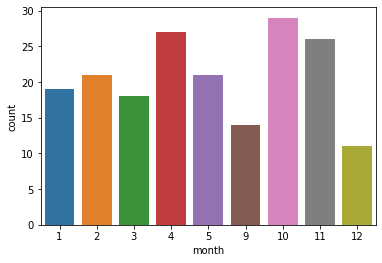

In [98]:
sns.countplot(x=df_imdb['month'])

The show aired most of its episodes in the months of October,April and November.

##### Years when the show aired:

In [99]:
df_imdb['year'].value_counts()

2009    28
2012    23
2011    23
2010    23
2006    22
2007    21
2008    16
2005    16
2013    14
Name: year, dtype: int64

<AxesSubplot:xlabel='year', ylabel='count'>

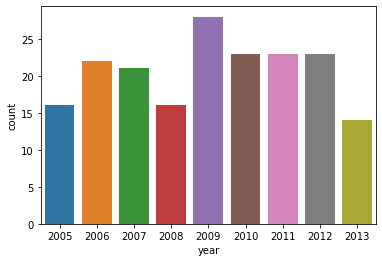

In [100]:
sns.countplot(x=df_imdb['year'])

In [118]:
df_imdb.groupby('year')['Season'].value_counts()

year  Season
2005  2         10
      1          6
2006  2         12
      3         10
2007  3         13
      4          8
2008  5         10
      4          6
2009  5         16
      6         12
2010  6         12
      7         11
2011  7         13
      8         10
2012  8         14
      9          9
2013  9         14
Name: Season, dtype: int64

<AxesSubplot:xlabel='year,Season'>

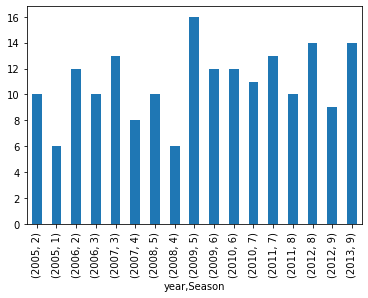

In [119]:
df_imdb.groupby('year')['Season'].value_counts().plot(kind='bar')

The show aired from year 2005 to 2013;the highest number of episodes aired in 2009.

##### Longest running season:

In [101]:
df_imdb['Difference in days between air dates(season-wise)'] = df_imdb.groupby('Season')['AirDate'].apply(lambda x: x.dt.date - x.min().date()).astype('timedelta64[D]')
df_imdb.head(60)

Season                           Title    AirDate  Rating  Num_Votes  \
0        1                           Pilot 2005-03-24     7.5       4349   
1        1                   Diversity Day 2005-03-29     8.3       4213   
2        1                     Health Care 2005-04-05     7.8       3536   
3        1                    The Alliance 2005-04-12     8.1       3428   
4        1                      Basketball 2005-04-19     8.4       3745   
5        1                        Hot Girl 2005-04-26     7.8       3372   
6        2                     The Dundies 2005-09-20     8.7       3780   
7        2               Sexual Harassment 2005-09-27     8.2       3218   
8        2                 Office Olympics 2005-10-04     8.4       3218   
9        2                        The Fire 2005-10-11     8.4       3183   
10       2                       Halloween 2005-10-18     8.1       2992   
11       2                       The Fight 2005-11-01     8.2       2981   
12       2                      The Client 2005-11-08     8.6       3087   
13       2              Performance Review 2005-11-15     8.2       2828   
14       2             E-Mail Surveillance 2005-11-22     8.4       2940   
15       2                 Christmas Party 2005-12-06     8.9       3204   
16       2                    Booze Cruise 2006-01-05     8.6       3115   
17       2                      The Injury 2006-01-12     9.1       3783   
18       2                      The Secret 2006-01-19     8.3       2762   
19       2                      The Carpet 2006-01-26     7.9       2745   
20       2                  Boys and Girls 2006-02-02     8.2       2723   
21       2                 Valentine's Day 2006-02-09     8.3       2731   
22       2                 Dwight's Speech 2006-03-02     8.5       2875   
23       2  Take Your Daughter to Work Day 2006-03-16     8.3       2819   
24       2              Michael's Birthday 2006-03-30     8.1       2719   
25       2                    Drug Testing 2006-04-27     8.4       2783   
26       2             Conflict Resolution 2006-05-04     8.7       2838   
27       2                    Casino Night 2006-05-11     9.4       4195   
28       3                  Gay Witch Hunt 2006-09-21     9.0       3608   
29       3                  The Convention 2006-09-28     8.2       2663   
30       3                        The Coup 2006-10-05     8.6       2787   
31       3                Grief Counseling 2006-10-12     8.0       2686   
32       3                      Initiation 2006-10-19     8.2       2622   
33       3                          Diwali 2006-11-02     8.0       2697   
34       3                  Branch Closing 2006-11-09     8.6       2642   
35       3                      The Merger 2006-11-16     8.7       2768   
36       3                     The Convict 2006-11-30     8.3       2772   
37       3            A Benihana Christmas 2006-12-14     8.8       2935   
38       3              Back from Vacation 2007-01-04     8.5       2623   
39       3              Traveling Salesmen 2007-01-11     8.6       2688   
40       3                      The Return 2007-01-18     8.8       2822   
41       3                    Ben Franklin 2007-02-01     8.1       2618   
42       3                Phyllis' Wedding 2007-02-08     8.2       2641   
43       3                 Business School 2007-02-15     8.9       3028   
44       3                       Cocktails 2007-02-22     8.5       2622   
45       3                 The Negotiation 2007-04-05     9.0       2968   
46       3                 Safety Training 2007-04-12     8.8       2798   
47       3                  Product Recall 2007-04-26     8.8       2790   
48       3            Women's Appreciation 2007-05-03     8.8       2785   
49       3                     Beach Games 2007-05-10     9.1       3200   
50       3                         The Job 2007-05-17     9.3       3461   
51       4                         Fun Run 2007-09-2

In [103]:
df_imdb.groupby('Season')['Difference in days between air dates(season-wise)'].nlargest(1).sort_values(ascending=False)

Season     
6       114    245.0
9       185    238.0
7       138    238.0
3       50     238.0
2       27     233.0
8       162    231.0
5       90     231.0
4       64     231.0
1       5       33.0
Name: Difference in days between air dates(season-wise), dtype: float64

<AxesSubplot:xlabel='Season,None'>

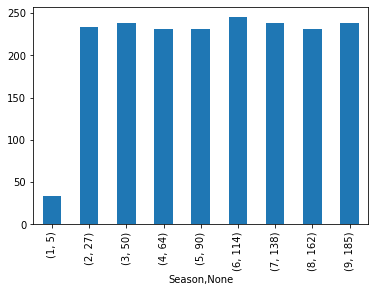

In [104]:
df_imdb.groupby('Season')['Difference in days between air dates(season-wise)'].nlargest(1).plot(kind='bar')

In [105]:
df_imdb['Season'].value_counts()

5    26
8    24
7    24
6    24
9    23
3    23
2    22
4    14
1     6
Name: Season, dtype: int64

The longest running season was season 6 despite season 5 having the maximum number of episodes. All seasons (except season 1 which had only 6 episodes) ran for a similar number of days including season 4 which comparatively had lesser episodes (14).

### EXPLORING RATINGS DATA (column - "Rating")

In [106]:
#descriptive stats
df_imdb['Rating'].describe() 

count    186.00000
mean       8.24086
std        0.57530
min        6.60000
25%        7.80000
50%        8.20000
75%        8.60000
max        9.80000
Name: Rating, dtype: float64

According to IMDB there are 188 episodes but since the dialogues dataset counts The Niagara and The Delivery as single episodes, the show had 186 episodes in total.

In [107]:
df_imdb.groupby('Season')['Rating'].describe()

count      mean       std  min    25%   50%    75%  max
Season                                                         
1         6.0  7.983333  0.343026  7.5  7.800  7.95  8.250  8.4
2        22.0  8.450000  0.350170  7.9  8.200  8.40  8.600  9.4
3        23.0  8.600000  0.364318  8.0  8.250  8.60  8.800  9.3
4        14.0  8.564286  0.437839  7.8  8.300  8.55  8.775  9.4
5        26.0  8.496154  0.404456  8.0  8.200  8.40  8.700  9.7
6        24.0  8.141667  0.498621  6.8  7.875  8.10  8.425  9.4
7        24.0  8.320833  0.638598  7.4  7.800  8.20  8.725  9.8
8        24.0  7.629167  0.417528  6.6  7.450  7.70  7.925  8.2
9        23.0  7.921739  0.682879  7.0  7.550  7.80  8.000  9.8

Season 8's highest rated episode rating is same as the median rating across all episodes.

In [108]:
df_imdb['Rating'].median()

8.2

In [109]:
df_imdb['Rating'].mode()

0    8.2
dtype: float64

Point to note - The rating of an episode is not an average of all ratings received from the voters. IMDB uses weighted average system.

AS MENTIONED ON THEIR OFFICIAL WEBSITE-
"We take all the individual ratings cast by IMDb registered users and use them to calculate a single rating. We don't use the arithmetic mean (i.e. the sum of all votes divided by the number of votes), although we do display the mean and average votes on the votes breakdown page; instead the rating displayed on a title's page is a weighted average. 

The IMDb weighted average does not change upon receipt of each new vote, but instead is updated numerous times per day."

##### Ratings Distribution:

In [110]:
df_imdb['Rating'].value_counts()

8.2    19
8.0    14
8.3    14
8.1    14
7.8    13
8.8    11
7.7    11
8.7    11
8.4    11
8.6    10
8.5     7
7.6     7
9.0     6
7.9     5
7.5     5
9.4     4
9.3     3
7.1     3
8.9     2
9.1     2
7.4     2
7.3     2
9.8     2
7.2     1
6.6     1
9.2     1
9.7     1
6.8     1
9.5     1
7.0     1
6.9     1
Name: Rating, dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='Count'>

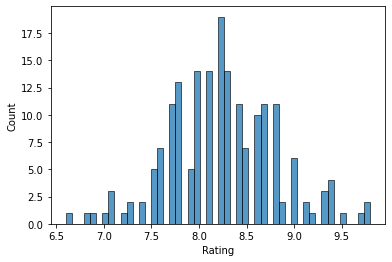

In [111]:
sns.histplot(x=df_imdb['Rating'],bins=50)

Can see peaks around 7.7,7.8 and from 8-8.4.

##### Number of episodes  above the mean rating:

In [112]:
df_imdb[df_imdb['Rating']>df_imdb['Rating'].mean()]

Season             Title    AirDate  Rating  Num_Votes  \
1         1     Diversity Day 2005-03-29     8.3       4213   
4         1        Basketball 2005-04-19     8.4       3745   
6         2       The Dundies 2005-09-20     8.7       3780   
8         2   Office Olympics 2005-10-04     8.4       3218   
9         2          The Fire 2005-10-11     8.4       3183   
..      ...               ...        ...     ...        ...   
138       7  Search Committee 2011-05-19     8.8       2344   
171       9  Dwight Christmas 2012-12-06     8.3       1918   
183       9  Livin' the Dream 2013-05-02     9.0       2439   
184       9          A.A.R.M. 2013-05-09     9.5       3401   
185       9            Finale 2013-05-16     9.8       9269   

            DirectedBy             WrittenBy  year  month  day  \
1           Ken Kwapis           B. J. Novak  2005      3    1   
4         Greg Daniels          Greg Daniels  2005      4    1   
6         Greg Daniels          Mindy Kaling  2005      9    1   
8            Paul Feig         Michael Schur  2005     10    1   
9           Ken Kwapis           B. J. Novak  2005     10    1   
..                 ...                   ...   ...    ...  ...   
138      Jeffrey Blitz      Paul Lieberstein  2011      5    3   
171  Charles McDougall        Robert Padnick  2012     12    3   
183      Jeffrey Blitz  Niki Schwartz-Wright  2013      5    3   
184       David Rogers       Brent Forrester  2013      5    3   
185         Ken Kwapis          Greg Daniels  2013      5    3   

     Difference in days between air dates(season-wise)  
1                                                  5.0  
4                                                 26.0  
6                                                  0.0  
8                                                 14.0  
9                                                 21.0  
..                                                 ...  
138                                              238.0  
171                                               77.0  
183                                              224.0  
184                                              231.0  
185                                              238.0  

[86 rows x 11 columns]

86 episodes(46%) had a rating above the mean/median rating of 8.2

##### Relation between Season and Rating:

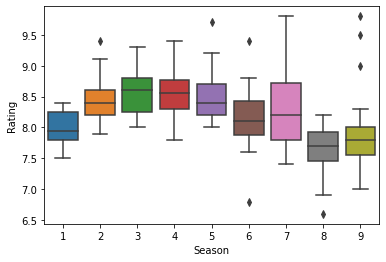

In [113]:
sns.boxplot(x=df_imdb['Season'], y=df_imdb['Rating']);

Season 3 has highest median rating, with the median line present towards upper half of the plot (positive skewness)indicating most episodes have higher ratings  above 8.6. Season 8 has the lowest median rating.
The highest rated episode of the show belongs to season 7 and 9 while lowest rated belongs to season 8.

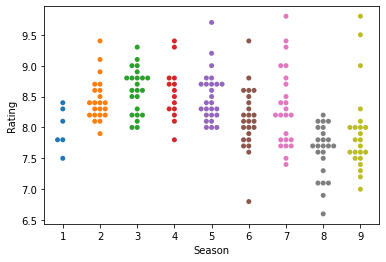

In [114]:
#for better representation of distribution of the ratings
sns.swarmplot(x=df_imdb['Season'], y=df_imdb['Rating']);

Seasons 2 to 5 ratings have been steady and good, above 8 for most time; season 6 and 7 half the episodes are highly rated while the other half dip below 8,also a general decline from the previously steady rated seasons begins to be seen; season 8 and 9 have consistently low ratings except for 3 episodes in season 9. Most of the low ratings below the median rating of 8.2 is seen concentrated from season 6 onwards.

##### Highest and lowest rated episodes:

In [115]:
df_imdb[df_imdb['Rating']==df_imdb['Rating'].max()]

Season             Title    AirDate  Rating  Num_Votes  DirectedBy  \
135       7  Goodbye, Michael 2011-04-28     9.8       6909   Paul Feig   
185       9            Finale 2013-05-16     9.8       9269  Ken Kwapis   

        WrittenBy  year  month  day  \
135  Greg Daniels  2011      4    3   
185  Greg Daniels  2013      5    3   

     Difference in days between air dates(season-wise)  
135                                              217.0  
185                                              238.0

In [116]:
df_imdb[df_imdb['Rating']==df_imdb['Rating'].min()]

Season         Title    AirDate  Rating  Num_Votes    DirectedBy  \
157       8  Get the Girl 2012-03-15     6.6       1944  Rainn Wilson   

          WrittenBy  year  month  day  \
157  Charlie Grandy  2012      3    3   

     Difference in days between air dates(season-wise)  
157                                              175.0

Both the highest rated episodes were written by Greg Daniels. Point to note here is that season 7 episode "Goodbye, Michael" marks the leaving of Michael from the show whereas he reappears after two complete seasons in the Finale episode of season 9 for a cameo!Lowest rated episode belonged to season 8.

### EXPLORING VOTES DATA (column - "Num_Votes")

In [120]:
df_imdb['Num_Votes'].describe() 

count     186.000000
mean     2492.059140
std       929.401657
min      1630.000000
25%      1918.000000
50%      2295.000000
75%      2771.000000
max      9269.000000
Name: Num_Votes, dtype: float64

In [121]:
df_imdb.groupby('Season')['Num_Votes'].describe()

count         mean          std     min      25%     50%      75%  \
Season                                                                      
1         6.0  3773.833333   415.247115  3372.0  3455.00  3640.5  4096.00   
2        22.0  3069.045455   392.830325  2719.0  2792.00  2960.5  3198.75   
3        23.0  2835.826087   265.815324  2618.0  2652.50  2772.0  2878.50   
4        14.0  2816.214286   660.534769  2305.0  2473.50  2559.5  2752.00   
5        26.0  2524.000000   946.336684  2132.0  2195.75  2299.0  2425.50   
6        24.0  2175.458333   452.015965  1850.0  1922.00  2049.5  2214.75   
7        24.0  2398.500000  1096.799336  1871.0  1934.00  1996.5  2251.00   
8        24.0  1803.666667   113.483447  1630.0  1717.75  1796.0  1857.25   
9        23.0  2174.913043  1591.441054  1641.0  1695.00  1743.0  1838.00   

           max  
Season          
1       4349.0  
2       4195.0  
3       3608.0  
4       4824.0  
5       7058.0  
6       4055.0  
7       6909.0  
8       2102.0  
9       9269.0

Season 8 has the lowest mean and its maximum value too lower than the other seasons.

##### Votes Distribution:

In [123]:
df_imdb['Num_Votes'].value_counts()

1918    2
3218    2
1720    2
1922    2
2065    2
       ..
1958    1
2981    1
1950    1
2723    1
2581    1
Name: Num_Votes, Length: 177, dtype: int64

<AxesSubplot:xlabel='Num_Votes', ylabel='Count'>

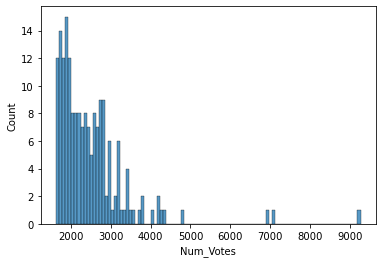

In [124]:
sns.histplot(x=df_imdb['Num_Votes'],bins=100)

In [125]:
df_imdb['Num_Votes'].min()

1630

High number of votes concentration below 2000, rest spread mostly between 2000-3000 votes 

##### Inspecting highest and lowest voted episodes:

In [126]:
df_imdb.sort_values(by=['Num_Votes'],ascending=False).head(10)

Season                  Title    AirDate  Rating  Num_Votes  \
185       9                 Finale 2013-05-16     9.8       9269   
77        5          Stress Relief 2009-02-01     9.7       7058   
135       7       Goodbye, Michael 2011-04-28     9.8       6909   
59        4           Dinner Party 2008-04-10     9.4       4824   
0         1                  Pilot 2005-03-24     7.5       4349   
130       7  Threat Level Midnight 2011-02-17     9.4       4236   
1         1          Diversity Day 2005-03-29     8.3       4213   
27        2           Casino Night 2006-05-11     9.4       4195   
94        6    Niagara: Part 1 & 2 2009-10-08     9.4       4055   
17        2             The Injury 2006-01-12     9.1       3783   

        DirectedBy                                         WrittenBy  year  \
185     Ken Kwapis                                      Greg Daniels  2013   
77   Jeffrey Blitz                                  Paul Lieberstein  2009   
135      Paul Feig                                      Greg Daniels  2011   
59       Paul Feig                   Gene Stupnitsky | Lee Eisenberg  2008   
0       Ken Kwapis  Ricky Gervais |Stephen Merchant and Greg Daniels  2005   
130   Tucker Gates                                       B. J. Novak  2011   
1       Ken Kwapis                                       B. J. Novak  2005   
27      Ken Kwapis                                      Steve Carell  2006   
94       Paul Feig                       Greg Daniels | Mindy Kaling  2009   
17    Bryan Gordon                                      Mindy Kaling  2006   

     month  day  Difference in days between air dates(season-wise)  
185      5    3                                              238.0  
77       2    6                                              129.0  
135      4    3                                              217.0  
59       4    3                                              196.0  
0        3    3                                                0.0  
130      2    3                                              147.0  
1        3    1                                                5.0  
27       5    3                                              233.0  
94      10    3                                               21.0  
17       1    3                                              114.0

Since most episodes' number of votes are concentrated in the 1700-3000 range,the top 5 episodes on the list here are not just highly rated (>75th percentile of the ratings-8.6) but also the most popular episodes considering the comparatively much higher number of votes they has received!

In [127]:
df_imdb.sort_values(by=['Num_Votes'],ascending=True).head(10)

Season                Title    AirDate  Rating  Num_Votes  \
161       8             Turf War 2012-05-03     7.6       1630   
176       9            Vandalism 2013-01-31     7.5       1641   
175       9      Junior Salesman 2013-01-31     7.6       1644   
169       9            The Whale 2012-11-15     7.6       1652   
177       9     Couples Discount 2013-02-07     7.3       1655   
152       8      Special Project 2012-02-09     7.7       1671   
156       8  Last Day in Florida 2012-03-08     7.8       1681   
180       9               Promos 2013-04-04     8.0       1691   
170       9           The Target 2012-11-29     7.8       1693   
160       8           Fundraiser 2012-04-26     7.1       1694   

           DirectedBy                              WrittenBy  year  month  \
161       Daniel Chun  Warren Lieberstein | Halsted Sullivan  2012      5   
176          Lee Kirk                         Owen Ellickson  2013      1   
175      David Rogers                          Carrie Kemper  2013      1   
169    Rodman Flender                          Carrie Kemper  2012     11   
177       Troy Miller                      Allison Silverman  2013      2   
152      David Rogers                        Amelie Gillette  2012      2   
156         Matt Sohn                         Robert Padnick  2012      3   
180  Jennifer Celotta                          Tim McAuliffe  2013      4   
170   Brent Forrester                          Graham Wagner  2012     11   
160      David Rogers                         Owen Ellickson  2012      4   

     day  Difference in days between air dates(season-wise)  
161    3                                              224.0  
176    3                                              133.0  
175    3                                              133.0  
169    3                                               56.0  
177    3                                              140.0  
152    3                                              140.0  
156    3                                              168.0  
180    3                                              196.0  
170    3                                               70.0  
160    3                                              217.0

The low votes suggest that after Michael left viewers lost interest hence didnt watch the show/didnt want to vote.

##### Relation between Season and Votes - How far have the number of votes decreased over seasons? 

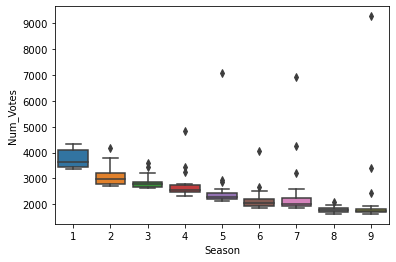

In [128]:
sns.boxplot(x=df_imdb['Season'], y=df_imdb['Num_Votes']);
#seeing a decrease in the number of votes from season 1 to 9

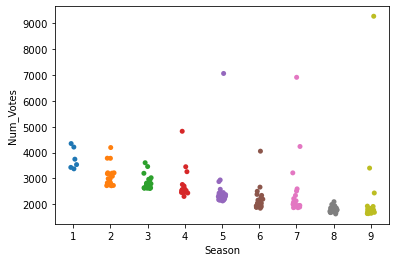

In [129]:
sns.stripplot(x=df_imdb['Season'], y=df_imdb['Num_Votes']);

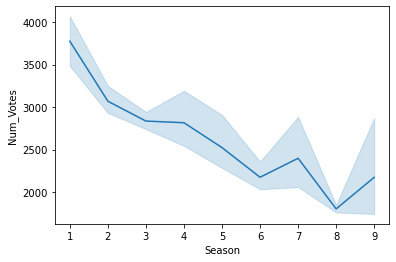

In [130]:
sns.lineplot(x=df_imdb['Season'], y=df_imdb['Num_Votes']);

A decreasing trend in votes can be seen as we move towards later seasons, with a sharp dip from season 7 to 8.

##### Highest and lowest voted episodes:

In [131]:
#Highest voted episode (also a highest rated episode)
df_imdb[df_imdb['Num_Votes']==df_imdb['Num_Votes'].max()]

Season   Title    AirDate  Rating  Num_Votes  DirectedBy     WrittenBy  \
185       9  Finale 2013-05-16     9.8       9269  Ken Kwapis  Greg Daniels   

     year  month  day  Difference in days between air dates(season-wise)  
185  2013      5    3                                              238.0

In [132]:
df_imdb[df_imdb['Num_Votes']==df_imdb['Num_Votes'].min()]

Season     Title    AirDate  Rating  Num_Votes   DirectedBy  \
161       8  Turf War 2012-05-03     7.6       1630  Daniel Chun   

                                 WrittenBy  year  month  day  \
161  Warren Lieberstein | Halsted Sullivan  2012      5    3   

     Difference in days between air dates(season-wise)  
161                                              224.0

The season finale is the highest rated and voted episode.Lowest voted episode belonged to season 8.

##### Relation between Votes and Rating - How far do ratings increase as the number of votes received increases?

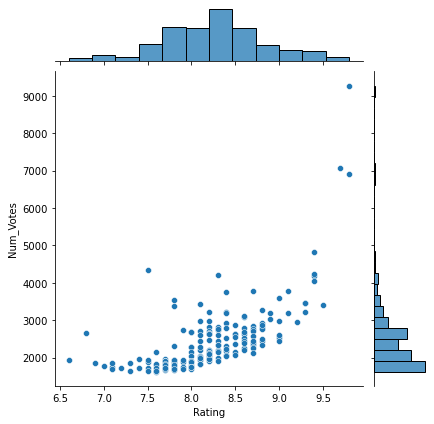

In [133]:
#Jointplot showing relationship between Rating and Votes and their individual distributions.
sns.jointplot(x=df_imdb['Rating'], y=df_imdb['Num_Votes']);

Positive linear relation seen upto certain extent between ratings and votes. High density of votes are mostly seen around 1500 upto 3000 for ratings between 8-8.8.Votes go above 6000 only at 4 instances.

### EXPLORING DIRECTORS OF THE SHOW DATA (column - "DirectedBy")

In [134]:
df_imdb['DirectedBy'].nunique()

55

In [135]:
df_imdb['DirectedBy'].value_counts()

Randall Einhorn      15
Paul Feig            14
Ken Kwapis           13
Greg Daniels         13
Jeffrey Blitz        11
Ken Whittingham       9
David Rogers          9
Matt Sohn             8
Charles McDougall     8
Paul Lieberstein      7
B. J. Novak           5
Tucker Gates          4
Brent Forrester       4
Troy Miller           3
Jennifer Celotta      3
Steve Carell          3
Rainn Wilson          3
John Krasinski        3
Harold Ramis          3
Dennie Gordon         2
Claire Scanlon        2
Ed Helms              2
Mindy Kaling          2
Seth Gordon           2
Rodman Flender        2
Bryan Gordon          2
Dean Holland          2
Victor Nelli, Jr.     2
Julian Farino         2
Joss Whedon           2
Jason Reitman         2
Amy Heckerling        1
Craig Zisk            1
Michael Spiller       1
Marc Webb             1
Lee Kirk              1
Bryan Cranston        1
Eric Appel            1
Miguel Arteta         1
Lee Eisenberg         1
Gene Stupnitsky       1
Daniel Chun     

Characters of the show like Paul Lieberstein(Toby),B. J. Novak(Ryan),Rainn Wilson(Dwight),Steve Carell(Michael),John Krasinski(Jim),Ed Helms(Andy),Mindy Kaling(Kelly) and Brian Baumgartner(Kevin) directed episodes apart from acting too.

In [136]:
df_imdb.groupby('Season')['DirectedBy'].nunique()

Season
1     5
2     8
3    12
4    11
5    16
6    19
7    20
8    16
9    18
Name: DirectedBy, dtype: int64

Season 7 had the highest number of unique directors. Except for one episode in season 1 all episodes were directed by a different director, while for season 7- 20 out of 24 episodes were directed by a different director.

##### Relation between Directors and Rating:

In [137]:
ab=df_imdb['DirectedBy'].unique() #checking for spelling errors
print(sorted(ab))

['Alex Hardcastle', 'Amy Heckerling', 'Asaad Kelada', 'B. J. Novak', 'Brent Forrester', 'Brian Baumgartner', 'Bryan Cranston', 'Bryan Gordon', 'Charles McDougall', 'Charlie Grandy', 'Claire Scanlon', 'Craig Zisk', 'Daniel Chun', 'Danny Leiner', 'David Rogers', 'Dean Holland', 'Dennie Gordon', 'Ed Helms', 'Eric Appel', 'Gene Stupnitsky', 'Greg Daniels', 'Harold Ramis', 'J. J. Abrams', 'Jason Reitman', 'Jeffrey Blitz', 'Jennifer Celotta', 'Jesse Peretz', 'John Krasinski', 'John Stuart Scott', 'Jon Favreau', 'Joss Whedon', 'Julian Farino', 'Kelly Cantley', 'Ken Kwapis', 'Ken Whittingham', 'Lee Eisenberg', 'Lee Kirk', 'Marc Webb', 'Matt Sohn', 'Michael Spiller', 'Miguel Arteta', 'Mindy Kaling', 'Paul Feig', 'Paul Lieberstein', 'Rainn Wilson', 'Randall Einhorn', 'Reggie Hudlin', 'Rodman Flender', 'Roger Nygard', 'Seth Gordon', 'Stephen Merchant', 'Steve Carell', 'Troy Miller', 'Tucker Gates', 'Victor Nelli, Jr.']


In [138]:
#considering directors who directed atleast 6 episodes (season 1 length)
ccc=df_imdb['DirectedBy'].value_counts().head(10).index.tolist()
ccc

['Randall Einhorn',
 'Paul Feig',
 'Ken Kwapis',
 'Greg Daniels',
 'Jeffrey Blitz',
 'Ken Whittingham',
 'David Rogers',
 'Matt Sohn',
 'Charles McDougall',
 'Paul Lieberstein']

In [139]:
df_dir=df_imdb[df_imdb['DirectedBy'].isin(ccc)]
df_dir

Season             Title    AirDate  Rating  Num_Votes        DirectedBy  \
0         1             Pilot 2005-03-24     7.5       4349        Ken Kwapis   
1         1     Diversity Day 2005-03-29     8.3       4213        Ken Kwapis   
2         1       Health Care 2005-04-05     7.8       3536   Ken Whittingham   
4         1        Basketball 2005-04-19     8.4       3745      Greg Daniels   
6         2       The Dundies 2005-09-20     8.7       3780      Greg Daniels   
..      ...               ...        ...     ...        ...               ...   
179       9          The Farm 2013-03-14     7.5       1931  Paul Lieberstein   
181       9     Stairmageddon 2013-04-11     8.0       1743         Matt Sohn   
183       9  Livin' the Dream 2013-05-02     9.0       2439     Jeffrey Blitz   
184       9          A.A.R.M. 2013-05-09     9.5       3401      David Rogers   
185       9            Finale 2013-05-16     9.8       9269        Ken Kwapis   

                                            WrittenBy  year  month  day  \
0    Ricky Gervais |Stephen Merchant and Greg Daniels  2005      3    3   
1                                         B. J. Novak  2005      3    1   
2                                    Paul Lieberstein  2005      4    1   
4                                        Greg Daniels  2005      4    1   
6                                        Mindy Kaling  2005      9    1   
..                                                ...   ...    ...  ...   
179                                  Paul Lieberstein  2013      3    3   
181                                      Dan Sterling  2013      4    3   
183                              Niki Schwartz-Wright  2013      5    3   
184                                   Brent Forrester  2013      5    3   
185                                      Greg Daniels  2013      5    3   

     Difference in days between air dates(season-wise)  
0                                                  0.0  
1                                                  5.0  
2                                                 12.0  
4                                                 26.0  
6                                                  0.0  
..                                                 ...  
179                                              175.0  
181                                              203.0  
183                                              224.0  
184                                              231.0  
185                                              238.0  

[107 rows x 11 columns]

In [140]:
import plotly.express as px
fig = px.box(df_dir,x='DirectedBy', y='Rating', points="all",title="Relation between Directors(who directed atleast 6 episodes) and Rating",
             hover_data=["Season","Title"])
fig.show()

Greg Daniels has the highest median rating while Ken Kwapis and Paul Feig have all episode ratings above 8(except 1 which is Pilot episode) along with second highest median rating.While Matt Sohn's episodes comparatively have lower ratings, for David Rogers who has the lowest median rating it was just one episode that was rated high.

### EXPLORING WRITERS OF THE SHOW DATA (column - "WrittenBy")

In [141]:
df_imdb['WrittenBy'].nunique()

47

In [142]:
df_imdb['WrittenBy'].value_counts()

Mindy Kaling                                        20
B. J. Novak                                         15
Paul Lieberstein                                    13
Justin Spitzer                                       9
Greg Daniels                                         9
Brent Forrester                                      9
Jennifer Celotta                                     8
Gene Stupnitsky | Lee Eisenberg                      8
Michael Schur                                        7
Charlie Grandy                                       7
Aaron Shure                                          6
Daniel Chun                                          6
Lee Eisenberg | Gene Stupnitsky                      5
Owen Ellickson                                       4
Warren Lieberstein | Halsted Sullivan                4
Robert Padnick                                       4
Carrie Kemper                                        4
Allison Silverman                                    3
Steve Hely

In [143]:
#cleaning
df_imdb['WrittenBy'].replace(['Lee Eisenberg | Gene Stupnitsky'], "Gene Stupnitsky | Lee Eisenberg", inplace=True)
df_imdb['WrittenBy'].replace(['Warren Lieberstein | Halsted Sullivan'], "Halsted Sullivan | Warren Lieberstein", inplace=True)
df_imdb['WrittenBy'].replace(['Michael Schur | Lee Eisenberg | Gene Stupnitsky'], "Lee Eisenberg | Gene Stupnitsky | Michael Schur", inplace=True)
df_imdb['WrittenBy'].replace(['Justin Spitzer | Brent Forrester'], "Brent Forrester | Justin Spitzer", inplace=True)
df_imdb['WrittenBy'].replace(['Ricky Gervais |Stephen Merchant and Greg Daniels'], "Ricky Gervais | Stephen Merchant | Greg Daniels", inplace=True)

In [144]:
df_imdb['WrittenBy'].value_counts()

Mindy Kaling                                       20
B. J. Novak                                        15
Paul Lieberstein                                   13
Gene Stupnitsky | Lee Eisenberg                    13
Justin Spitzer                                      9
Brent Forrester                                     9
Greg Daniels                                        9
Jennifer Celotta                                    8
Charlie Grandy                                      7
Halsted Sullivan | Warren Lieberstein               7
Michael Schur                                       7
Aaron Shure                                         6
Daniel Chun                                         6
Carrie Kemper                                       4
Owen Ellickson                                      4
Robert Padnick                                      4
Allison Silverman                                   3
Steve Hely                                          3
Lee Eisenberg | Gene Stupnit

Mindy Kaling(Kelly), B. J. Novak(Ryan) and Paul Lieberstein(Toby) were regular writers of the show, having written the highest number of episodes!Steve Carell also wrote couple of episodes.

In [999]:
df_imdb.groupby('Season')['WrittenBy'].nunique()

Season
1     6
2     9
3    15
4    11
5    14
6    14
7    16
8    15
9    14
Name: WrittenBy, dtype: int64

Season 7 had the highest number of unique writers too.

In [146]:
abc=df_imdb['WrittenBy'].unique() #checking for spelling errors
print(sorted(abc))

['Aaron Shure', 'Allison Silverman', 'Amelie Gillette', 'Anthony Q. Farrell', 'B. J. Novak', 'Brent Forrester', 'Brent Forrester | Justin Spitzer', 'Caroline Williams', 'Carrie Kemper', 'Charlie Grandy', 'Dan Greaney', 'Dan Sterling', 'Daniel Chun', 'Gene Stupnitsky | Lee Eisenberg', 'Graham Wagner', 'Greg Daniels', 'Greg Daniels | Mindy Kaling', 'Halsted Sullivan | Warren Lieberstein', 'Jason Kessler', 'Jennifer Celotta', 'Jennifer Celotta | Greg Daniels', 'Jennifer Celotta | Paul Lieberstein', 'Jon Vitti', 'Jonathan Green | Gabe Miller', 'Jonathan Hughes', 'Justin Spitzer', 'Larry Wilmore', 'Lee Eisenberg | Gene Stupnitsky | Michael Schur', 'Lester Lewis', 'Michael Schur', 'Mindy Kaling', 'Niki Schwartz-Wright', 'Owen Ellickson', 'Paul Lieberstein', 'Paul Lieberstein | Michael Schur', 'Peter Ocko', 'Ricky Gervais | Stephen Merchant', 'Ricky Gervais | Stephen Merchant | Greg Daniels', 'Robert Padnick', 'Ryan Koh', 'Steve Carell', 'Steve Hely', 'Tim McAuliffe']


In [147]:
#considering writers who directed atleast 6 episodes (season 1 length)
cccc=df_imdb['WrittenBy'].value_counts().head(13).index.tolist()
cccc

['Mindy Kaling',
 'B. J. Novak',
 'Paul Lieberstein',
 'Gene Stupnitsky | Lee Eisenberg',
 'Justin Spitzer',
 'Brent Forrester',
 'Greg Daniels',
 'Jennifer Celotta',
 'Charlie Grandy',
 'Halsted Sullivan | Warren Lieberstein',
 'Michael Schur',
 'Aaron Shure',
 'Daniel Chun']

In [148]:
df_wri=df_imdb[df_imdb['WrittenBy'].isin(cccc)]
df_wri

Season           Title    AirDate  Rating  Num_Votes        DirectedBy  \
1         1   Diversity Day 2005-03-29     8.3       4213        Ken Kwapis   
2         1     Health Care 2005-04-05     7.8       3536   Ken Whittingham   
3         1    The Alliance 2005-04-12     8.1       3428      Bryan Gordon   
4         1      Basketball 2005-04-19     8.4       3745      Greg Daniels   
5         1        Hot Girl 2005-04-26     7.8       3372    Amy Heckerling   
..      ...             ...        ...     ...        ...               ...   
166       9        Work Bus 2012-10-18     7.8       1809    Bryan Cranston   
179       9        The Farm 2013-03-14     7.5       1931  Paul Lieberstein   
182       9  Paper Airplane 2013-04-25     8.0       1748      Jesse Peretz   
184       9        A.A.R.M. 2013-05-09     9.5       3401      David Rogers   
185       9          Finale 2013-05-16     9.8       9269        Ken Kwapis   

                                 WrittenBy  year  month  day  \
1                              B. J. Novak  2005      3    1   
2                         Paul Lieberstein  2005      4    1   
3                            Michael Schur  2005      4    1   
4                             Greg Daniels  2005      4    1   
5                             Mindy Kaling  2005      4    1   
..                                     ...   ...    ...  ...   
166                        Brent Forrester  2012     10    3   
179                       Paul Lieberstein  2013      3    3   
182  Halsted Sullivan | Warren Lieberstein  2013      4    3   
184                        Brent Forrester  2013      5    3   
185                           Greg Daniels  2013      5    3   

     Difference in days between air dates(season-wise)  
1                                                  5.0  
2                                                 12.0  
3                                                 19.0  
4                                                 26.0  
5                                                 33.0  
..                                                 ...  
166                                               28.0  
179                                              175.0  
182                                              217.0  
184                                              231.0  
185                                              238.0  

[129 rows x 11 columns]

In [149]:
import plotly.express as px
fig = px.box(df_wri,x='WrittenBy', y='Rating', points="all",title="Relation between Writers(who wrote atleast 6 episodes) and Rating",
             hover_data=["Season","Title"])

fig.show()

Greg Daniels has the highest median rating of 8.7,followed by Paul Lieberstein who has the median rating of 8.5. Michael Schur and Justin Spitzer have all episodes rated above 8(except one from season 8) while Mindy Kaling and B.J.Novak have a similar ratings distribution. Aaron Shure has the lowest median rating of 7.9

In [561]:
d=df_imdb.groupby('Season')['DirectedBy'].nunique().tolist()#saving number of unique directors season-wise in a list

In [562]:
w=df_imdb.groupby('Season')['WrittenBy'].nunique().tolist()

In [563]:
dp=(df_imdb.groupby('Season')['DirectedBy'].nunique()*100/df.groupby('season')['episode'].nunique()).tolist() 
#saving percent wrt number of episodes
dp=np.around(dp,1)
dp

array([83.3, 36.4, 52.2, 78.6, 61.5, 79.2, 83.3, 66.7, 78.3])

In [565]:
wp=(df_imdb.groupby('Season')['WrittenBy'].nunique()*100/df.groupby('season')['episode'].nunique()).tolist()
wp=np.around(wp,1)
wp

array([100. ,  40.9,  65.2,  78.6,  53.8,  58.3,  66.7,  62.5,  60.9])

In [567]:
import plotly.graph_objects as go


fig = go.Figure(data=[
   
    go.Bar(name='Directors', x=[1,2,3,4,5,6,7,8,9], y=d,text=dp,textposition='auto'),
     go.Bar(name='Writers', x=[1,2,3,4,5,6,7,8,9], y=w,text=wp,textposition='auto')
])
# Change the bar mode
fig.update_layout(title='Season-wise number of unique directors and writers',barmode='group')
fig.update_xaxes(title="Season")
fig.update_yaxes(title="Number of directors/writers")
fig.show()

Percentages displayed with respect to total number of episodes in that particular season. Season 7 has the highest number of unique directors(20) and unique writers(16) for the 24 episodes that it had. Can say that season 7 is the season whose each episode was the most unique.

#### Is there a relation between ratings and the number of co-writers? 

In [155]:
df_imdb['new_written']=df_imdb.WrittenBy.str.replace('|',',')

In [156]:
df_cowri=df_imdb[df_imdb['new_written'].str.contains(',')] #saving all episodes that were written by more than one writer

In [157]:
len(df_cowri)

33

In [158]:
df_1wri=df_imdb[~df_imdb['new_written'].str.contains(',')] #only one writer

In [552]:
fig=go.Figure()
fig.add_trace(go.Box(x=df_cowri['Season'], y=df_cowri['Rating'],boxpoints='all', name='More than 1 writer'
))
fig.add_trace(go.Box(x=df_1wri['Season'], y=df_1wri['Rating'],boxpoints='all', name='One writer'
))

fig.update_layout(title='Season-wise relation between number of co-writers and rating',boxmode='group') # group together boxes of the different traces for each value of x)
fig.update_xaxes(title="Season",tickvals=[1,2,3,4,5,6,7,8,9])
fig.update_yaxes(title="Rating")
fig.show()

In [160]:
df_imdb[~df_imdb['new_written'].str.contains(',')]['Rating'].median() #only 1 writer

8.2

In [161]:
df_imdb[df_imdb['new_written'].str.contains(',')]['Rating'].median() #more than one writer

8.3

Nothing conclusive can be said here since the number of episodes written by more than one writer is only 33/186 making the data too skewed for comparison.

#### Do any particular director-writer combination fare better ratings?

In [162]:
gj=list(zip(df_imdb['DirectedBy'],df_imdb['WrittenBy'])) #combining writers and directors in a list
gj

[('Ken Kwapis', 'Ricky Gervais | Stephen Merchant | Greg Daniels'),
 ('Ken Kwapis', 'B. J. Novak'),
 ('Ken Whittingham', 'Paul Lieberstein'),
 ('Bryan Gordon', 'Michael Schur'),
 ('Greg Daniels', 'Greg Daniels'),
 ('Amy Heckerling', 'Mindy Kaling'),
 ('Greg Daniels', 'Mindy Kaling'),
 ('Ken Kwapis', 'B. J. Novak'),
 ('Paul Feig', 'Michael Schur'),
 ('Ken Kwapis', 'B. J. Novak'),
 ('Paul Feig', 'Greg Daniels'),
 ('Ken Kwapis', 'Gene Stupnitsky | Lee Eisenberg'),
 ('Greg Daniels', 'Paul Lieberstein'),
 ('Paul Feig', 'Larry Wilmore'),
 ('Paul Feig', 'Jennifer Celotta'),
 ('Charles McDougall', 'Michael Schur'),
 ('Ken Kwapis', 'Greg Daniels'),
 ('Bryan Gordon', 'Mindy Kaling'),
 ('Dennie Gordon', 'Gene Stupnitsky | Lee Eisenberg'),
 ('Victor Nelli, Jr.', 'Paul Lieberstein'),
 ('Dennie Gordon', 'B. J. Novak'),
 ('Greg Daniels', 'Michael Schur'),
 ('Charles McDougall', 'Paul Lieberstein'),
 ('Victor Nelli, Jr.', 'Mindy Kaling'),
 ('Ken Whittingham', 'Gene Stupnitsky | Lee Eisenberg'),
 ('Gre

In [163]:
df_imdb['Combined']=gj #assigning a column
df_imdb

Season             Title    AirDate  Rating  Num_Votes       DirectedBy  \
0         1             Pilot 2005-03-24     7.5       4349       Ken Kwapis   
1         1     Diversity Day 2005-03-29     8.3       4213       Ken Kwapis   
2         1       Health Care 2005-04-05     7.8       3536  Ken Whittingham   
3         1      The Alliance 2005-04-12     8.1       3428     Bryan Gordon   
4         1        Basketball 2005-04-19     8.4       3745     Greg Daniels   
..      ...               ...        ...     ...        ...              ...   
181       9     Stairmageddon 2013-04-11     8.0       1743        Matt Sohn   
182       9    Paper Airplane 2013-04-25     8.0       1748     Jesse Peretz   
183       9  Livin' the Dream 2013-05-02     9.0       2439    Jeffrey Blitz   
184       9          A.A.R.M. 2013-05-09     9.5       3401     David Rogers   
185       9            Finale 2013-05-16     9.8       9269       Ken Kwapis   

                                           WrittenBy  year  month  day  \
0    Ricky Gervais | Stephen Merchant | Greg Daniels  2005      3    3   
1                                        B. J. Novak  2005      3    1   
2                                   Paul Lieberstein  2005      4    1   
3                                      Michael Schur  2005      4    1   
4                                       Greg Daniels  2005      4    1   
..                                               ...   ...    ...  ...   
181                                     Dan Sterling  2013      4    3   
182            Halsted Sullivan | Warren Lieberstein  2013      4    3   
183                             Niki Schwartz-Wright  2013      5    3   
184                                  Brent Forrester  2013      5    3   
185                                     Greg Daniels  2013      5    3   

     Difference in days between air dates(season-wise)  \
0                                                  0.0   
1                                                  5.0   
2                                                 12.0   
3                                                 19.0   
4                                                 26.0   
..                                                 ...   
181                                              203.0   
182                                              217.0   
183                                              224.0   
184                                              231.0   
185                                              238.0   

                                         new_written  \
0    Ricky Gervais , Stephen Merchant , Greg Daniels   
1                                        B. J. Novak   
2                                   Paul Lieberstein   
3                                      Michael Schur   
4                                       Greg Daniels   
..                                               ...   
181                                     Dan Sterling   
182            Halsted Sullivan , Warren Lieberstein   
183                             Niki Schwartz-Wright   
184                                  Brent Forrester   
185                                     Greg Daniels   

                                              Combined  
0    (Ken Kwapis, Ricky Gervais | Stephen Merchant ...  
1                            (Ken Kwapis, B. J. Novak)  
2                  (Ken Whittingham, Paul Lieberstein)  
3                        (Bryan Gordon, Michael Schur)  
4                         (Greg Daniels, Greg Daniels)  
..                                                 ...  
181                          (Matt Sohn, Dan Sterling)  
182  (Jesse Peretz, Halsted Sullivan | Warren Liebe...  
183              (Jeffrey Blitz, Niki Schwartz-Wright)  
184                    (David Rogers, Brent Forrester)  
185                         (Ken Kwapis, Greg Daniels)  

[186 rows x 13 columns]

In [176]:
#adding episode numbers
ep_no=[]
for i in range (1,187):
    ep_no.append(i)
    
df_imdb['episode_no']=ep_no

In [177]:
import itertools
from pprint import pprint

# Flatten the list and make all names unique
unique_names = set(gj)

# Get all combinations of pairs
result = {pair: (len([x for x in gj if set(pair) == set(x)])) for (pair) in (unique_names)} 

import operator
cd = sorted(result.items(),key=operator.itemgetter(1),reverse=True)
cd

[(('Paul Feig', 'Gene Stupnitsky | Lee Eisenberg'), 4),
 (('Randall Einhorn', 'Mindy Kaling'), 4),
 (('Paul Lieberstein', 'Paul Lieberstein'), 4),
 (('Greg Daniels', 'Greg Daniels'), 3),
 (('Ken Kwapis', 'B. J. Novak'), 3),
 (('Ken Kwapis', 'Greg Daniels'), 3),
 (('Charles McDougall', 'Paul Lieberstein'), 2),
 (('David Rogers', 'Brent Forrester'), 2),
 (('Jeffrey Blitz', 'B. J. Novak'), 2),
 (('Ken Kwapis', 'Mindy Kaling'), 2),
 (('B. J. Novak', 'Steve Hely'), 2),
 (('Greg Daniels', 'Lee Eisenberg | Gene Stupnitsky | Michael Schur'), 2),
 (('Tucker Gates', 'Gene Stupnitsky | Lee Eisenberg'), 2),
 (('David Rogers', 'Carrie Kemper'), 2),
 (('Randall Einhorn', 'Brent Forrester'), 2),
 (('Ken Whittingham', 'Gene Stupnitsky | Lee Eisenberg'), 2),
 (('B. J. Novak', 'B. J. Novak'), 2),
 (('Randall Einhorn', 'Aaron Shure'), 2),
 (('Matt Sohn', 'Allison Silverman'), 2),
 (('Randall Einhorn', 'Brent Forrester | Justin Spitzer'), 2),
 (('Jeffrey Blitz', 'Paul Lieberstein'), 2),
 (('Greg Daniels',

In [178]:
cddd=[a_tup[0] for a_tup in cd[:23]] 
cddd #pairs who directed+wrote more than one episode

[('Paul Feig', 'Gene Stupnitsky | Lee Eisenberg'),
 ('Randall Einhorn', 'Mindy Kaling'),
 ('Paul Lieberstein', 'Paul Lieberstein'),
 ('Greg Daniels', 'Greg Daniels'),
 ('Ken Kwapis', 'B. J. Novak'),
 ('Ken Kwapis', 'Greg Daniels'),
 ('Charles McDougall', 'Paul Lieberstein'),
 ('David Rogers', 'Brent Forrester'),
 ('Jeffrey Blitz', 'B. J. Novak'),
 ('Ken Kwapis', 'Mindy Kaling'),
 ('B. J. Novak', 'Steve Hely'),
 ('Greg Daniels', 'Lee Eisenberg | Gene Stupnitsky | Michael Schur'),
 ('Tucker Gates', 'Gene Stupnitsky | Lee Eisenberg'),
 ('David Rogers', 'Carrie Kemper'),
 ('Randall Einhorn', 'Brent Forrester'),
 ('Ken Whittingham', 'Gene Stupnitsky | Lee Eisenberg'),
 ('B. J. Novak', 'B. J. Novak'),
 ('Randall Einhorn', 'Aaron Shure'),
 ('Matt Sohn', 'Allison Silverman'),
 ('Randall Einhorn', 'Brent Forrester | Justin Spitzer'),
 ('Jeffrey Blitz', 'Paul Lieberstein'),
 ('Greg Daniels', 'Paul Lieberstein'),
 ('Paul Feig', 'Greg Daniels')]

In [179]:
df_dir_wri=df_imdb[df_imdb['Combined'].isin(cddd)]
df_dir_wri #saving pairs who worked together in more than one ep

Season                        Title    AirDate  Rating  Num_Votes  \
1         1                Diversity Day 2005-03-29     8.3       4213   
4         1                   Basketball 2005-04-19     8.4       3745   
7         2            Sexual Harassment 2005-09-27     8.2       3218   
9         2                     The Fire 2005-10-11     8.4       3183   
10        2                    Halloween 2005-10-18     8.1       2992   
12        2                   The Client 2005-11-08     8.6       3087   
16        2                 Booze Cruise 2006-01-05     8.6       3115   
22        2              Dwight's Speech 2006-03-02     8.5       2875   
24        2           Michael's Birthday 2006-03-30     8.1       2719   
28        3               Gay Witch Hunt 2006-09-21     9.0       3608   
29        3               The Convention 2006-09-28     8.2       2663   
30        3                     The Coup 2006-10-05     8.6       2787   
39        3           Traveling Salesmen 2007-01-11     8.6       2688   
40        3                   The Return 2007-01-18     8.8       2822   
41        3                 Ben Franklin 2007-02-01     8.1       2618   
47        3               Product Recall 2007-04-26     8.8       2790   
48        3         Women's Appreciation 2007-05-03     8.8       2785   
51        4                      Fun Run 2007-09-27     8.8       3262   
54        4                        Money 2007-10-18     8.7       2707   
59        4                 Dinner Party 2008-04-10     9.4       4824   
60        4                  Chair Model 2008-04-17     8.1       2439   
62        4               Did I Stutter? 2008-05-01     8.3       2434   
63        4                     Job Fair 2008-05-08     7.8       2305   
65        5                  Weight Loss 2008-09-25     8.8       2880   
71        5                Business Trip 2008-11-13     8.2       2201   
73        5                  The Surplus 2008-12-04     8.8       2437   
77        5                Stress Relief 2009-02-01     9.7       7058   
78        5      Lecture Circuit: Part 1 2009-02-05     8.2       2169   
79        5      Lecture Circuit: Part 2 2009-02-12     8.2       2132   
80        5                  Blood Drive 2009-03-05     8.0       2164   
81        5                Golden Ticket 2009-03-12     8.7       2333   
82        5                     New Boss 2009-03-19     8.3       2194   
91        6                       Gossip 2009-09-17     8.8       2504   
92        6                  The Meeting 2009-09-24     8.1       2057   
95        6                        Mafia 2009-10-15     7.6       2156   
102       6                 Secret Santa 2009-12-10     8.5       2162   
113       6                    The Chump 2010-05-13     7.8       1850   
116       7                   Counseling 2010-09-30     8.2       1991   
118       7                       Sex Ed 2010-10-14     7.9       1937   
119       7                    The Sting 2010-10-21     7.8       1896   
126       7                    Ultimatum 2011-01-20     8.3       2002   
127       7                  The Seminar 2011-01-27     7.7       1904   
135       7             Goodbye, Michael 2011-04-28     9.8       6909   
138       7             Search Committee 2011-05-19     8.8       2344   
139       8                     The List 2011-09-22     8.2       2102   
140       8                The Incentive 2011-09-29     8.1       1943   
145       8            Pam's Replacement 2011-11-10     7.7       1833   
149       8                       Trivia 2012-01-12     7.9       1742   
162       8  Free Family Portrait Studio 2012-05-10     7.7       1702   
163       9                     New Guys 2012-09-20     7.6       1837   
164       9                Roy's Wedding 2012-09-27     7.2       1730   
175       9              Junior Salesman 2013-01-31     7.6       1644   
179       9                     The Farm 2013-03-14     7.5       1931   
184      

In [180]:
cddc=[a_tup[0] for a_tup in cd[23:]] 
cddc #pairs who directed+wrote only 1 episode

[('Steve Carell', 'Charlie Grandy'),
 ('Paul Lieberstein', 'Halsted Sullivan | Warren Lieberstein'),
 ('Lee Eisenberg', 'Gene Stupnitsky | Lee Eisenberg'),
 ('Gene Stupnitsky', 'Justin Spitzer'),
 ('Paul Feig', 'Michael Schur'),
 ('Ken Whittingham', 'Paul Lieberstein'),
 ('David Rogers', 'Jonathan Green | Gabe Miller'),
 ('Troy Miller', 'Justin Spitzer'),
 ('Tucker Gates', 'B. J. Novak'),
 ('Dean Holland', 'Jennifer Celotta'),
 ('Lee Kirk', 'Owen Ellickson'),
 ('Brent Forrester', 'Graham Wagner'),
 ('Troy Miller', 'Allison Silverman'),
 ('Rainn Wilson', 'Mindy Kaling'),
 ('Matt Sohn', 'Dan Greaney'),
 ('John Krasinski', 'Charlie Grandy'),
 ('Seth Gordon', 'Charlie Grandy'),
 ('Ken Whittingham', 'Jennifer Celotta'),
 ('Paul Feig', 'Greg Daniels | Mindy Kaling'),
 ('Danny Leiner', 'Aaron Shure'),
 ('Daniel Chun', 'Halsted Sullivan | Warren Lieberstein'),
 ('B. J. Novak', 'Gene Stupnitsky | Lee Eisenberg'),
 ('John Krasinski', 'Jennifer Celotta'),
 ('Paul Feig', 'Jennifer Celotta | Paul L

In [181]:
df_dir_wrin=df_imdb[df_imdb['Combined'].isin(cddc)]
df_dir_wrin #saving pairs who worked together in only one ep

Season             Title    AirDate  Rating  Num_Votes        DirectedBy  \
0         1             Pilot 2005-03-24     7.5       4349        Ken Kwapis   
2         1       Health Care 2005-04-05     7.8       3536   Ken Whittingham   
3         1      The Alliance 2005-04-12     8.1       3428      Bryan Gordon   
5         1          Hot Girl 2005-04-26     7.8       3372    Amy Heckerling   
6         2       The Dundies 2005-09-20     8.7       3780      Greg Daniels   
..      ...               ...        ...     ...        ...               ...   
178       9         Moving On 2013-02-14     8.1       1839       Jon Favreau   
180       9            Promos 2013-04-04     8.0       1691  Jennifer Celotta   
181       9     Stairmageddon 2013-04-11     8.0       1743         Matt Sohn   
182       9    Paper Airplane 2013-04-25     8.0       1748      Jesse Peretz   
183       9  Livin' the Dream 2013-05-02     9.0       2439     Jeffrey Blitz   

                                           WrittenBy  year  month  day  \
0    Ricky Gervais | Stephen Merchant | Greg Daniels  2005      3    3   
2                                   Paul Lieberstein  2005      4    1   
3                                      Michael Schur  2005      4    1   
5                                       Mindy Kaling  2005      4    1   
6                                       Mindy Kaling  2005      9    1   
..                                               ...   ...    ...  ...   
178                                    Graham Wagner  2013      2    3   
180                                    Tim McAuliffe  2013      4    3   
181                                     Dan Sterling  2013      4    3   
182            Halsted Sullivan | Warren Lieberstein  2013      4    3   
183                             Niki Schwartz-Wright  2013      5    3   

     Difference in days between air dates(season-wise)  \
0                                                  0.0   
2                                                 12.0   
3                                                 19.0   
5                                                 33.0   
6                                                  0.0   
..                                                 ...   
178                                              147.0   
180                                              196.0   
181                                              203.0   
182                                              217.0   
183                                              224.0   

                                         new_written  \
0    Ricky Gervais , Stephen Merchant , Greg Daniels   
2                                   Paul Lieberstein   
3                                      Michael Schur   
5                                       Mindy Kaling   
6                                       Mindy Kaling   
..                                               ...   
178                                    Graham Wagner   
180                                    Tim McAuliffe   
181                                     Dan Sterling   
182            Halsted Sullivan , Warren Lieberstein   
183                             Niki Schwartz-Wright   

                                              Combined  episode_no  
0    (Ken Kwapis, Ricky Gervais | Stephen Merchant ...           1  
2                  (Ken Whittingham, Paul Lieberstein)           3  
3                        (Bryan Gordon, Michael Schur)           4  
5                       (Amy Heckerling, Mindy Kaling)           6  
6                         (Greg Daniels, Mindy Kaling)           7  
..                                                 ...         ...  
178                       (Jon Favreau, Graham Wagner)         179  
180                  (Jennifer Celotta, Tim McAuliffe)         181  
181                          (Matt Sohn, Dan Sterling)         182  
182  (Jesse Peretz, Halsted Sullivan | Warren Liebe...         183  
183           

In [555]:
fig = go.Figure()
fig.add_trace(go.Box(y=df_dir_wri['Rating'],boxpoints='all',name='Worked together in atleast 2 episodes'))
fig.add_trace(go.Box(y=df_dir_wrin['Rating'],boxpoints='all',name='Worked together in only 1 episode'))
fig.update_layout(title='Comparison of director-writer pairs and Rating')
fig.update_yaxes(title="Rating")
fig.show()

Director-Writer pairs who have worked together in more than one episode seem to rake in slightly better ratings than those pairs who have worked together in only one episode.

In [183]:
df_dir_wri.groupby('Combined')['Rating'].value_counts()

Combined                                                         Rating
(B. J. Novak, B. J. Novak)                                       7.7       1
                                                                 8.2       1
(B. J. Novak, Steve Hely)                                        7.7       1
                                                                 7.9       1
(Charles McDougall, Paul Lieberstein)                            8.1       1
                                                                 8.5       1
(David Rogers, Brent Forrester)                                  7.6       1
                                                                 9.5       1
(David Rogers, Carrie Kemper)                                    7.6       1
                                                                 8.3       1
(Greg Daniels, Greg Daniels)                                     7.6       1
                                                                 8.4       1
    

In [184]:
df_dir_wri[df_dir_wri['Rating']>8.6].groupby('Combined')['Rating'].value_counts()

Combined                                                         Rating
(David Rogers, Brent Forrester)                                  9.5       1
(Greg Daniels, Greg Daniels)                                     8.8       1
(Greg Daniels, Lee Eisenberg | Gene Stupnitsky | Michael Schur)  8.8       1
(Jeffrey Blitz, Paul Lieberstein)                                8.8       1
                                                                 9.7       1
(Ken Kwapis, Greg Daniels)                                       9.0       1
                                                                 9.8       1
(Paul Feig, Gene Stupnitsky | Lee Eisenberg)                     8.8       2
                                                                 9.4       1
(Paul Feig, Greg Daniels)                                        9.8       1
(Paul Lieberstein, Paul Lieberstein)                             8.7       1
                                                                 8.8       1
(Ran

In [185]:
df_dir_wri[df_dir_wri['Rating']<7.8].groupby('Combined')['Rating'].value_counts()

Combined                              Rating
(B. J. Novak, B. J. Novak)            7.7       1
(B. J. Novak, Steve Hely)             7.7       1
(David Rogers, Brent Forrester)       7.6       1
(David Rogers, Carrie Kemper)         7.6       1
(Greg Daniels, Greg Daniels)          7.6       1
(Matt Sohn, Allison Silverman)        7.2       1
                                      7.7       1
(Paul Lieberstein, Paul Lieberstein)  7.5       1
Name: Rating, dtype: int64

For (Jeffrey Blitz, Paul Lieberstein)-2/2 episodes,(Ken Kwapis, Greg Daniels)-2/3 episodes and (Paul Feig, Gene Stupnitsky | Lee Eisenberg)-3/4 episodes that they worked together on have ratings > 75th percentile of ratings(>8.6).

While for (Matt Sohn, Allison Silverman)-2/2 episodes that they worked together on have ratings < 25th percentile of ratings(<7.8). 

In [568]:
fig=go.Figure()

fig.add_trace(go.Scatter(x=df_dir_wrin['episode_no'], y=df_dir_wrin['Rating'],mode='markers',
                         name='Worked together in only 1 episode'
)) #one-time
fig.add_trace(go.Scatter(x=df_dir_wri['episode_no'], y=df_dir_wri['Rating'],mode='markers',
                         name='Worked together in atleast 2 episodes'
))#many
fig.update_layout(title='Episode-wise comparison of director-writer pairs and rating') # group together boxes of the different traces for each value of x)
fig.update_xaxes(title="Episode")
fig.update_yaxes(title="Rating")
fig.show()

Initially there is a mix of red and blue dots with similar ratings distribution but towards the last few episodes (Season 8 and 9-47 odd episodes) we see more blue dots than red dots. This means that the show experimented with fresh director-writer pairs(who directed only one episode) more often in the last few seasons.Let us inspect this further.

In [189]:
dp1=df_dir_wri.groupby('Season')['DirectedBy'].count().tolist() #saving number of director-writer pairs season-wise 
dp2=df_dir_wrin.groupby('Season')['DirectedBy'].count().tolist()

In [190]:
dpp1=(df_dir_wri.groupby('Season')['DirectedBy'].count()*100/df.groupby('season')['episode'].nunique()).tolist()
dpp1=np.around(dpp1,1)
dpp1

array([33.3, 31.8, 34.8, 42.9, 34.6, 20.8, 29.2, 20.8, 26.1])

In [191]:
dpp2=(df_dir_wrin.groupby('Season')['DirectedBy'].count()*100/df.groupby('season')['episode'].nunique()).tolist()
dpp2=np.around(dpp2,1)
dpp2

array([66.7, 68.2, 65.2, 57.1, 65.4, 79.2, 70.8, 79.2, 73.9])

In [569]:
fig=go.Figure()


fig.add_trace(go.Bar(x=seasons, y=dp1,name='Worked together in atleast 2 episodes',
                            customdata=[str(i) for i in episodes],
                            hovertemplate= "%{y}/%{customdata}",   
                            text=dpp1,textposition='auto',
))
fig.add_trace(go.Bar(x=seasons, y=dp2,name='Worked together in only 1 episode',
                            customdata=[str(i) for i in episodes],
                            hovertemplate= "%{y}/%{customdata}",  
                            text=dpp2,textposition='auto',
))
fig.update_layout(barmode='stack',title="Season-wise number of director-writer pairs distribution")
fig.update_xaxes(title="Season",tickvals=[1,2,3,4,5,6,7,8,9])
fig.update_yaxes(title="Number of director-writer pairs")
fig.show()

Percentage shown is with respect to total number of episodes per season. Season 6 and 8 experimented with the most number of new director-writer pairs(who worked together in just one episode) hence accounting for almost 80% of the episodes in both seasons.

#### Do actors make good directors/writers considering they know the show from a different perspective? 

In [194]:
listofdirs=['B. J. Novak','Steve Carell','Rainn Wilson','John Krasinski','Mindy Kaling','Ed Helms','Brian Baumgartner']
listofwrit=['Steve Carell']

In [195]:
df_star=df_imdb[df_imdb['DirectedBy'].isin(listofdirs)]

In [196]:
len(df_star)

19

In [197]:
import plotly.express as px
fig = px.strip(df_star,x='DirectedBy', y='Rating',title="Ratings distribution of episodes directed by Actors of the show",color='Season',
             hover_data=["Season","Title","episode_no"])
fig.show()

Although the number of episodes here are too less to form any conclusive observations,in Season 6 and 8, 5/7 actors directed an episode maybe to revive the low ratings. Half of the episodes belong to seasons 8 and 9 and most episodes are below median rating of 8.2. John Krasinski's all three episodes are lowly rated. Some iconic episodes like "Scott's Tots", "Michael's last dundies" and "Garage sale" feature here.

In [198]:
df_imdb[df_imdb['DirectedBy'].isin(listofdirs)].groupby('DirectedBy')['Rating'].value_counts()

DirectedBy         Rating
B. J. Novak        7.7       2
                   7.9       1
                   8.2       1
                   8.3       1
Brian Baumgartner  8.1       1
Ed Helms           7.1       1
                   8.0       1
John Krasinski     7.7       2
                   7.3       1
Mindy Kaling       8.0       1
                   9.0       1
Rainn Wilson       6.6       1
                   8.2       1
                   9.0       1
Steve Carell       7.9       1
                   9.2       1
                   9.3       1
Name: Rating, dtype: int64

5 episodes more than median rating of which 4 above 75th percentile.

In [199]:
df_imdb[df_imdb['WrittenBy'].isin(listofwrit)]

Season         Title    AirDate  Rating  Num_Votes  DirectedBy  \
27       2  Casino Night 2006-05-11     9.4       4195  Ken Kwapis   
57       4  Survivor Man 2007-11-08     8.2       2459   Paul Feig   

       WrittenBy  year  month  day  \
27  Steve Carell  2006      5    3   
57  Steve Carell  2007     11    3   

    Difference in days between air dates(season-wise)   new_written  \
27                                              233.0  Steve Carell   
57                                               42.0  Steve Carell   

                      Combined  episode_no  
27  (Ken Kwapis, Steve Carell)          28  
57   (Paul Feig, Steve Carell)          58

Two iconic episodes written by Steve Carell.

### COMBINING BOTH DATASETS (df and df_imdb)

In [206]:
df_ep=df.drop_duplicates(['season','episode'])
df_ep

season  episode  scene  \
0           1        1      1   
270         1        2      1   
567         1        3      1   
891         1        4      1   
1251        1        5      1   
...       ...      ...    ...   
57997       9       19      1   
58270       9       20      1   
58504       9       21      1   
58886       9       22      1   
59387       9       23      1   

                                               line_text  speaker  
0      All right Jim. Your quarterlies look very good...  Michael  
270                 Hey, uh, can I help you out in here?  Michael  
567     Pam. Pamela. Pam-elama-ding-dong. Making copies.  Michael  
891                                            Michael!?   Dwight  
1251                           [to Jim]: Hey, you ready?  Michael  
...                                                  ...      ...  
57997  [humming] What the hell? No. This is NOT happe...  Stanley  
58270                                Oh. Hey, champions.     Erin  
58504  I���m taking some time off from work���well, m...      Jim  
58886                      The tea in Nepal is very hot.     Erin  
59387  The documentary series finished airing ages ag...   Dwight  

[186 rows x 5 columns]

In [207]:
df_ep.reset_index(drop=True, inplace=True)
df_ep

season  episode  scene  \
0         1        1      1   
1         1        2      1   
2         1        3      1   
3         1        4      1   
4         1        5      1   
..      ...      ...    ...   
181       9       19      1   
182       9       20      1   
183       9       21      1   
184       9       22      1   
185       9       23      1   

                                             line_text  speaker  
0    All right Jim. Your quarterlies look very good...  Michael  
1                 Hey, uh, can I help you out in here?  Michael  
2     Pam. Pamela. Pam-elama-ding-dong. Making copies.  Michael  
3                                            Michael!?   Dwight  
4                            [to Jim]: Hey, you ready?  Michael  
..                                                 ...      ...  
181  [humming] What the hell? No. This is NOT happe...  Stanley  
182                                Oh. Hey, champions.     Erin  
183  I���m taking some time off from work���well, m...      Jim  
184                      The tea in Nepal is very hot.     Erin  
185  The documentary series finished airing ages ag...   Dwight  

[186 rows x 5 columns]

In [208]:
df_ep = pd.concat([df_ep, df_imdb],axis=1) #combining both datasets
df_ep

season  episode  scene  \
0         1        1      1   
1         1        2      1   
2         1        3      1   
3         1        4      1   
4         1        5      1   
..      ...      ...    ...   
181       9       19      1   
182       9       20      1   
183       9       21      1   
184       9       22      1   
185       9       23      1   

                                             line_text  speaker  Season  \
0    All right Jim. Your quarterlies look very good...  Michael       1   
1                 Hey, uh, can I help you out in here?  Michael       1   
2     Pam. Pamela. Pam-elama-ding-dong. Making copies.  Michael       1   
3                                            Michael!?   Dwight       1   
4                            [to Jim]: Hey, you ready?  Michael       1   
..                                                 ...      ...     ...   
181  [humming] What the hell? No. This is NOT happe...  Stanley       9   
182                                Oh. Hey, champions.     Erin       9   
183  I���m taking some time off from work���well, m...      Jim       9   
184                      The tea in Nepal is very hot.     Erin       9   
185  The documentary series finished airing ages ag...   Dwight       9   

                Title    AirDate  Rating  Num_Votes       DirectedBy  \
0               Pilot 2005-03-24     7.5       4349       Ken Kwapis   
1       Diversity Day 2005-03-29     8.3       4213       Ken Kwapis   
2         Health Care 2005-04-05     7.8       3536  Ken Whittingham   
3        The Alliance 2005-04-12     8.1       3428     Bryan Gordon   
4          Basketball 2005-04-19     8.4       3745     Greg Daniels   
..                ...        ...     ...        ...              ...   
181     Stairmageddon 2013-04-11     8.0       1743        Matt Sohn   
182    Paper Airplane 2013-04-25     8.0       1748     Jesse Peretz   
183  Livin' the Dream 2013-05-02     9.0       2439    Jeffrey Blitz   
184          A.A.R.M. 2013-05-09     9.5       3401     David Rogers   
185            Finale 2013-05-16     9.8       9269       Ken Kwapis   

                                           WrittenBy  year  month  day  \
0    Ricky Gervais | Stephen Merchant | Greg Daniels  2005      3    3   
1                                        B. J. Novak  2005      3    1   
2                                   Paul Lieberstein  2005      4    1   
3                                      Michael Schur  2005      4    1   
4                                       Greg Daniels  2005      4    1   
..                                               ...   ...    ...  ...   
181                                     Dan Sterling  2013      4    3   
182            Halsted Sullivan | Warren Lieberstein  2013      4    3   
183                             Niki Schwartz-Wright  2013      5    3   
184                                  Brent Forrester  2013      5    3   
185                                     Greg Daniels  2013      5    3   

     Difference in days between air dates(season-wise)  \
0                                                  0.0   
1                                                  5.0   
2                                                 12.0   
3                                                 19.0   
4                                                 26.0   
..                                                 ...   
181                                              203.0   
182                                              217.0   
183                                              224.0   
184                                              231.0   
185                                              238.0   

                                         new_written  \
0    Ricky Gervais , Stephen Merchant , Greg Daniels   
1                                        B. J. Novak   
2                                   Paul Lieberstein   
3                                      Michael Schur   


In [209]:
# Drop unwanted columns
df_ep.drop(['scene','line_text','speaker','Season','new_written'], inplace=True, axis=1)
df_ep

season  episode             Title    AirDate  Rating  Num_Votes  \
0         1        1             Pilot 2005-03-24     7.5       4349   
1         1        2     Diversity Day 2005-03-29     8.3       4213   
2         1        3       Health Care 2005-04-05     7.8       3536   
3         1        4      The Alliance 2005-04-12     8.1       3428   
4         1        5        Basketball 2005-04-19     8.4       3745   
..      ...      ...               ...        ...     ...        ...   
181       9       19     Stairmageddon 2013-04-11     8.0       1743   
182       9       20    Paper Airplane 2013-04-25     8.0       1748   
183       9       21  Livin' the Dream 2013-05-02     9.0       2439   
184       9       22          A.A.R.M. 2013-05-09     9.5       3401   
185       9       23            Finale 2013-05-16     9.8       9269   

          DirectedBy                                        WrittenBy  year  \
0         Ken Kwapis  Ricky Gervais | Stephen Merchant | Greg Daniels  2005   
1         Ken Kwapis                                      B. J. Novak  2005   
2    Ken Whittingham                                 Paul Lieberstein  2005   
3       Bryan Gordon                                    Michael Schur  2005   
4       Greg Daniels                                     Greg Daniels  2005   
..               ...                                              ...   ...   
181        Matt Sohn                                     Dan Sterling  2013   
182     Jesse Peretz            Halsted Sullivan | Warren Lieberstein  2013   
183    Jeffrey Blitz                             Niki Schwartz-Wright  2013   
184     David Rogers                                  Brent Forrester  2013   
185       Ken Kwapis                                     Greg Daniels  2013   

     month  day  Difference in days between air dates(season-wise)  \
0        3    3                                                0.0   
1        3    1                                                5.0   
2        4    1                                               12.0   
3        4    1                                               19.0   
4        4    1                                               26.0   
..     ...  ...                                                ...   
181      4    3                                              203.0   
182      4    3                                              217.0   
183      5    3                                              224.0   
184      5    3                                              231.0   
185      5    3                                              238.0   

                                              Combined  episode_no  
0    (Ken Kwapis, Ricky Gervais | Stephen Merchant ...           1  
1                            (Ken Kwapis, B. J. Novak)           2  
2                  (Ken Whittingham, Paul Lieberstein)           3  
3                        (Bryan Gordon, Michael Schur)           4  
4                         (Greg Daniels, Greg Daniels)           5  
..                                                 ...         ...  
181                          (Matt Sohn, Dan Sterling)         182  
182  (Jesse Peretz, Halsted Sullivan | Warren Liebe...         183  
183              (Jeffrey Blitz, Niki Schwartz-Wright)         184  
184                    (David Rogers, Brent Forrester)         185  
185                         (Ken Kwapis, Greg Daniels)         186  

[186 rows x 14 columns]

In [210]:
df_ep['Total_lines']=df.groupby(['season','episode'])['line_text'].count().tolist()
df_ep['Total_scenes']=df_scenes.groupby(['season','episode'])['scene'].count().tolist()

In [211]:
df_ep.corr()

season   episode  \
season                                             1.000000  0.128728   
episode                                            0.128728  1.000000   
Rating                                            -0.394148  0.153814   
Num_Votes                                         -0.436543  0.009132   
year                                               0.979065  0.284787   
month                                              0.010409 -0.609125   
day                                                0.427411  0.271058   
Difference in days between air dates(season-wise)  0.111139  0.960357   
episode_no                                         0.990973  0.237118   
Total_lines                                        0.007110 -0.035559   
Total_scenes                                      -0.186123 -0.049914   

                                                     Rating  Num_Votes  \
season                                            -0.394148  -0.436543   
episode                                            0.153814   0.009132   
Rating                                             1.000000   0.655626   
Num_Votes                                          0.655626   1.000000   
year                                              -0.373584  -0.406613   
month                                             -0.003132  -0.073308   
day                                                0.041239  -0.107770   
Difference in days between air dates(season-wise)  0.173232   0.042253   
episode_no                                        -0.383667  -0.414970   
Total_lines                                        0.355638   0.199564   
Total_scenes                                       0.424873   0.400480   

                                                       year     month  \
season                                             0.979065  0.010409   
episode                                            0.284787 -0.609125   
Rating                                            -0.373584 -0.003132   
Num_Votes                                         -0.406613 -0.073308   
year                                               1.000000 -0.182760   
month                                             -0.182760  1.000000   
day                                                0.451791 -0.169312   
Difference in days between air dates(season-wise)  0.276924 -0.653680   
episode_no                                         0.992234 -0.075136   
Total_lines                                       -0.022352  0.195173   
Total_scenes                                      -0.208954  0.163895   

                                                        day  \
season                                             0.427411   
episode                                            0.271058   
Rating                                             0.041239   
Num_Votes                                         -0.107770   
year                                               0.451791   
month                                             -0.169312   
day                                                1.000000   
Difference in days between air dates(season-wise)  0.285656   
episode_no                                         0.421249   
Total_lines                                        0.139659   
Total_scenes                                       0.074628   

                                                   Difference in days between air dates(season-wise)  \
season                                                                                      0.111139   
episode                                                                                     0.960357   
Rating                                                                                      0.173232   
Num_Votes                                                                                   0.042253   
year                                                                                        0.276924   
month                        

Rating is positively correlated to an extent with Total_lines and Total_scenes.

In [212]:
#saving it as excel
df_ep.to_excel("the_office_imdb_ratings_updated.xlsx",sheet_name='Sheet_name_1')  

### Ques 1 - Is there a relation between total lines and Rating?

In [232]:
df.groupby(['season','episode'])['line_text'].count()

season  episode
1       1          229
        2          217
        3          244
        4          265
        5          235
                  ... 
9       19         273
        20         234
        21         382
        22         501
        23         522
Name: line_text, Length: 186, dtype: int64

In [233]:
df_ep['Total_lines'].describe()

count    186.000000
mean     311.682796
std       91.060547
min       72.000000
25%      264.000000
50%      291.000000
75%      323.750000
max      625.000000
Name: Total_lines, dtype: float64

In [234]:
df_ep.groupby('season')['Total_lines'].describe()

count        mean         std    min     25%    50%     75%    max
season                                                                    
1         6.0  256.000000   46.938257  217.0  230.50  239.5  259.75  346.0
2        22.0  275.045455   41.596105  204.0  254.75  276.0  283.75  385.0
3        23.0  323.826087  112.572664  173.0  256.00  313.0  360.50  584.0
4        14.0  403.000000  147.546081  252.0  282.00  327.5  559.25  617.0
5        26.0  314.230769   72.326652  237.0  268.50  298.0  317.00  569.0
6        24.0  317.916667   97.232986  131.0  267.00  305.5  332.50  625.0
7        24.0  304.250000   95.431856   72.0  264.25  288.0  319.50  598.0
8        24.0  295.125000   33.335335  239.0  268.50  291.5  317.75  372.0
9        23.0  309.173913   86.391104  219.0  260.00  283.0  317.00  522.0

In [235]:
import plotly.express as px
fig = px.scatter(df_ep, x='season', y='Total_lines', title='Season-wise total lines distribution',
                  hover_data=['Title','episode','Rating'],trendline='ols', trendline_color_override='darkblue')
fig.show()

Most of the episodes with high number of lines in every season tend to have generally high ratings(Season 8 does not have a single episode with more than 400 lines). Let us inspect this further.

In [236]:
import plotly.express as px
fig = px.scatter(df_ep, x='Total_lines', y='Rating', color="season", title='Relation between episode-wise total lines and Ratings',
                  hover_data=['Title','episode'],trendline='ols', trendline_color_override='darkblue')
fig.show()

An upward trend seen here - more the total lines better the ratings. Major concentration of episodes lies in the 200-320 lines range wherein most episodes of seasons 7,8 and 9 tend to have the lower ratings. Considering the 75th percentile of total lines across all episodes lies at 323 lines, episodes with more than 323 lines generally tend to have ratings >= show's median rating 8.2

There is an inconsistency in the number of lines recorded in the dataset for Threat-level midnight and The Banker because both episodes featured clips. 

### Ques 2 - Is there a relation between total scenes and Rating?

In [237]:
df_scenes.groupby(['season','episode'])['scene'].count()

season  episode
1       1           39
        2           35
        3           39
        4           49
        5           40
                  ... 
9       19          49
        20          46
        21          53
        22          70
        23         116
Name: scene, Length: 186, dtype: int64

In [238]:
df_ep['Total_scenes'].describe()

count    186.000000
mean      47.575269
std       15.940675
min       21.000000
25%       37.000000
50%       44.000000
75%       52.000000
max      116.000000
Name: Total_scenes, dtype: float64

In [239]:
df_ep.groupby('season')['Total_scenes'].describe()

count       mean        std   min    25%   50%    75%    max
season                                                              
1         6.0  39.666667   4.966555  35.0  36.75  39.0  39.75   49.0
2        22.0  47.863636   8.983029  37.0  42.25  44.5  52.75   70.0
3        23.0  60.260870  13.788063  32.0  51.50  59.0  67.50   88.0
4        14.0  63.000000  23.389676  31.0  46.75  51.5  87.50  103.0
5        26.0  43.461538  17.949330  27.0  32.50  39.0  49.00  116.0
6        24.0  42.625000  12.437015  21.0  34.75  42.0  46.25   78.0
7        24.0  41.750000  13.822634  26.0  35.00  38.5  44.00   80.0
8        24.0  42.791667   8.495416  25.0  37.50  41.5  48.75   60.0
9        23.0  48.173913  17.084422  35.0  38.50  47.0  51.50  116.0

In [241]:
import plotly.express as px
fig = px.scatter(df_ep, x='season', y='Total_scenes', title='Season-wise total scenes distribution',
                  hover_data=['Title','episode','Rating'],trendline='ols', trendline_color_override='darkblue')
fig.show()

Just like total lines, episodes with comparatively higher scenes have good ratings(Season 8 does not have a single episode with more than 60 scenes when compared to other seasons). Let us inspect this further.

In [242]:
import plotly.express as px
fig = px.scatter(df_ep, x='Total_scenes', y='Rating', color="season",#size='petal_length',
                  hover_data=['Title','episode'],trendline='ols', trendline_color_override='darkblue',
                title="Relation between total number of scenes and ratings")
fig.show()

Similar pattern seen like Total_lines. An upward trend is seen - more the total scenes better the ratings.
Major concentration of episodes lies in the 30-55 scenes range wherein most episodes of seasons 7,8 and 9 tend to have the lower ratings. Considering the 75th percentile of total scenes across all episodes lies at 52 scenes, episodes with more than 52 scenes generally tend to have ratings >= show's median rating 8.2.
Although there are a few episodes with less scenes that are highly rated, most episodes with higher scenes definitely seem to be highly rated.

In [243]:

import plotly.express as px
fig = px.scatter(df_ep, x='Total_lines', y='Rating',size="Total_scenes",color="season",
                  hover_data=['Title','episode'],trendline='ols', trendline_color_override='darkblue')


fig.add_shape(type="line",
    x0=0, y0=8.6, x1=650, y1=8.6,
    line=dict(
        color="LightSeaGreen",
        width=1,
        dash="dashdot",
    )
)
fig.update_shapes(dict(xref='x', yref='y'))
fig.show()

scenes above 70,lines above 500 - good rating

### Ques 3 - Is there a relation between number of lines spoken by particular characters and Rating?

In [244]:
df_charpair_lines = df[df['speaker'].isin(['Andy','Michael','Jim','Pam','Dwight'])]
df_charpair_lines=df_charpair_lines.pivot_table(index='speaker', columns=['season','episode'], values='line_text',aggfunc='count')
df_charpair_lines

season      1                                      2                     ...  \
episode    1     2     3     4      5      6      1      2     3     4   ...   
speaker                                                                  ...   
Andy      NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN  ...   
Dwight   29.0  19.0  62.0  58.0   26.0   28.0   39.0   11.0  58.0  65.0  ...   
Jim      36.0  27.0  42.0  49.0   22.0   55.0   33.0   16.0  56.0  51.0  ...   
Michael  81.0  81.0  56.0  79.0  106.0  106.0  106.0  100.0  83.0  69.0  ...   
Pam      41.0  16.0  32.0  22.0   14.0   45.0   41.0   27.0  35.0  22.0  ...   

season      9                                                        
episode    14    15    16    17    18    19    20    21    22    23  
speaker                                                              
Andy      NaN  62.0  83.0   5.0  11.0  31.0  39.0  68.0  44.0  31.0  
Dwight   37.0  32.0  44.0  51.0  37.0  61.0  21.0  54.0  87.0  76.0  
Jim      30.0  26.0  28.0   6.0  31.0  15.0  17.0  63.0  89.0  73.0  
Michael   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0  
Pam      57.0  28.0  55.0  21.0  42.0   9.0  22.0  30.0  34.0  45.0  

[5 rows x 186 columns]

In [245]:
df_charpair_lines=df_charpair_lines.transpose()
df_charpair_lines=df_charpair_lines.reset_index()

In [246]:
del df_charpair_lines['season']
del df_charpair_lines['episode']

In [247]:
df_charpair_lines=pd.concat([df_charpair_lines,df_imdb['Rating']],axis=1)
df_charpair_lines

Andy  Dwight   Jim  Michael   Pam  Rating
0     NaN    29.0  36.0     81.0  41.0     7.5
1     NaN    19.0  27.0     81.0  16.0     8.3
2     NaN    62.0  42.0     56.0  32.0     7.8
3     NaN    58.0  49.0     79.0  22.0     8.1
4     NaN    26.0  22.0    106.0  14.0     8.4
..    ...     ...   ...      ...   ...     ...
181  31.0    61.0  15.0      NaN   9.0     8.0
182  39.0    21.0  17.0      NaN  22.0     8.0
183  68.0    54.0  63.0      NaN  30.0     9.0
184  44.0    87.0  89.0      NaN  34.0     9.5
185  31.0    76.0  73.0      2.0  45.0     9.8

[186 rows x 6 columns]

Text(0.5, 1.08, 'Relation between Total lines and Rating for top 5 characters')

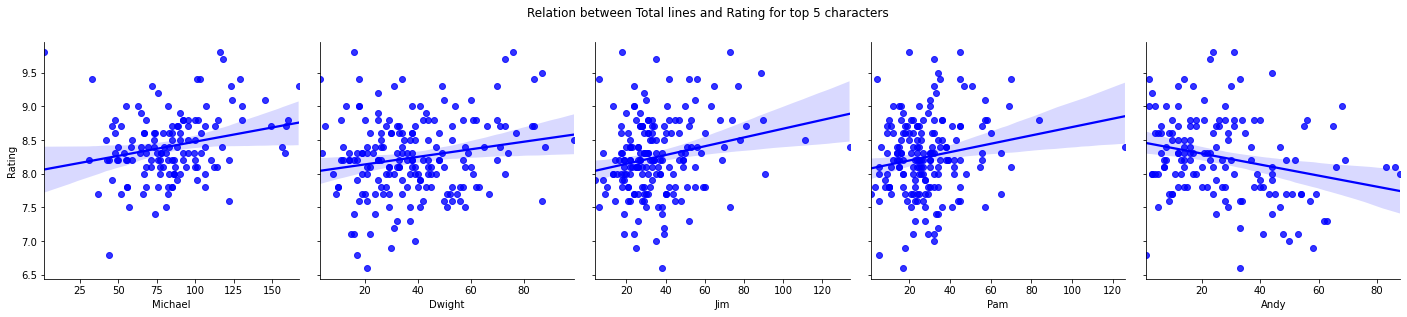

In [248]:
g = sns.PairGrid(df_charpair_lines, y_vars=["Rating"],x_vars=["Michael","Dwight","Jim","Pam","Andy"],height=4)
g.map(sns.regplot,color="blue")
plt.suptitle('Relation between Total lines and Rating for top 5 characters',y=1.08)

Assumption is that if the character has more lines in an episode they are seen majorly through the episode. Upward trend seen for everyone except Andy while Dwight's line is steeper suggesting lesser jump in ratings compared to other 3, meaning even if Dwight has more lines the ratings are still on the lower side. Also ratings tend to drop when Andy has more lines. Jim and Pam have a similar graph while for Michael lowly rated episodes cannot be seen as most of those are from seasons 8 and 9 after he left.

##### Testing some frequently seen character pairs 

In [249]:
#taking only common episodes where both characters have lines
df_charpair_lines['M_D']=df_charpair_lines[['Dwight','Michael']].dropna(how='any').sum(axis=1)
df_charpair_lines['J_D']=df_charpair_lines[['Dwight','Jim']].dropna(how='any').sum(axis=1)
df_charpair_lines['P_J']=df_charpair_lines[['Pam','Jim']].dropna(how='any').sum(axis=1)
df_charpair_lines['M_J']=df_charpair_lines[['Jim','Michael']].dropna(how='any').sum(axis=1)
df_charpair_lines['A_D']=df_charpair_lines[['Dwight','Andy']].dropna(how='any').sum(axis=1)

In [250]:
df_charpair_lines['M_D'].isna().value_counts()
#False tells us how many episodes do both characters have atleast 1 line in

False    137
True      49
Name: M_D, dtype: int64

In [251]:
df_charpair_lines['J_D'].isna().value_counts()#Jim and Dwight both have a line in 185 episodes

False    185
True       1
Name: J_D, dtype: int64

In [252]:
df_charpair_lines['P_J'].isna().value_counts() #Pam and Jim both have a line in 181 episodes

False    181
True       5
Name: P_J, dtype: int64

In [253]:
df_charpair_lines['M_J'].isna().value_counts() #Michael and Jim both have a line in 136 episodes

False    136
True      50
Name: M_J, dtype: int64

In [254]:
df_charpair_lines['A_D'].isna().value_counts() #Andy and Dwight both have a line in 144 episodes

False    144
True      42
Name: A_D, dtype: int64

In [255]:
df_charpair_lines.rename(columns={'M_D': 'Michael-Dwight(137 episodes)', 'J_D': 'Jim-Dwight(185 episodes)', 
                              'P_J':'Pam-Jim(181 episodes)','M_J':'Michael-Jim(136 episodes)',
                              'A_D':'Andy-Dwight(144 episodes)'},inplace=True)

Text(0.5, 1.08, 'Relation between Total lines and Rating for top 5 frequently seen characters pairs')

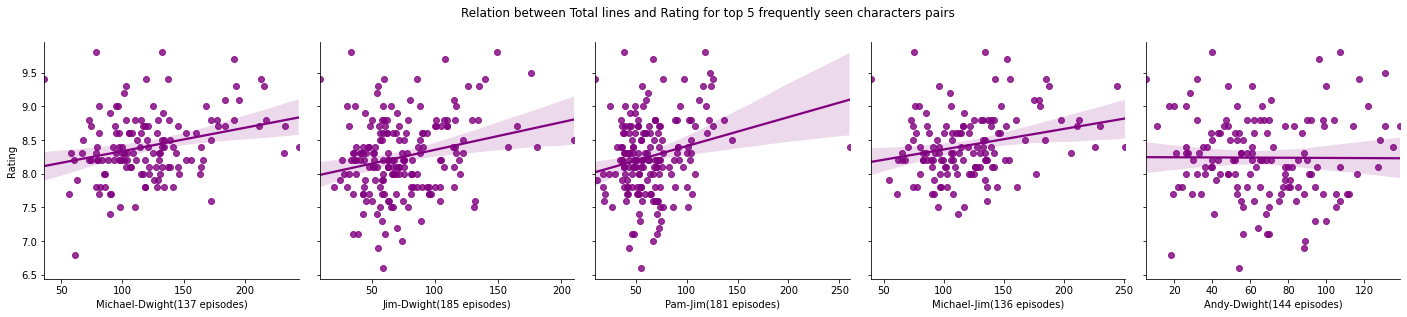

In [256]:
g = sns.PairGrid(df_charpair_lines, y_vars=["Rating"],x_vars=[ 'Michael-Dwight(137 episodes)', 'Jim-Dwight(185 episodes)', 
                              'Pam-Jim(181 episodes)','Michael-Jim(136 episodes)','Andy-Dwight(144 episodes)'],height=4)
g.map(sns.regplot,color="purple")
plt.suptitle('Relation between Total lines and Rating for top 5 frequently seen characters pairs',y=1.08)

Considered only common episodes where both the characters have atleast one line. Assumption is that if both the characters have more lines in an episode they are seen majorly through the episode and interact either with each other or with other characters. Again upward trend seen for all pairs except Andy-Dwight who have a slightly downward trend, considering they both have more lines towards the last two seasons when ratings dipped. Also to note Jim-Dwight have each spoken atleast one line in 185 episodes followed by Pam-Jim(181) and Michael-Dwight(137).

### Ques 4 - Is there a relation between number of scenes spoken by particular characters and Rating?

In [257]:
df_charpair_scenes = dff1[dff1['speaker'].isin(['Andy','Michael','Jim','Pam','Dwight'])]
df_charpair_scenes=df_charpair_scenes.pivot_table(index='speaker', columns=['season','episode'], values='scene',aggfunc='count')
df_charpair_scenes

season      1                                   2                    ...  \
episode    1     2     3     4     5     6     1     2     3     4   ...   
speaker                                                              ...   
Andy      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Dwight   10.0   6.0  16.0  24.0   9.0   7.0  13.0   5.0  20.0  20.0  ...   
Jim      11.0  11.0  11.0  21.0  13.0   9.0  16.0   8.0  22.0  14.0  ...   
Michael  20.0  25.0  19.0  19.0  31.0  21.0  36.0  26.0  22.0  26.0  ...   
Pam      14.0   7.0  10.0  10.0   6.0  11.0  22.0  13.0  12.0   9.0  ...   

season      9                                                        
episode    14    15    16    17    18    19    20    21    22    23  
speaker                                                              
Andy      NaN  11.0  19.0   3.0   6.0  12.0  12.0  20.0   9.0  15.0  
Dwight   11.0   9.0   8.0  18.0   8.0  19.0  10.0  13.0  30.0  27.0  
Jim       7.0   7.0   4.0   3.0   4.0   5.0   7.0  16.0  23.0  33.0  
Michael   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0  
Pam      15.0   6.0  14.0   7.0  11.0   5.0  10.0   6.0  11.0  21.0  

[5 rows x 186 columns]

In [258]:
df_charpair_scenes=df_charpair_scenes.transpose()
df_charpair_scenes=df_charpair_scenes.reset_index()

In [259]:
del df_charpair_scenes['season']
del df_charpair_scenes['episode']

In [260]:
df_charpair_scenes=pd.concat([df_charpair_scenes,df_imdb['Rating']],axis=1)
df_charpair_scenes

Andy  Dwight   Jim  Michael   Pam  Rating
0     NaN    10.0  11.0     20.0  14.0     7.5
1     NaN     6.0  11.0     25.0   7.0     8.3
2     NaN    16.0  11.0     19.0  10.0     7.8
3     NaN    24.0  21.0     19.0  10.0     8.1
4     NaN     9.0  13.0     31.0   6.0     8.4
..    ...     ...   ...      ...   ...     ...
181  12.0    19.0   5.0      NaN   5.0     8.0
182  12.0    10.0   7.0      NaN  10.0     8.0
183  20.0    13.0  16.0      NaN   6.0     9.0
184   9.0    30.0  23.0      NaN  11.0     9.5
185  15.0    27.0  33.0      2.0  21.0     9.8

[186 rows x 6 columns]

Text(0.5, 1.08, 'Relation between Total scenes and Rating for top 5 characters')

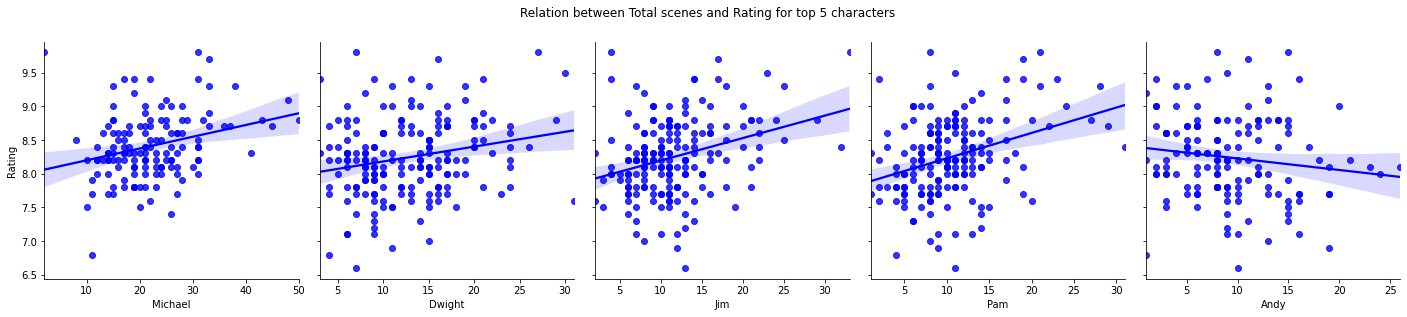

In [261]:
g = sns.PairGrid(df_charpair_scenes, y_vars=["Rating"],x_vars=["Michael","Dwight","Jim","Pam","Andy"],height=4)
g.map(sns.regplot,color="blue")
plt.suptitle('Relation between Total scenes and Rating for top 5 characters',y=1.08)

Assumption is that if the character appears in more scenes in an episode they are seen majorly through the episode. Similar to total lines graphs. Upward trend seen for everyone except Andy while Dwight's line is steeper suggesting lesser jump in ratings compared to other 3, meaning even if Dwight appears in more scenes the ratings are still on the lower side.Also ratings tend to drop when Andy appears in more scenes. Jim and Pam have a similar graph while for Michael lowly rated episodes cannot be seen as most of those are from seasons 8 and 9 after he left.

##### Testing some frequently seen character pairs 

In [265]:
df_charpair_scenes['Michael-Dwight(137 episodes)']=df_charpair_scenes[['Dwight','Michael']].dropna(how='any').sum(axis=1)
df_charpair_scenes['Jim-Dwight(185 episodes)']=df_charpair_scenes[['Dwight','Jim']].dropna(how='any').sum(axis=1)
df_charpair_scenes['Pam-Jim(181 episodes)']=df_charpair_scenes[['Pam','Jim']].dropna(how='any').sum(axis=1)
df_charpair_scenes['Michael-Jim(136 episodes)']=df_charpair_scenes[['Michael','Jim']].dropna(how='any').sum(axis=1)
df_charpair_scenes['Andy-Dwight(144 episodes)']=df_charpair_scenes[['Dwight','Andy']].dropna(how='any').sum(axis=1)

Text(0.5, 1.08, 'Relation between Total scenes and Rating for top 5 frequently seen characters pairs')

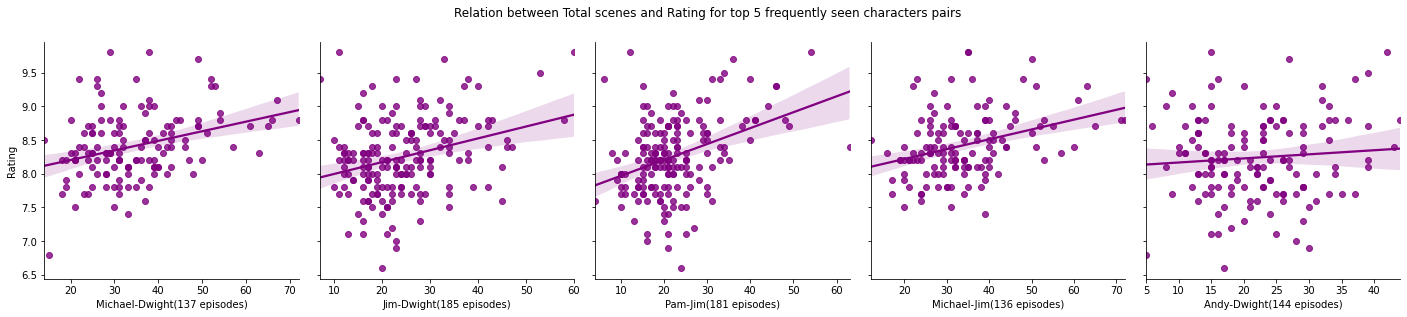

In [266]:
g = sns.PairGrid(df_charpair_scenes, y_vars=["Rating"],x_vars=[ 'Michael-Dwight(137 episodes)', 'Jim-Dwight(185 episodes)', 
                              'Pam-Jim(181 episodes)','Michael-Jim(136 episodes)','Andy-Dwight(144 episodes)'],height=4)
g.map(sns.regplot,color="purple")
plt.suptitle('Relation between Total scenes and Rating for top 5 frequently seen characters pairs',y=1.08)

Upward trend seen for all pairs while Andy-Dwight only have a slightly upward slope.

### Ques 5 - Do the Top 10 best episodes(based on rating and votes) have any peculiar features associated with them?

In [267]:
df_ep.sort_values(by=['Rating','Num_Votes'],ascending=False).head(10)

season  episode                  Title    AirDate  Rating  Num_Votes  \
185       9       23                 Finale 2013-05-16     9.8       9269   
135       7       21       Goodbye, Michael 2011-04-28     9.8       6909   
77        5       13          Stress Relief 2009-02-01     9.7       7058   
184       9       22               A.A.R.M. 2013-05-09     9.5       3401   
59        4        9           Dinner Party 2008-04-10     9.4       4824   
130       7       16  Threat Level Midnight 2011-02-17     9.4       4236   
27        2       22           Casino Night 2006-05-11     9.4       4195   
94        6        4    Niagara: Part 1 & 2 2009-10-08     9.4       4055   
50        3       23                The Job 2007-05-17     9.3       3461   
64        4       14          Goodbye, Toby 2008-05-15     9.3       3453   

        DirectedBy                            WrittenBy  year  month  day  \
185     Ken Kwapis                         Greg Daniels  2013      5    3   
135      Paul Feig                         Greg Daniels  2011      4    3   
77   Jeffrey Blitz                     Paul Lieberstein  2009      2    6   
184   David Rogers                      Brent Forrester  2013      5    3   
59       Paul Feig      Gene Stupnitsky | Lee Eisenberg  2008      4    3   
130   Tucker Gates                          B. J. Novak  2011      2    3   
27      Ken Kwapis                         Steve Carell  2006      5    3   
94       Paul Feig          Greg Daniels | Mindy Kaling  2009     10    3   
50      Ken Kwapis     Paul Lieberstein | Michael Schur  2007      5    3   
64       Paul Feig  Jennifer Celotta | Paul Lieberstein  2008      5    3   

     Difference in days between air dates(season-wise)  \
185                                              238.0   
135                                              217.0   
77                                               129.0   
184                                              231.0   
59                                               196.0   
130                                              147.0   
27                                               233.0   
94                                                21.0   
50                                               238.0   
64                                               231.0   

                                             Combined  episode_no  \
185                        (Ken Kwapis, Greg Daniels)         186   
135                         (Paul Feig, Greg Daniels)         136   
77                  (Jeffrey Blitz, Paul Lieberstein)          78   
184                   (David Rogers, Brent Forrester)         185   
59       (Paul Feig, Gene Stupnitsky | Lee Eisenberg)          60   
130                       (Tucker Gates, B. J. Novak)         131   
27                         (Ken Kwapis, Steve Carell)          28   
94           (Paul Feig, Greg Daniels | Mindy Kaling)          95   
50     (Ken Kwapis, Paul Lieberstein | Michael Schur)          51   
64   (Paul Feig, Jennifer Celotta | Paul Lieberstein)          65   

     Total_lines  Total_scenes  
185          522           116  
135          329            53  
77           416            70  
184          501            70  
59           331            31  
130           72            26  
27           385            57  
94           552            78  
50           544            88  
64           617           103

Peculiar features - 
<br>1) Episodes belong to all seasons except season 1(new show and style of humour hence people take time to get accustomed) and season 8(complete focus on Andy's story arc and Michael's absence not the greatest season). 
<br>2) Ken Kwapis and Paul Feig each directed 3 and 4 episodes in this list respectively - they both have directed the second and third highest number of episodes of the show with all rated above 8. 
<br>3) 3 episodes were written/co-written by Greg Daniels while 3 episodes were written/co-written by Paul Lieberstein - both of them are regular writers of the show having the top two highest median ratings. 
<br>4) Episode 'Casino Night' written by Steve Carell features in the top 10. 
<br>5) The director-writer pairs of top 5 episodes in this list have worked together in atleast 1 other episode throughout the show.
<br>6) Two episodes from season 4,7 and 9 each feature in the top 10.
<br>7) 6 episodes in this list are either either season finale episodes or belong to last few episodes of the season.
<br>8) 9/10 episodes (except "Threat-level Midnight" episode which has an inconsitency in recording of lines and scenes in the dataset because it featured clips mainly) have total lines>75th percentile of lines(323) while 8/10 episodes have total scenes>75th percentile of scenes(52) confirming the trends seen earlier.

In [271]:
highest_lines=df.groupby(['season','episode'])['speaker'].agg(lambda x: (x.value_counts().index[0:5],x.value_counts()[0:5])).tolist()

In [272]:
df_ep['Top5_max_lines']=highest_lines

In [273]:
pd.set_option('display.max_colwidth', -1)

C:\Users\Swarnita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



##### Season wise top rated episodes:

In [275]:
df_ep.sort_values(['Rating','Num_Votes']).groupby(['season']).tail(1)

season  episode                Title    AirDate  Rating  Num_Votes  \
139  8       1        The List            2011-09-22  8.2     2102        
4    1       5        Basketball          2005-04-19  8.4     3745        
50   3       23       The Job             2007-05-17  9.3     3461        
94   6       4        Niagara: Part 1 & 2 2009-10-08  9.4     4055        
27   2       22       Casino Night        2006-05-11  9.4     4195        
59   4       9        Dinner Party        2008-04-10  9.4     4824        
77   5       13       Stress Relief       2009-02-01  9.7     7058        
135  7       21       Goodbye, Michael    2011-04-28  9.8     6909        
185  9       23       Finale              2013-05-16  9.8     9269        

        DirectedBy                         WrittenBy  year  month  day  \
139  B. J. Novak    B. J. Novak                       2011  9      3     
4    Greg Daniels   Greg Daniels                      2005  4      1     
50   Ken Kwapis     Paul Lieberstein | Michael Schur  2007  5      3     
94   Paul Feig      Greg Daniels | Mindy Kaling       2009  10     3     
27   Ken Kwapis     Steve Carell                      2006  5      3     
59   Paul Feig      Gene Stupnitsky | Lee Eisenberg   2008  4      3     
77   Jeffrey Blitz  Paul Lieberstein                  2009  2      6     
135  Paul Feig      Greg Daniels                      2011  4      3     
185  Ken Kwapis     Greg Daniels                      2013  5      3     

     Difference in days between air dates(season-wise)  \
139  0.0                                                 
4    26.0                                                
50   238.0                                               
94   21.0                                                
27   233.0                                               
59   196.0                                               
77   129.0                                               
135  217.0                                               
185  238.0                                               

                                           Combined  episode_no  Total_lines  \
139  (B. J. Novak, B. J. Novak)                      140         274           
4    (Greg Daniels, Greg Daniels)                    5           235           
50   (Ken Kwapis, Paul Lieberstein | Michael Schur)  51          544           
94   (Paul Feig, Greg Daniels | Mindy Kaling)        95          552           
27   (Ken Kwapis, Steve Carell)                      28          385           
59   (Paul Feig, Gene Stupnitsky | Lee Eisenberg)    60          331           
77   (Jeffrey Blitz, Paul Lieberstein)               78          416           
135  (Paul Feig, Greg Daniels)                       136         329           
185  (Ken Kwapis, Greg Daniels)                      186         522           

     Total_scenes  \
139  60             
4    40             
50   88             
94   78             
27   57             
59   31             
77   70             
135  53             
185  116            

                                                    Top5_max_lines  
139  ([Andy, Dwight, Jim, Robert, Pam], [52, 38, 38, 33, 25])       
4    ([Michael, Dwight, Jim, Darryl, Pam], [106, 26, 22, 15, 14])   
50   ([Michael, Dwight, Jim, Pam, David], [123, 70, 65, 51, 47])    
94   ([Michael, Dwight, Pam, Jim, Andy], [129, 84, 70, 56, 33])     
27   ([Michael, Jim, Pam, Jan, Dwight], [103, 52, 45, 40, 34])      
59   ([Michael, Jan, Jim, Pam, Dwight], [101, 90, 42, 35, 18])      
77   ([Michael, Dwight, Jim, Pam, Stanley], [118, 73, 35, 32, 28])  
135  ([Michael, DeAngelo, Andy, Pam, Jim], [116, 25, 24, 20, 18])   
185  ([Dwight, Jim, Pam, Kevin, Andy], [76, 73, 45, 31, 31])

Maximum lines tell us about the character plotlines around whom these episodes revolved. Michael is present with significantly higher lines at the top in all episodes except the seasons where he left.Focus on Pam-Jim relationship plotline can be seen in atleast 3 episodes(Casino Night,The Job,Niagara: Part 1 & 2)

### Ques 6 - Do the Top 10 worst episodes(based on rating and votes) have any peculiar features associated with them?

In [276]:
df_ep.sort_values(by=['Rating','Num_Votes'],ascending=[True,False]).head(10)

season  episode              Title    AirDate  Rating  Num_Votes  \
157  8       19       Get the Girl      2012-03-15  6.6     1944        
103  6       13       The Banker        2010-01-21  6.8     2665        
146  8       8        Gettysburg        2011-11-17  6.9     1850        
167  9       5        Here Comes Treble 2012-10-25  7.0     1780        
159  8       21       Angry Andy        2012-04-19  7.1     1857        
158  8       20       Welcome Party     2012-04-12  7.1     1739        
160  8       22       Fundraiser        2012-04-26  7.1     1694        
164  9       2        Roy's Wedding     2012-09-27  7.2     1730        
141  8       3        Lotto             2011-10-06  7.3     1858        
177  9       15       Couples Discount  2013-02-07  7.3     1655        

         DirectedBy          WrittenBy  year  month  day  \
157  Rainn Wilson    Charlie Grandy     2012  3      3     
103  Jeffrey Blitz   Jason Kessler      2010  1      3     
146  Jeffrey Blitz   Robert Padnick     2011  11     3     
167  Claire Scanlon  Owen Ellickson     2012  10     3     
159  Claire Scanlon  Justin Spitzer     2012  4      3     
158  Ed Helms        Steve Hely         2012  4      3     
160  David Rogers    Owen Ellickson     2012  4      3     
164  Matt Sohn       Allison Silverman  2012  9      3     
141  John Krasinski  Charlie Grandy     2011  10     3     
177  Troy Miller     Allison Silverman  2013  2      3     

     Difference in days between air dates(season-wise)  \
157  175.0                                               
103  126.0                                               
146  56.0                                                
167  35.0                                                
159  210.0                                               
158  203.0                                               
160  217.0                                               
164  7.0                                                 
141  14.0                                                
177  140.0                                               

                             Combined  episode_no  Total_lines  Total_scenes  \
157  (Rainn Wilson, Charlie Grandy)    158         261          41             
103  (Jeffrey Blitz, Jason Kessler)    104         131          21             
146  (Jeffrey Blitz, Robert Padnick)   147         282          45             
167  (Claire Scanlon, Owen Ellickson)  168         292          39             
159  (Claire Scanlon, Justin Spitzer)  160         292          51             
158  (Ed Helms, Steve Hely)            159         307          25             
160  (David Rogers, Owen Ellickson)    161         239          38             
164  (Matt Sohn, Allison Silverman)    165         296          47             
141  (John Krasinski, Charlie Grandy)  142         317          42             
177  (Troy Miller, Allison Silverman)  178         260          35             

                                                       Top5_max_lines  
157  ([Nellie, Jim, Andy, Erin, Robert], [42, 38, 33, 32, 24])         
103  ([Michael, Eric, Toby, Dwight, Computron], [44, 26, 18, 17, 10])  
146  ([Andy, Dwight, Jim, Robert, Oscar], [58, 30, 25, 24, 20])        
167  ([Andy, Dwight, Jim, Pam, Erin], [50, 39, 35, 32, 24])            
159  ([Andy, Nellie, Ryan, Pam, Erin], [53, 36, 30, 29, 24])           
158  ([Andy, Jim, Pam, Erin, Nellie], [48, 39, 32, 25, 22])            
160  ([Andy, Jim, Pam, Kevin, Nellie], [41, 24, 22, 18, 17])           
164  ([Jim, Pam, Andy, Nellie, Erin], [39, 34, 33, 31, 31])            
141  ([Andy, Jim, Darryl, Dwight, Pam], [63, 52, 49, 37, 23])          
177  ([Andy, Dwight, Pam, Erin, Jim], [62, 32, 28, 26, 26])

Peculiar features - 
<br>1) All episodes belong to seasons 8 and 9(after Michael leaves the show!) 
<br>2) Jeffrey Blitz and Claire Scanlon directed 2 episodes each-Jeffery Blitz's all other episodes have high ratings except the two that feature in this list while Claire Scanlon has directed omly these two episodes. 
<br>3) Charlie Grandy, Owen Ellickson and Allison Silverman wrote 2 episodes each. 
<br>4) Episodes directed by the shows's actors Rainn Wilson,Ed Helms and John Krasinski feature in the worst 10. 
<br>5) While for (Matt Sohn, Allison Silverman)-2/2 episodes that they worked together on have ratings < 25th percentile of ratings(<7.8),none of the other director-writer pairs have worked together in another episode.
<br>6) None of the episodes have total lines>75th percentile of lines(323) or total scenes>75th percentile of scenes(52) confirming the trends seen earlier.

##### Season wise worst rated episodes:

In [278]:
df_ep.sort_values(['Rating','Num_Votes']).groupby(['season']).head(1)

season  episode              Title    AirDate  Rating  Num_Votes  \
157  8       19       Get the Girl      2012-03-15  6.6     1944        
103  6       13       The Banker        2010-01-21  6.8     2665        
167  9       5        Here Comes Treble 2012-10-25  7.0     1780        
121  7       7        Christening       2010-11-04  7.4     1966        
0    1       1        Pilot             2005-03-24  7.5     4349        
63   4       13       Job Fair          2008-05-08  7.8     2305        
19   2       14       The Carpet        2006-01-26  7.9     2745        
80   5       16       Blood Drive       2009-03-05  8.0     2164        
31   3       4        Grief Counseling  2006-10-12  8.0     2686        

            DirectedBy                                        WrittenBy  year  \
157  Rainn Wilson       Charlie Grandy                                   2012   
103  Jeffrey Blitz      Jason Kessler                                    2010   
167  Claire Scanlon     Owen Ellickson                                   2012   
121  Alex Hardcastle    Peter Ocko                                       2010   
0    Ken Kwapis         Ricky Gervais | Stephen Merchant | Greg Daniels  2005   
63   Tucker Gates       Gene Stupnitsky | Lee Eisenberg                  2008   
19   Victor Nelli, Jr.  Paul Lieberstein                                 2006   
80   Randall Einhorn    Brent Forrester                                  2009   
31   Roger Nygard       Jennifer Celotta                                 2006   

     month  day  Difference in days between air dates(season-wise)  \
157  3      3    175.0                                               
103  1      3    126.0                                               
167  10     3    35.0                                                
121  11     3    42.0                                                
0    3      3    0.0                                                 
63   5      3    224.0                                               
19   1      3    128.0                                               
80   3      3    161.0                                               
31   10     3    21.0                                                

                                                          Combined  \
157  (Rainn Wilson, Charlie Grandy)                                  
103  (Jeffrey Blitz, Jason Kessler)                                  
167  (Claire Scanlon, Owen Ellickson)                                
121  (Alex Hardcastle, Peter Ocko)                                   
0    (Ken Kwapis, Ricky Gervais | Stephen Merchant | Greg Daniels)   
63   (Tucker Gates, Gene Stupnitsky | Lee Eisenberg)                 
19   (Victor Nelli, Jr., Paul Lieberstein)                           
80   (Randall Einhorn, Brent Forrester)                              
31   (Roger Nygard, Jennifer Celotta)                                

     episode_no  Total_lines  Total_scenes  \
157  158         261          41             
103  104         131          21             
167  168         292          39             
121  122         286          48             
0    1           229          39             
63   64          252          52             
19   20          276          60             
80   81          300          39             
31   32          313          55             

                                                       Top5_max_lines  
157  ([Nellie, Jim, Andy, Erin, Robert], [42, 38, 33, 32, 24])         
103  ([Michael, Eric, Toby, Dwight, Computron], [44, 26, 18, 17, 10])  
167  ([Andy, Dwight, Jim, Pam, Erin], [50, 39, 35, 32, 24])            
121  ([Michael, Jim, Pam, Andy, Dwight], [74, 38, 33, 25, 16])         
0    ([Michael, Pam, Jim, Dwight, Jan], [81, 41, 36, 29, 12])          
63   ([Michael, Pam, Jim, Brad, Andy], [76, 34, 21, 18, 14])           
19   ([Michael, Jim, Pam, Dwight, Ryan], [101, 33, 28, 25, 13])        
80   ([Michael, Jim, Pam

Clearly not everyone's favourite episodes with scattered storylines and not much continuity. Andy, Nellie and Erin can be seen having top 5 lines apart from the usual main characters. 

### Ques 7 - Does a decrease in ratings and votes over time mean lesser people watched the show?

In [279]:
ggg=df_ep.groupby('season') #grouping season-wise to check ratings and votes
ggg1=ggg.get_group(1)
ggg2=ggg.get_group(2)
ggg3=ggg.get_group(3)
ggg4=ggg.get_group(4)
ggg5=ggg.get_group(5)
ggg6=ggg.get_group(6)
ggg7=ggg.get_group(7)
ggg8=ggg.get_group(8)
ggg9=ggg.get_group(9)

In [288]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

text1 = ['for Season 'f"<b>{str(k)}</b>,"'episode 'f"<b>{str(m)}</b>"'<br>titled 'f"<b>{str(v)}</b>"  for (k,m,v) in 
         zip(df_ep['season'].tolist(),df_ep['episode'].tolist(),df_ep['Title'].tolist())]

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])


#Rating-LineChart
fig.add_trace(go.Scatter(
    x=ggg1['episode_no'], y=ggg1['Rating'],
    mode='lines',
    name="Season 1",
    hovertemplate='Rating:%{y}<extra></extra>',
    line=dict(width=2, color='rgb(127, 60, 141)'),
),secondary_y=False,)


#Median Rating-LineChart
fig.add_trace(go.Scatter(
    x=ggg1['episode_no'], y=[ggg1['Rating'].median()]*len(ggg1['episode_no']),
    mode='lines',
    name="Season median",
    showlegend=False,
    line=dict(
        color='rgb(127, 60, 141)',
        width=2,
        dash="dot",
    ),
),secondary_y=False,)

#Rating-LineChart
fig.add_trace(go.Scatter(
    x=ggg2['episode_no'], y=ggg2['Rating'],
    mode='lines',
    name="Season 2",
    hovertemplate='Rating:%{y}<extra></extra>',
    line=dict(width=2, color='rgb(17, 165, 121)'),
),secondary_y=False,)

#Rating-LineChart
fig.add_trace(go.Scatter(
    x=ggg2['episode_no'], y=[ggg2['Rating'].median()]*len(ggg2['episode_no']),
    mode='lines',
    name="Season median",
    showlegend=False,
    line=dict(
        color='rgb(17, 165, 121)',
        width=2,
        dash="dot",
    ),
),secondary_y=False,)

#Rating-LineChart
fig.add_trace(go.Scatter(
    x=ggg3['episode_no'], y=ggg3['Rating'],
    mode='lines',
    name="Season 3",
    hovertemplate='Rating:%{y}<extra></extra>',
    line=dict(width=2, color= 'rgb(57, 105, 172)'),
),secondary_y=False,)

#Rating-LineChart
fig.add_trace(go.Scatter(
    x=ggg3['episode_no'], y=[ggg3['Rating'].median()]*len(ggg3['episode_no']),
    mode='lines',
    name="Season median",
    showlegend=False,
    line=dict(
        color='rgb(57, 105, 172)',
        width=2,
        dash="dot",
    ),
),secondary_y=False,)


#Rating-LineChart
fig.add_trace(go.Scatter(
    x=ggg4['episode_no'], y=ggg4['Rating'],
    mode='lines',
    name="Season 4",
    hovertemplate='Rating:%{y}<extra></extra>',
    line=dict(width=2, color='rgb(242, 183, 1)'),
),secondary_y=False,)

fig.add_trace(go.Scatter(
    x=ggg4['episode_no'], y=[ggg4['Rating'].median()]*len(ggg4['episode_no']),
    mode='lines',
    name="Season median",
    showlegend=False,
    line=dict(
        color='rgb(242, 183, 1)',
        width=2,
        dash="dot",
    ),
),secondary_y=False,)

#Rating-LineChart
fig.add_trace(go.Scatter(
    x=ggg5['episode_no'], y=ggg5['Rating'],
    mode='lines',
    name="Season 5",
    hovertemplate='Rating:%{y}<extra></extra>',
    line=dict(width=2, color='rgb(231, 63, 116)'),
),secondary_y=False,)

fig.add_trace(go.Scatter(
    x=ggg5['episode_no'], y=[ggg5['Rating'].median()]*len(ggg5['episode_no']),
    mode='lines',
    name="Season median",
    showlegend=False,
    line=dict(
        color='rgb(231, 63, 116)',
        width=2,
        dash="dot",
    ),
),secondary_y=False,)

#Rating-LineChart
fig.add_trace(go.Scatter(
    x=ggg6['episode_no'], y=ggg6['Rating'],
    mode='lines',
    name="Season 6",
    hovertemplate='Rating:%{y}<extra></extra>',
    line=dict(width=2, color='rgb(128, 186, 90)'),
),secondary_y=False,)


fig.add_trace(go.Scatter(
    x=ggg6['episode_no'], y=[ggg6['Rating'].median()]*len(ggg6['episode_no']),
    mode='lines',
    name="Season median",
    showlegend=False,
    line=dict(
        color='rgb(128, 186, 90)',
        width=2,
        dash="dot",
    ),
),secondary_y=False,)

#Rating-LineChart
fig.add_trace(go.Scatter(
    x=ggg7['episode_no'], y=ggg7['Rating'],
    mode='lines',
    name="Season 7",
    hovertemplate='Rating:%{y}<extra></extra>',
    line=dict(width=2, color='rgb(230, 131, 16)'),
),secondary_y=False,)

fig.add_trace(go.Scatter(
    x=ggg7['episode_no'], y=[ggg7['Rating'].median()]*len(ggg7['episode_no']),
    mode='lines',
    name="Season median",
    showlegend=False,
    line=dict(
        color='rgb(230, 131, 16)',
        width=2,
        dash="dot",
    ),
),secondary_y=False,)

#Rating-LineChart
fig.add_trace(go.Scatter(
    x=ggg8['episode_no'], y=ggg8['Rating'],
    mode='lines',
    name="Season 8",
    hovertemplate='Rating:%{y}<extra></extra>',
    line=dict(width=2, color='rgb(0, 134, 149)'),
),secondary_y=False,)

fig.add_trace(go.Scatter(
    x=ggg8['episode_no'], y=[ggg8['Rating'].median()]*len(ggg8['episode_no']),
    mode='lines',
    name="Season median",
    showlegend=False,
    line=dict(
        color='rgb(0, 134, 149)',
        width=2,
        dash="dot",
    ),
),secondary_y=False,)

#Rating-LineChart
fig.add_trace(go.Scatter(
    x=ggg9['episode_no'], y=ggg9['Rating'],
    mode='lines',
    name="Season 9",
    hovertemplate='Rating:%{y}<extra></extra>',
    line=dict(width=2, color='rgb(249, 123, 114)'),
),secondary_y=False,)

fig.add_trace(go.Scatter(
    x=ggg9['episode_no'], y=[ggg9['Rating'].median()]*len(ggg9['episode_no']),
    mode='lines',
    name="Season median",
    showlegend=False,
    line=dict(
        color='rgb(249, 123, 114)',
        width=2,
        dash="dot",
    ),
),secondary_y=False,)



#Number of Votes-Filled Area Chart
fig.add_trace(go.Scatter(
     x=ep_no, y=df_ep['Num_Votes'],fill='tozeroy', #fill down to x-axis
     text=text1,
     name="Votes",
     mode='lines',
     hovertemplate='Votes:%{y}<br>%{text}<extra></extra>',
     opacity=0.2,
     line=dict(width=1.8,color='violet'),
),secondary_y=True,)


#Adding logo
fig.add_layout_image(
    dict(
        source="https://images-na.ssl-images-amazon.com/images/I/41kl2e8bYiL._AC_SX355_.jpg",
        xref="paper", yref="paper",
        x=0.29, y=1.02,
        sizex=0.32, sizey=0.34,
        xanchor="right", yanchor="bottom"
    )
)


fig.update_layout(
      paper_bgcolor='white',
      plot_bgcolor='white',
      annotations=[
            dict(
                text='Note:The ratings for each episode are calculated using a weighted average system by IMDB based on votes casted by registered users(on a scale of 1 to 10).',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=0.5,
                y=-0.185,
                font=dict(
                family="Arial",
                size=10,
            ),
            ),
        ],

        hoverlabel=dict(font=dict(family='Courier New,monospace')),
        hovermode="x unified",
        width=1000,height=500,
        title_font_family="Courier New,monospace",
        font_family="Courier New,monospace",
        font_color="black",
        font_size=11.5,
        title_font_color='rgb(36, 73, 147)',
        title_font_size=16.5,
        margin=dict(
        l=80,
        r=80,
        b=60,
        t=110,),
    title={
        'text': "<b>Season-wise summary of IMDB Ratings and Votes for each episode</b><br><sub>Decline in ratings and stagnant votes after Michael leaves except last few episodes;major<br>peaks seen at same instances between ratings and votes indicating popularity of those episodes.</sub>",
        'y':0.925,
        'x':0.64,
        'xanchor': 'center',
        'yanchor': 'top'
    }

)
fig.add_annotation(x=185, y=9.75,
            text="Finale episode<br>(Michael's cameo)",
            showarrow=True,
            arrowhead=1,
            font=dict(
            family="Courier New, monospace",
            size=11,
            color='rgb(249, 123, 114)'
            ),
        align="center",
        #arrowhead=2,
        arrowsize=1,
        arrowwidth=1.5,
        arrowcolor="#636363",
        ax=-80,
        ay=-0.2,)

fig.add_annotation(x=135, y=9.75,
            text="Michael's last<br>episode",
            showarrow=True,
            arrowhead=1,
            font=dict(
            family="Courier New, monospace",
            size=11,
            color='rgb(230, 131, 16)'
            ),
        align="center",
        #arrowhead=2,
        arrowsize=1,
        arrowwidth=1.5,
        arrowcolor="#636363",
        ax=-75,
        ay=-0.2,)

fig.add_annotation(x=103, y=6.85,
            text="Previous clips<br>compilation episode",
            showarrow=True,
            arrowhead=1,
            font=dict(
            family="Courier New, monospace",
            size=11,
            color='rgb(128, 186, 90)'
            ),
        align="center",
        #arrowhead=2,
        arrowsize=1,
        arrowwidth=1.5,
        arrowcolor="#636363",
        ax=-90,
        ay=-0.2,)

fig.add_annotation(x=157, y=6.65,
            text="Nellie comes to<br>Scranton episode",
            showarrow=True,
            arrowhead=1,
            font=dict(
            family="Courier New, monospace",
            size=11,
            color='rgb(0, 134, 149)'
            ),
        align="center",
        #arrowhead=2,
        arrowsize=1,
        arrowwidth=1.5,
        arrowcolor="#636363",
        ax=-80,
        ay=-0.2,)


# Set x-axis title
fig.update_xaxes(title_text="Episode")

# Set y-axes titles
fig.update_yaxes(title_text="Ratings", secondary_y=False)
fig.update_yaxes(title_text="Number of Votes", secondary_y=True)

fig.show(config={"displayModeBar": False, "showTips": False})

Ratings seem to pick up after season 1 (naturally because audience took time to get accustomed to the style of humour) but the votes begin to decrease. The decrease in votes does not necessarily suggest decline in viewership as highly rated peaks are in tow with highly voted peaks in places. This means those were the audience-favourite,most-loved and famous episodes of the show and hence attracted more viewers. Even though season 9 wasn’t as bad as season 8 probably because of the way season 8's story arc went many viewers would not have wanted to watch season 9 which explains why it isn’t voted high(saturated votes).

1) The season finale episodes end on a higher rating than the first episode of the season except for season 6 and 8 which particularly see a declining trend in the ratings towards the last few episodes. The show’s finales are scripted with partial closure to storylines which hypes the anticipation for the next season making them highly rated. The season 6 finale episode “Whistleblower” hinted Holly’s return but it was the lowest rated finale compared to all previous seasons (except season 1). While season 8 finale episode “Free Family Portrait Studio” showing Andy’s dramatic janitor-to-manager return to the office was a sad conclusion to an already disappointing season.
<br>2) Season 6 and 8 experimented with the most number of new director-writer pairs (who worked together in just one episode) accounting for almost 80% of the episodes in both seasons. This explains why the season 6 episodes seemed different from the previous seasons and were not so engaging. Besides season 6 was also the longest running season with Jim as co-manager and the Sabre storylines. 
<br>3) Whole of season 8 was focused on Andy’s character (him as Regional manager, his family, personal life) and the mediocre writing merely reduced him to a caricature trying to portray him as a replacement to Michael’s character. The season also saw diversion into the Florida storyline and the introduction of two eccentric characters - Robert California and Nellie Bertram which did not favour the ratings.

In [281]:
import plotly.express as px

print(px.colors.qualitative.Bold)

['rgb(127, 60, 141)', 'rgb(17, 165, 121)', 'rgb(57, 105, 172)', 'rgb(242, 183, 1)', 'rgb(231, 63, 116)', 'rgb(128, 186, 90)', 'rgb(230, 131, 16)', 'rgb(0, 134, 149)', 'rgb(207, 28, 144)', 'rgb(249, 123, 114)', 'rgb(165, 170, 153)']


In [1521]:
!pip install chart_studio

In [1522]:
import chart_studio

In [1523]:
username = '' # enter your username
api_key = '' # enter your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [289]:
import chart_studio.plotly as py
py.plot(fig, filename = 'ratings_and_votes', auto_open=True)

'https://plotly.com/~swarnitav08/17/'

### Ques 8 - Decoding season 8 and 9 : What went wrong in season 8 and a slightly better season 9? (apart from Michael's absence)

Looking for any peculiar features associated from the charts created above and some additional analysis:

1) Though season 8(7083) and season 9(7111) have similar total number of lines, season 9 had the highest number of speakers amongst all seasons(around 50 more speakers than season 8) considering it was the last season and brought back characters like Roy and Jan along with introduction of many new characters due to the scattered storylines(Clark,Pete,Dwight's family and friends,Jim's Philly office).

<br>2) From the season-wise distribution of lines and scenes (line charts) that we saw earlier we can conclude that:
   <br>2.1 - Erin, Darryl and Andy had their all time highest lines and scenes in season 8 while Kevin and Jim had their all time highest scenes.
   <br>2.2 - Angela and Oscar had their all time highest lines and scenes in season 9 while Pam and Kevin had their all time highest lines and Meredith had her all time highest scenes.
   
<br>3) Season 8 experimented with the most number of new director-writer pairs(who worked together in just one episode) accounting for almost 80% of the episodes in the season.
   
<br>4) Episodes with higher lines and scenes tend to have higher ratings but season 8 particularly does not have even one episode with high lines and scenes - all episodes concentrated within 400 lines and 60 scenes.

<br>5) Seasons 8 and 9 saw the lowest and saturated number of votes(apart from last few episodes) but season 9's ratings seem to see an increase towards the end.

##### Lines distribution: Who had the maximum lines?

In [291]:
df_8=df[df['season']==8] #isolating seasons 8 and 9 lines
df_9=df[df['season']==9]

<AxesSubplot:>

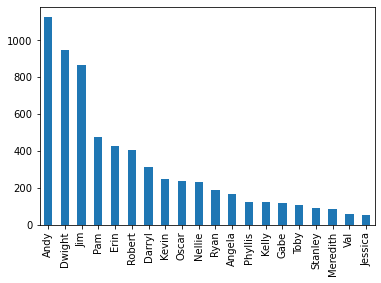

In [292]:
df_8['speaker'].value_counts().head(20).plot(kind='bar')

Andy's story arc was completely focused upon - besides him becoming the Regional Manager and his ways of managing the office,his family and personal life were also shown leading him to top the highest lines. A diversion into the Florida storyline and the introduction of two eccentric characters - Robert California and Nellie Bertram was seen. Darryl's story arc brought to focus while Dwight and Jim along with the other supporting characters continued to try saving the storyline. 

<AxesSubplot:>

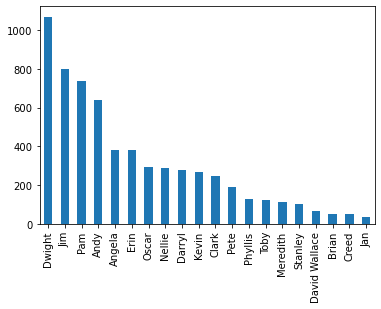

In [294]:
df_9['speaker'].value_counts().head(20).plot(kind='bar')

Focus shifted to Dwight's story arc(farm life,friends,manager position,relationship with Angela) and Jim's story arc(relationship stress with Pam,his own sports company in Philly). While the initial episodes did focus on Andy's character, since Ed Helms was away for some episodes shooting for The Hangover Part III movie the focus was shifted onto other characters which seems to have helped the show's ratings. Oscar and Angela also got their dues because of the Senator angle jumping onto the top 5th and 7th spots. Clark and Pete were introduced.

##### Scenes distribution: Who had the maximum scenes?

In [295]:
dfs_8=dff1[dff1['season']==8] #isolating seasons 8 and 9 scenes
dfs_9=dff1[dff1['season']==9]

<AxesSubplot:>

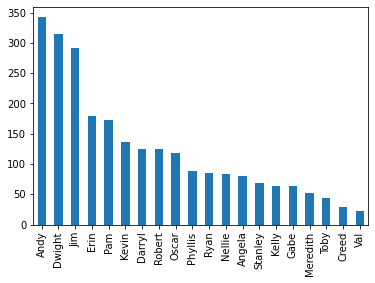

In [296]:
dfs_8['speaker'].value_counts().head(20).plot(kind='bar')

Robert California spoke more lines than Kevin who appeared in more scenes while Nellie spoke more lines than Ryan and Phyliss  who appeared in more scenes indicating emphasis placed on guest stars.

<AxesSubplot:>

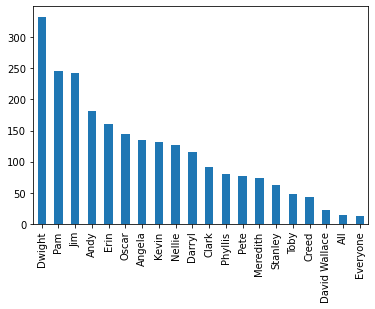

In [297]:
dfs_9['speaker'].value_counts().head(20).plot(kind='bar')

Though Pam appeared in more scenes, Jim had more lines. Similarly Angela appeared in lesser scenes than Erin and Oscar but spoke more lines than them explaining her all time highest lines in this season. Bringing back Nellie to show her character development in the background by humanising her and showing her friendhsip with Pam seemed forced.

##### Who directed episodes in seasons 8 and 9?

In [298]:
df_imdb_8=df_imdb[df_imdb['Season']==8]
df_imdb_9=df_imdb[df_imdb['Season']==9]

In [299]:
df_imdb['DirectedBy'].value_counts()

Randall Einhorn      15
Paul Feig            14
Ken Kwapis           13
Greg Daniels         13
Jeffrey Blitz        11
Ken Whittingham      9 
David Rogers         9 
Matt Sohn            8 
Charles McDougall    8 
Paul Lieberstein     7 
B. J. Novak          5 
Tucker Gates         4 
Brent Forrester      4 
Troy Miller          3 
Jennifer Celotta     3 
Steve Carell         3 
Rainn Wilson         3 
John Krasinski       3 
Harold Ramis         3 
Dennie Gordon        2 
Claire Scanlon       2 
Ed Helms             2 
Mindy Kaling         2 
Seth Gordon          2 
Rodman Flender       2 
Bryan Gordon         2 
Dean Holland         2 
Victor Nelli, Jr.    2 
Julian Farino        2 
Joss Whedon          2 
Jason Reitman        2 
Amy Heckerling       1 
Craig Zisk           1 
Michael Spiller      1 
Marc Webb            1 
Lee Kirk             1 
Bryan Cranston       1 
Eric Appel           1 
Miguel Arteta        1 
Lee Eisenberg        1 
Gene Stupnitsky      1 
Daniel Chun     

In [300]:
df_imdb_8['DirectedBy'].value_counts()

David Rogers         3
B. J. Novak          3
Matt Sohn            3
Charles McDougall    2
Ed Helms             2
Charlie Grandy       1
Daniel Chun          1
Brian Baumgartner    1
Randall Einhorn      1
Brent Forrester      1
Eric Appel           1
Jeffrey Blitz        1
John Krasinski       1
Troy Miller          1
Rainn Wilson         1
Claire Scanlon       1
Name: DirectedBy, dtype: int64

In [301]:
df_imdb_9['DirectedBy'].value_counts()

David Rogers         3
Matt Sohn            3
Rodman Flender       2
Charles McDougall    1
Paul Lieberstein     1
Troy Miller          1
Jesse Peretz         1
John Krasinski       1
Jon Favreau          1
Jennifer Celotta     1
Bryan Cranston       1
Brent Forrester      1
Kelly Cantley        1
Lee Kirk             1
Jeffrey Blitz        1
Ken Kwapis           1
Greg Daniels         1
Claire Scanlon       1
Name: DirectedBy, dtype: int64

In [302]:
l1=df_imdb['DirectedBy'].value_counts().index[:10]
l1 #regular directors

Index(['Randall Einhorn', 'Paul Feig', 'Ken Kwapis', 'Greg Daniels',
       'Jeffrey Blitz', 'Ken Whittingham', 'David Rogers', 'Matt Sohn',
       'Charles McDougall', 'Paul Lieberstein'],
      dtype='object')

In [303]:
l2=df_imdb['DirectedBy'].value_counts().index[10:]
l2 #not regular directors

Index(['B. J. Novak', 'Tucker Gates', 'Brent Forrester', 'Troy Miller',
       'Jennifer Celotta', 'Steve Carell', 'Rainn Wilson', 'John Krasinski',
       'Harold Ramis', 'Dennie Gordon', 'Claire Scanlon', 'Ed Helms',
       'Mindy Kaling', 'Seth Gordon', 'Rodman Flender', 'Bryan Gordon',
       'Dean Holland', 'Victor Nelli, Jr.', 'Julian Farino', 'Joss Whedon',
       'Jason Reitman', 'Amy Heckerling', 'Craig Zisk', 'Michael Spiller',
       'Marc Webb', 'Lee Kirk', 'Bryan Cranston', 'Eric Appel',
       'Miguel Arteta', 'Lee Eisenberg', 'Gene Stupnitsky', 'Daniel Chun',
       'J. J. Abrams', 'Charlie Grandy', 'Roger Nygard', 'Jesse Peretz',
       'Danny Leiner', 'Stephen Merchant', 'John Stuart Scott',
       'Brian Baumgartner', 'Alex Hardcastle', 'Kelly Cantley',
       'Reggie Hudlin', 'Jon Favreau', 'Asaad Kelada'],
      dtype='object')

In [319]:
df_rdir=df_imdb[df_imdb['DirectedBy'].isin(l1)]
df_nrdir=df_imdb[df_imdb['DirectedBy'].isin(l2)]

In [320]:
rd=df_rdir.groupby('Season')['DirectedBy'].count().tolist()
nrd=df_nrdir.groupby('Season')['DirectedBy'].count().tolist()

In [321]:
rdp=(df_rdir.groupby('Season')['DirectedBy'].count()*100/df.groupby('season')['episode'].nunique()).tolist() 
#saving percent wrt number of episodes
rdp=np.around(rdp,1)
rdp

array([66.7, 77.3, 56.5, 64.3, 69.2, 50. , 54.2, 41.7, 47.8])

In [322]:
nrdp=(df_nrdir.groupby('Season')['DirectedBy'].count()*100/df.groupby('season')['episode'].nunique()).tolist() 
#saving percent wrt number of episodes
nrdp=np.around(nrdp,1)
nrdp

array([33.3, 22.7, 43.5, 35.7, 30.8, 50. , 45.8, 58.3, 52.2])

In [570]:
fig=go.Figure()
fig.add_trace(go.Bar(x=seasons, y=nrd,name='Not regular directors',#not regular directors
                            customdata=[str(i) for i in episodes],
                            hovertemplate= "%{y}/%{customdata}",  
                            text=nrdp,textposition='auto'
))
fig.add_trace(go.Bar(x=seasons, y=rd, name='Regular directors',#regular directors
                            customdata=[str(i) for i in episodes],
                            hovertemplate= "%{y}/%{customdata}",  
                            text=rdp,textposition='auto'
))
fig.update_layout(barmode='stack',title="Season-wise number of regular/not regular directors distribution")
fig.update_xaxes(title="Season")
fig.update_yaxes(title="Number of directors")
fig.show()

Considering "Regular director" as a director who has directed atleast 6 episodes(length of season 1) and "Not regular director" as a director who has directed less than 6 episodes throughout the show hence using this graph to draw conclusions for initial seasons might not be correct and sensible but can be used for analysing later seasons(especially season 8 and 9). Season 8 and 9 saw highest(>50%) percent of episodes being directed by not regular directors compared to other seasons.

##### Who wrote episodes in seasons 8 and 9?

In [314]:
df_imdb['WrittenBy'].value_counts()

Mindy Kaling                                       20
B. J. Novak                                        15
Paul Lieberstein                                   13
Gene Stupnitsky | Lee Eisenberg                    13
Justin Spitzer                                     9 
Brent Forrester                                    9 
Greg Daniels                                       9 
Jennifer Celotta                                   8 
Charlie Grandy                                     7 
Halsted Sullivan | Warren Lieberstein              7 
Michael Schur                                      7 
Aaron Shure                                        6 
Daniel Chun                                        6 
Carrie Kemper                                      4 
Owen Ellickson                                     4 
Robert Padnick                                     4 
Allison Silverman                                  3 
Steve Hely                                         3 
Lee Eisenberg | Gene Stupnit

In [315]:
df_imdb_8['WrittenBy'].value_counts()

Charlie Grandy                           2
Daniel Chun                              2
Justin Spitzer                           2
Robert Padnick                           2
Mindy Kaling                             2
B. J. Novak                              2
Steve Hely                               2
Owen Ellickson                           2
Halsted Sullivan | Warren Lieberstein    2
Allison Silverman                        1
Aaron Shure                              1
Dan Greaney                              1
Paul Lieberstein                         1
Amelie Gillette                          1
Carrie Kemper                            1
Name: WrittenBy, dtype: int64

In [316]:
df_imdb_9['WrittenBy'].value_counts()

Carrie Kemper                            2
Allison Silverman                        2
Greg Daniels                             2
Dan Sterling                             2
Brent Forrester                          2
Owen Ellickson                           2
Graham Wagner                            2
Niki Schwartz-Wright                     2
Jonathan Green | Gabe Miller             2
Robert Padnick                           1
Tim McAuliffe                            1
Dan Greaney                              1
Paul Lieberstein                         1
Halsted Sullivan | Warren Lieberstein    1
Name: WrittenBy, dtype: int64

In [317]:
l11=df_imdb['WrittenBy'].value_counts().index[:13]
l11 #regular writers

Index(['Mindy Kaling', 'B. J. Novak', 'Paul Lieberstein',
       'Gene Stupnitsky | Lee Eisenberg', 'Justin Spitzer', 'Brent Forrester',
       'Greg Daniels', 'Jennifer Celotta', 'Charlie Grandy',
       'Halsted Sullivan | Warren Lieberstein', 'Michael Schur', 'Aaron Shure',
       'Daniel Chun'],
      dtype='object')

In [318]:
l22=df_imdb['WrittenBy'].value_counts().index[13:]
l22

Index(['Carrie Kemper', 'Owen Ellickson', 'Robert Padnick',
       'Allison Silverman', 'Steve Hely',
       'Lee Eisenberg | Gene Stupnitsky | Michael Schur', 'Steve Carell',
       'Amelie Gillette', 'Jon Vitti', 'Lester Lewis', 'Niki Schwartz-Wright',
       'Anthony Q. Farrell', 'Dan Sterling', 'Dan Greaney',
       'Jennifer Celotta | Paul Lieberstein',
       'Brent Forrester | Justin Spitzer', 'Jonathan Green | Gabe Miller',
       'Graham Wagner', 'Ryan Koh', 'Jason Kessler', 'Jonathan Hughes',
       'Ricky Gervais | Stephen Merchant', 'Tim McAuliffe',
       'Jennifer Celotta | Greg Daniels', 'Greg Daniels | Mindy Kaling',
       'Ricky Gervais | Stephen Merchant | Greg Daniels', 'Larry Wilmore',
       'Paul Lieberstein | Michael Schur', 'Peter Ocko', 'Caroline Williams'],
      dtype='object')

In [324]:
df_rwri=df_imdb[df_imdb['WrittenBy'].isin(l11)]
df_nrwri=df_imdb[df_imdb['WrittenBy'].isin(l22)]

In [325]:
rw=df_rwri.groupby('Season')['WrittenBy'].count().tolist()
nrw=df_nrwri.groupby('Season')['WrittenBy'].count().tolist()

In [326]:
rwp=(df_rwri.groupby('Season')['WrittenBy'].count()*100/df.groupby('season')['episode'].nunique()).tolist() 
#saving percent wrt number of episodes
rwp=np.around(rwp,1)
rwp

array([83.3, 90.9, 69.6, 71.4, 76.9, 87.5, 70.8, 58.3, 26.1])

In [327]:
nrwp=(df_nrwri.groupby('Season')['WrittenBy'].count()*100/df.groupby('season')['episode'].nunique()).tolist() 
nrwp=np.around(nrwp,1)
nrwp

array([16.7,  9.1, 30.4, 28.6, 23.1, 12.5, 29.2, 41.7, 73.9])

In [571]:
fig=go.Figure()
fig.add_trace(go.Bar(x=seasons, y=nrw,name='Not regular writers',#not regular writers
                            customdata=[str(i) for i in episodes],
                            hovertemplate= "%{y}/%{customdata}",  
                            text=nrwp,textposition='auto'
))
fig.add_trace(go.Bar(x=seasons, y=rw, name='Regular writers',#regular writers
                            customdata=[str(i) for i in episodes],
                            hovertemplate= "%{y}/%{customdata}",  
                            text=rwp,textposition='auto'
))
fig.update_layout(barmode='stack',title="Season-wise number of regular/not regular writers distribution")
fig.update_xaxes(title="Season")
fig.update_yaxes(title="Number of writers")
fig.show()

Similar assumptions as "Regular and non-regular director", considering "Regular writer" as a writer who has written atleast 6 episodes(length of season 1) and "Not regular writer" as a writer who has written less than 6 episodes throughout the show hence using this graph to draw conclusions for initial seasons might not be correct and sensible but can be used for analysing later seasons(especially season 8 and 9). Season 8 and 9 saw highest percent of episodes being written by not regular writers with season 9 having more than 70% episodes written by not regular writers compared to other seasons.

### Conclusion:

SEASON 8:
<br>•	Given the fact that Andy Bernard is a great character on paper and Ed Helms is a good actor, the mediocre writing and storytelling merely reduced him to a caricature trying to portray him as a replacement to Michael’s character. Also put in too much of Andy Bernard in every episode throughout the season. The writers apparently wanted to make Darryl (Craig Robinson) the manager but thought he was too smart to take decisions leading to comical situations.
<br>•	The season also saw unnecessarily extended storylines (Gabe cribbing over Erin in the background), randomly abandoned storylines (Darryl-Val, Cathy) and haphazard storylines (Florida store). 
<br>•	The cast additions also didn’t help - Robert California’s and Nellie Bertram’s storylines did more damage to the ratings than expected.

SEASON 9:
<br>•	As Ed Helms (Andy) was away filming Hangover part III, Andy’s scenes were slashed by half and dialogues by 40 % from season 8, which might have worked in favour for the ratings.
<br>•	The storylines got more real and personal with new friendships like Nellie-Pam, Dwight-Erin, Jim-Darryl along with a peak into the documentary crew.

## (b) Data pre-processing

In [330]:
a=df['speaker'].unique()
print(sorted(a))

["(Pam's mom) Heleen", '3rd Athlead Employee', '4th Athlead Employee', 'A.J.', 'AJ', 'Aaron Rodgers', 'Abby', 'Actor', 'Actress', 'Ad guy 1', 'Ad guy 2', 'Air Force recruiter', 'Alan', 'Albiny', 'Alex', 'Alice', 'All', 'All Girls', 'All but Oscar', 'All the Men', 'Alonzo', 'Amanda', 'Amy', 'Andy', 'Andy & Erin', 'Andy & Michael', 'Andy & Walter', 'Andy and Darryl', 'Andy and Dwight', 'Andy and Erin', 'Andy and Jim', 'Andy and Michael', 'Andy, Creed, Kevin, Kelly', 'Andy, Creed, Kevin, Kelly, Darryl', 'Andy, Darryl & Officer Foley', 'Andy/Oscar', 'Andy/Pam', 'Andy/Stanley', 'Angel', 'Angela', 'Angela & Oscar', 'Angela and Dwight', 'Angela and Kelly', 'Angela/Pam', 'Angels', 'Anglea', 'Announcer', 'Another guy', 'Archivist', 'Artist', 'Astrid', 'Athlead Coworker', 'Athlead Employee', 'Attendant', 'Audience', 'Aunt Shirley', 'Automated phone voice', 'Ballerinas', 'Bar Manager', 'Barbara', 'Barbara Allen', 'Bartender', 'Bass Player', 'Ben', 'Ben Franklin', 'Bert', 'Beth', 'Bill', 'Bill Cre

##### Filtering to check and confirm speaker's occurences in the dataset 

In [11]:
df[df['speaker'].isin(['Angel','Angels','Anglea'])]

season  episode  scene  \
8897        2       21     25   
18441       4        3     44   
38790       7        2     25   

                                               line_text speaker  
8897   I didn't do it! [Michael and Stanley continue ...  Anglea  
18441                                       Okay.  Okay.  Angels  
38790                Please and thank you go a long way.   Angel

In [15]:
#confirming if 'Angels' is 'Angela' only after observing few dialogues above and below
df.loc[18435:18450]

season  episode  scene  \
18435       4        3     44   
18436       4        3     44   
18437       4        3     44   
18438       4        3     44   
18439       4        3     44   
18440       4        3     44   
18441       4        3     44   
18442       4        3     44   
18443       4        3     45   
18444       4        3     45   
18445       4        3     45   
18446       4        3     45   
18447       4        3     45   
18448       4        3     45   
18449       4        3     45   
18450       4        3     45   

                                               line_text  speaker  
18435                                     Go-Go dancers?   Angela  
18436  I want it to embarrass all other parties.  I w...  Michael  
18437                                   I can't do this.   Angela  
18438                                       Yes you can.  Michael  
18439                                     I can't do it.   Angela  
18440  Yes you can.  I know you can.  I wouldn't say ...  Michael  
18441                                       Okay.  Okay.   Angels  
18442  No seriously.  Is there anyone else who could ...  Michael  
18443                       What do you think of Angela?     Andy  
18444                           I think she's efficient.   Dwight  
18445         No, not like that, as a woman.  W-O-M-A-N.     Andy  
18446                                  I hadn't noticed.   Dwight  
18447                  You hadn't noticed she's a woman?     Andy  
18448                                   [impatient sigh]   Dwight  
18449  I hear she's single and ready to mingle.  I'm ...     Andy  
18450  I think it's inappropriate to date someone you...   Dwight

In [16]:
df[df['speaker'].isin(['Holy'])]

season  episode  scene  \
22484       4       14     77   
43487       7       17     20   

                                               line_text speaker  
22484  I'm not so specific as I can be on my first da...    Holy  
43487     She was laughing hysterically that whole time!    Holy

In [17]:
df[df['speaker'].isin(['Bob', 'Bob Vance', 'Bob Vance, Vance Refrigeration'])]

season  episode  scene  \
5515        2       10     46   
5517        2       10     46   
5519        2       10     46   
5577        2       10     60   
9365        2       22     46   
9373        2       22     46   
9399        2       22     50   
10673       3        5     20   
10679       3        5     20   
13752       3       14     34   
13904       3       15     28   
13910       3       15     30   
13956       3       15     41   
13958       3       15     41   
13960       3       15     41   
13962       3       15     41   
13964       3       15     41   
16040       3       21     44   
17517       4        1     88   
20941       4       10     31   
22581       4       14     97   
23947       5        4     34   
23980       5        4     39   
23988       5        4     39   
23990       5        4     39   
23997       5        4     39   
24001       5        4     39   
24007       5        4     39   
24011       5        4     39   
24015       5        4     39   
24019       5        4     39   
27692       5       16     17   
27702       5       16     19   
27710       5       16     19   
27717       5       16     19   
27828       5       16     33   
27830       5       16     33   
27833       5       16     33   
27835       5       16     33   
27837       5       16     33   
30448       5       25     40   
30450       5       25     40   
34689       6       12     44   
34697       6       12     44   
49827       8       14     15   
49829       8       14     15   
49831       8       14     15   
49833       8       14     15   
58401       9       20     30   

                                               line_text  \
5515                     Bob Vance, Vance Refrigeration.   
5517                     Bob Vance, Vance Refrigeration.   
5519                     Bob Vance, Vance Refrigeration.   
5577   Oh, hey. Listen up. We're going to Poor Richar...   
9365                                   Good Luck, honey.   
9373                                                Yes!   
9399   Excuse me. Big moment. The evening's chip lead...   
10673                           Well settle down, Scott.   
10679                             What a pair of Mary's.   
13752  Absolutely not.  That's all you.  That's all you.   
13904                                              I do.   
13910  If you ever lay I finger on Phyllis, I'll kill...   
13956                            Oh okay. That's enough.   
13958                        Thanks, Michael. Give me...   
13960                            Give me the microphone.   
13962        Give me... Give me the microphone, Michael.   
13964                                You're out of here!   
16040                       Phyllis, you okay? You sure?   
17517                  Let... let's pick it up, Phyllis!   
20941                                     Where's Scott?   
22581                      Mmm.  Well, what about there?   
23947                                                125   
23980                     When are you getting to Bruce?   
23988                                 I'll bid on a hug.   
23990                                       100 dollars.   
23997                                                300   
24001                                                325   
24007                                                400   
24011                                                500   
24015                                                700   
24019                                               1000   
27692  I honestly don't know how you can work with th...   
27702  Everyone here who's bowled a 280 please raise ...   
27710  One time. You love bringing up that one time, ...   
27717    Oh yeah.  You can always model ladies' jewelry.   
27828                                           OK then.   
27830                                     Where were we?   
27833                   You didn't eat much there Jimbo.   
27835           

In [18]:
df[df['speaker'].isin(['Carol', 'Carol Stills', 'Carrol', 'Carroll'])]

season  episode  scene  \
2820        2        3     14   
2827        2        3     16   
2830        2        3     16   
2852        2        3     22   
2855        2        3     22   
...       ...      ...    ...   
39438       7        4     32   
39440       7        4     32   
39443       7        4     32   
59814       9       23     86   
59817       9       23     86   

                                               line_text       speaker  
2820   Michael, this is Bill. He's the head of the co...         Carol  
2827                   Are we ready to sign some papers?         Carol  
2830              It's a very gay-friendly neighborhood.         Carol  
2852   And then, I just need you to sign here at this...         Carol  
2855        Well, ten over thirty, so thirty year total.         Carol  
...                                                  ...           ...  
39438  Yes, yes Michael. Actually you do make a bigge...       Carroll  
39440  Well so do I, but we didn't love each other at...        Carrol  
39443                                                No.       Carroll  
59814                               Oh, I���m sorry Pam.  Carol Stills  
59817  [whispering] I���m so sorry. They were an hour...         Carol  

[103 rows x 5 columns]

In [19]:
df[df['speaker'].isin(['Dight','Dwight [on phone]', 'Dwight.', 'Dwight:', 'DwightKSchrute'])]

season  episode  scene  \
11437       3        7     50   
18250       4        3     20   
18253       4        3     20   
18313       4        3     26   
23236       5        2      6   
36974       6       20      7   
44975       7       23      3   

                                               line_text            speaker  
11437  Stranford is closed! Michael, we're not closed...            Dwight:  
18250                          [on monitor] You tell me.     DwightKSchrute  
18253         [on monitor] How do I know this isn't Jim?     DwightKSchrute  
18313  [on monitor] Here's a suggestion computer.  I ...     DwightKSchrute  
23236                                           Michael.              Dight  
36974                                        Hello, Pam.            Dwight.  
44975   Mose... you'll never guess where I am right now.  Dwight [on phone]

In [27]:
df[df['speaker'].isin(['Mee-Maw', 'MeeMaw', 'Mema'])]

season  episode  scene  \
31859       6        4     22   
31861       6        4     22   
31925       6        4     31   
31928       6        4     31   
31942       6        4     32   
31956       6        4     34   
31959       6        4     36   
31961       6        4     36   
31963       6        4     36   
31965       6        4     36   
31967       6        4     36   
31969       6        4     36   
31971       6        4     36   
40306       7        7     35   
40347       7        7     43   

                                               line_text  speaker  
31859  I wasn't sure about your branch of the family....     Mema  
31861  Well... I wouldn't care to live if I thought t...     Mema  
31925               What's obvious? Why can't Pam drink?     Mema  
31928                         They were living together?     Mema  
31942  I should have known. The hotels television set...     Mema  
31956  Oh. You're that foul guy that kept talking abo...     Mema  
31959  I want to go to bed but I can't. I can't turn ...     Mema  
31961                                     Oh. Thank you.     Mema  
31963                 It was that horrible Charlie Rose.     Mema  
31965          People are like cats and dogs these days.     Mema  
31967              This used to be such a great country.     Mema  
31969                  I don't know what happened to it.     Mema  
31971                                  You mean, Sylvia.     Mema  
40306  Fine, fine. I guess I'll watch Suzanne's purse...  Mee-Maw  
40347                I don't know. I lost the purse too.   MeeMaw

In [28]:
df[df['speaker'].isin(['Receptionist', 'Receptionitis15', 'Receptionitis15 [screen name]'])]

season  episode  scene  \
16876       3       23     68   
19362       4        5     11   
23026       5        1     89   
23031       5        1     89   
23033       5        1     89   
23758       5        4      1   
27384       5       15     15   
27386       5       15     15   
27388       5       15     15   
27390       5       15     15   
27392       5       15     15   
39597       7        5     14   
48786       8       11      5   
48788       8       11      5   
48884       8       11     13   
48902       8       11     15   
52370       8       23     21   
52372       8       23     21   
52374       8       23     21   
52376       8       23     21   

                                               line_text  \
16876  [phone rings, picks up] Dunder Mifflin, this i...   
19362                 You have a call from Eddie Murphy.   
23026                                     What -- today?   
23031                                             Where?   
23033  Alright. See you there. : ) P.S. I finally fin...   
23758                                   Pam, line three.   
27384                                Hi, can I help you?   
27386           Yes, we were expecting you. Have a seat.   
27388  Actually, she's on an HR retreat for the next ...   
27390  But, if you need to get in touch with her imme...   
27392    Yeah, he's her boyfriend. He's just over there.   
39597                                He's ready for you.   
48786  Oh, hello Mr. Schrute. I'll tell him you're he...   
48788  Ooh. I'm glad you're on our team. Here, please...   
48884                     This must be very frustrating.   
48902                             Well, you got my vote.   
52370                    Oh, do you have an appointment?   
52372                Okay, I think I can squeeze you in.   
52374                       He���s really not that busy.   
52376                                     Yes, this man.   

                             speaker  
16876                   Receptionist  
19362                   Receptionist  
23026  Receptionitis15 [screen name]  
23031                Receptionitis15  
23033                Receptionitis15  
23758                   Receptionist  
27384                   Receptionist  
27386                   Receptionist  
27388                   Receptionist  
27390                   Receptionist  
27392                   Receptionist  
39597                   Receptionist  
48786                   Receptionist  
48788                   Receptionist  
48884                   Receptionist  
48902                   Receptionist  
52370                   Receptionist  
52372                   Receptionist  
52374                   Receptionist  
52376                   Receptionist

In [29]:
df[df['speaker'].isin(['Pam ', 'Pam [on phone]', 'Pam as fourth-biggest client', 'Pam as ninth-biggest client'])]

season  episode  scene  \
23856       5        4     18   
23858       5        4     18   
23860       5        4     18   
23862       5        4     18   
41261       7       10     26   
45709       7       24     80   
45710       7       24     80   
45711       7       24     80   
45712       7       24     80   
45713       7       24     80   

                                               line_text  \
23856   [Jim holds up phone] You are such a dork! Shots!   
23858                                     I'm not drunk.   
23860                    Okay, I do not sound like that.   
23862                                          Scranton.   
41261                                              Yeah?   
45709                   [in a comedic male voice] Hello!   
45710        [in high-pitched, damsel-like voice] Hello!   
45711  Hi, how are ya? [Erin looks amused, Stanley an...   
45712  Ohho! I'm good! Don't you just love paper, and...   
45713  Hey, are you single? This seems like a love co...   

                            speaker  
23856                Pam [on phone]  
23858                Pam [on phone]  
23860                Pam [on phone]  
23862                Pam [on phone]  
41261                          Pam   
45709  Pam as fourth-biggest client  
45710   Pam as ninth-biggest client  
45711  Pam as fourth-biggest client  
45712   Pam as ninth-biggest client  
45713  Pam as fourth-biggest client

In [18]:
df[df['speaker'].isin(['Cousin Mose','Mose', 'Mose [on phone]'])]

season  episode  scene  \
10739       3        5     31   
18850       4        4     24   
19274       4        4     91   
19276       4        4     91   
19278       4        4     91   
19280       4        4     91   
19282       4        4     91   
19285       4        4     91   
19287       4        4     91   
19288       4        4     92   
19290       4        4     92   
19292       4        4     92   
19296       4        4     92   
19299       4        4     92   
38660       7        2      3   
38662       7        2      3   
44976       7       23      3   
46707       8        4     16   
46709       8        4     16   
46711       8        4     16   
46713       8        4     16   
46715       8        4     16   
52756       8       24     36   
52758       8       24     36   
56277       9       13     23   
56279       9       13     23   
56281       9       13     23   
56283       9       13     23   
57485       9       17      7   
57488       9       17      7   
57490       9       17      7   
59624       9       23     42   
59648       9       23     45   

                                               line_text speaker  
10739                         Bye, Ryan. He seemed nice.    Mose  
18850                                  But you promised.    Mose  
19274                   [clears throat] Everybody poops.    Mose  
19276    There's no other... way to get rid of the food.    Mose  
19278                                              Gone.    Mose  
19280                                     His day place.    Mose  
19282                                       What office?    Mose  
19285                                            Angela?    Mose  
19287                                   Angela [leaves].    Mose  
19288  [on trampoline] Cannonball! Lemon bomb!  Jim, ...    Mose  
19290                 Okay, go Yankees!  I'm a war hero!    Mose  
19292  Name's Mose, buddy!  Dwight, can I stop?  They...    Mose  
19296                                       Large spins!    Mose  
19299                                        Helicopter!    Mose  
38660                                              Aaah!    Mose  
38662                                  Welcome children.    Mose  
44976                                        Aaaaahhhhh!    Mose  
46707       I'm the valet. You have to give me your car.    Mose  
46709  I'm the... I'm the valet. You have to give me ...    Mose  
46711                                  Give me your car.    Mose  
46713                                  Give me your car.    Mose  
46715            Get out. Have a good time at the thing.    Mose  
52756                                        Hi, Angela.    Mose  
52758                           I'm not supposed to say.    Mose  
56277                                     People person.    Mose  
56279                                    That���s right.    Mose  
56281                                               Yes.    Mose  
56283                                              Okay.    Mose  
57485  [playing guitar and singing 'Oh What a Beautif...    Mose  
57488                                        Hi' to Mom.    Mose  
57490                        Will there be ghosts there?    Mose  
59624                       Well, first, buy us a drink.    Mose  
59648                                       Guten Prank.    Mose

In [331]:
df['speaker'].nunique()

790

##### Data cleaning for correcting spelling errors

In [332]:
df['speaker'].replace(['Angel','Angels','Anglea'], "Angela", inplace=True)
df['speaker'].replace(['AJ'], "A.J.", inplace=True)
df['speaker'].replace(['Bob', 'Bob Vance, Vance Refrigeration'], "Bob Vance", inplace=True)
df['speaker'].replace(['Billy'], "Billy Merchant", inplace=True)
df['speaker'].replace(['Carol', 'Carrol', 'Carroll'] , "Carol Stills",inplace=True)
df['speaker'].replace(['CPR trainer'] , "CPR Trainer",inplace=True)
df['speaker'].replace(['Casey Dean'] , "Casey",inplace=True)
df['speaker'].replace(['Concierge'] ,"Concierge Marie",inplace=True)
df['speaker'].replace(['Dan'] ,"Dan Gore",inplace=True)
df['speaker'].replace(['Dacvid Walalce', 'Dacvid Wallace','David Wallcve','David'],"David Wallace",inplace=True)
df['speaker'].replace(['DeAgnelo', 'DeAngelo', 'Deangelo','Denagelo'],"Deangelo Vickers",inplace=True)
df['speaker'].replace(['Diane'] ,"Diane Kelly",inplace=True)
df['speaker'].replace(['Doug [church member]'] ,"Doug",inplace=True)
df['speaker'].replace(['D','Dwight ','Dight','Dwight [on phone]', 'Dwight.', 'Dwight:'],"Dwight",inplace=True)
df['speaker'].replace(['Darrly', 'Darry', 'Daryl'], "Darryl", inplace=True)
df['speaker'].replace(['Female church member [to Michael]'] , "Female church member", inplace=True)
df['speaker'].replace(['Fred Henry'] ,"Fred",inplace=True)
df['speaker'].replace(['Group: Dunder Mifflin!\nAndy: Andy Bernard presents: Summer Softball Epic Fails! [Kevin swings bat on screen, fart noise follows] Fail. [repeats] Fail',"[Clark and Pete are shown on screen]\nVideo Andy: Hey, I'm Pete, puberty is such a drag, man. And I'm Clark! I like to eat toilet paper. [Clark and Pete wave at camera] We fail! [Video shows memorial of Jerry", '[repeats]\nAndy: Fail'] ,"Video Andy",inplace=True)
df['speaker'].replace(['Hank [the security guard]', 'Hank the Security Guard'], "Hank", inplace=True)
df['speaker'].replace(["(Pam's mom) Heleen","Pam's Mom",'Helen',"Pam's mom"], "Helene", inplace=True)
df['speaker'].replace(['Holy'], "Holly", inplace=True)
df['speaker'].replace(['JIM9334'] ,"JIM9334 [screen name]",inplace=True)
df['speaker'].replace(['JIm', 'Jim '], "Jim", inplace=True)
df['speaker'].replace(['Jan [on phone]'], "Jan", inplace=True)
df['speaker'].replace(['Jo Bennett'], "Jo", inplace=True)
df['speaker'].replace(['Mr. Kapoor'], "Kelly's Father", inplace=True)
df['speaker'].replace(['Mrs. Kapoor'], "Kelly's Mom", inplace=True)
df['speaker'].replace(['M ichael', 'MIchael','Micael', 'Micahel', 'Michae', 'Michael ', 'Michael [on phone]', 'Michal', 'Micheal', 'Michel', 'Mihael', 'Miichael','Video Michael'],"Michael",inplace=True)
df['speaker'].replace(['Mee-Maw','Mema'],"MeeMaw",inplace=True)
df['speaker'].replace(['Meridith'],"Meredith",inplace=True)
df['speaker'].replace(['Todd','Packer'],"Todd Packer",inplace=True)
df['speaker'].replace(['Pam ', 'Pam [on phone]', 'Pam as fourth-biggest client', 'Pam as ninth-biggest client'],"Pam",inplace=True)
df['speaker'].replace(['Phylis', 'Phyliss'], "Phyllis",inplace=True)
df['speaker'].replace(['Ryan Howard'],"Ryan",inplace=True)
df['speaker'].replace(['Receptionitis15'], "Receptionitis15 [screen name]", inplace=True)
df['speaker'].replace(['Paul'],"Paul Faust",inplace=True)
df['speaker'].replace(['Philip'],"Phillip",inplace=True)
df['speaker'].replace(['Phil'],"Phil Maguire",inplace=True)
df['speaker'].replace(['Stanely'], "Stanley",inplace=True)
df['speaker'].replace(['abe'],"Gabe",inplace=True)
df['speaker'].replace(['sAndy'],"Andy",inplace=True)
df['speaker'].replace(['Cousin Mose', 'Mose [on phone]'],"Mose",inplace=True)
df['speaker'].replace(['Chares'], "Charles",inplace=True)
df['speaker'].replace(['Isabelle'],'Isabel',inplace=True)
df['speaker'].replace(['Nellie Bertram'],"Nellie",inplace=True) 
df['speaker'].replace(['Tom'],"Tom Halpert",inplace=True) 
df['speaker'].replace(['Warren'],"Warren Buffet",inplace=True) 
df['speaker'].replace(['Senator', 'Senator Liptop'],"Senator Lipton",inplace=True) 
df['speaker'].replace(['Robert'],"Robert California",inplace=True)

In [333]:
df['speaker'].nunique()

699

In [334]:
df[df['speaker'].isin(['Cathy','Kathy'])]

season  episode  scene  \
35845  6       16       55      
35950  6       16       63      
35953  6       16       63      
47553  8       7        3       
47555  8       7        3       
47557  8       7        3       
47559  8       7        3       
47728  8       7        23      
47740  8       7        25      
47742  8       7        25      
47744  8       7        25      
47746  8       7        25      
47748  8       7        25      
48395  8       9        41      
48736  8       10       47      
48738  8       10       47      
48741  8       10       47      
48875  8       11       12      
49082  8       12       13      
49086  8       12       13      
49202  8       12       26      
49305  8       12       39      
49801  8       14       10      
50008  8       14       41      
50024  8       15       7       
50072  8       15       12      
50091  8       15       15      
50093  8       15       15      
50294  8       16       11      
50296  8       16       11      
50322  8       16       15      
50324  8       16       15      
50326  8       16       15      
50390  8       16       24      
50392  8       16       24      
50394  8       16       24      
50396  8       16       24      
50398  8       16       24      
50465  8       16       32      
50467  8       16       32      
50485  8       16       32      
50488  8       16       32      
50505  8       16       33      
50509  8       16       35      
50511  8       16       35      
50513  8       16       35      
50515  8       16       35      
50517  8       16       35      
50519  8       16       35      
50570  8       16       40      
50575  8       16       40      
50577  8       16       40      
50579  8       16       40      
50581  8       16       40      
50583  8       16       40      
50615  8       17       3       
50617  8       17       3       
50658  8       17       9       
50660  8       17       9       
51051  8       18       30      

                                                                                                                                                                                               line_text  \
35845  Hi.                                                                                                                                                                                                 
35950  [waking up]  Oh,has she been fussing long?                                                                                                                                                          
35953  I was out like a light...  Oh, she's not hungry...                                                                                                                                                  
47553  Hi.                                                                                                                                                                                                 
47555  I think everything is under control.                                                                                                                                                                
47557  You should sit down.                                                                                                                                                                                
47559  No I should go fill out my paperwork.                                                                                                                                                               
47728  Are you okay?                                                                                                                                                                                       
47740  Yeah, take your time.                                                                                                                                 

In [335]:
df.loc[48395:50008]['speaker'].replace('Kathy','Cathy',inplace=True)
#Cathy tagged as 'Kathy'

In [336]:
df.loc[24141:31925]['speaker'].replace('Pete','Pete Halpert',inplace=True)
#both Pete Miller and Pete Halpert tagged 'Pete'

In [337]:
df.loc[41774:41826]['speaker'].replace('Robert','Senator Lipton',inplace=True)
#both Senator Lipton and Robert California tagged 'Robert'

In [338]:
df[df['speaker'].isin(['Pete Halpert'])]

season  episode  scene  \
24141  5       5        19      
24143  5       5        19      
24145  5       5        19      
24147  5       5        19      
24149  5       5        19      
24170  5       5        22      
24227  5       5        29      
24231  5       5        29      
24266  5       5        35      
24268  5       5        35      
24273  5       5        35      
24276  5       5        35      
24279  5       5        35      
24285  5       5        35      
24287  5       5        35      
31901  6       4        29      
31903  6       4        29      
31905  6       4        29      
31908  6       4        31      
31910  6       4        31      
31921  6       4        31      
32203  6       4        71      

                                                                                                                                     line_text  \
24141  That's perfect. You know what would be even more hilarious? Remember that thing we did when Jim was in high school with his girlfriend?   
24143  That, is awesome!                                                                                                                         
24145  Oh yeah.                                                                                                                                  
24147  I think this is better.                                                                                                                   
24149  This is nicer, it's fun. It's fun!                                                                                                        
24170  Nice to see you again, Pam.                                                                                                               
24227  Yeah, not a lot of money in the arts, right?                                                                                              
24231  Hey, just having fun Jimmy.                                                                                                               
24266  Yeah but, she doesn't think she's gonna be like, career musician right?                                                                   
24268  Just saying. How many famous trumpeters can you name besides... Louis Armstrong?                                                          
24273  The point is Pam, is there are jobs-                                                                                                      
24276  And there are hobbies. I love baseball more than anything, but you don't see me try to get on the Mets.                                   
24279  I'm just calling it like I see it.                                                                                                        
24285  It was Pam's idea. Pam was the mastermind.                                                                                                
24287  That was killer. I was so close to blowing it.                                                                                            
31901  Alright, so I'll be like, 'You're so sweet guys and so kind'.                                                                             
31903  Like, 'What? What?'. And then we'll just give him a little punch in the back and--                                                        
31905  You know what? Never too married for a noogie.                                                                                            
31908  Smoking.                                                                                                                                  
31910  A little mo' cardio.                                                                                                                      
31921  Douche.                                                                                                                                   
32203  Sisters in the can and we to

In [339]:
df[df['speaker'].isin(['Pete'])].head(60)

season  episode  scene  \
52838  9       1        19      
52848  9       1        21      
52850  9       1        21      
52852  9       1        21      
52933  9       1        35      
52935  9       1        35      
52937  9       1        35      
52939  9       1        35      
52977  9       1        42      
52979  9       1        42      
52981  9       1        42      
52998  9       1        45      
53000  9       1        45      
53050  9       2        8       
53054  9       2        8       
53056  9       2        8       
53058  9       2        8       
53060  9       2        8       
53122  9       2        18      
53130  9       2        19      
53180  9       2        29      
53186  9       2        30      
53228  9       2        37      
53256  9       2        42      
53258  9       2        42      
53260  9       2        42      
53262  9       2        42      
53278  9       2        44      
53295  9       2        45      
53372  9       3        15      
53376  9       3        16      
53438  9       3        29      
53440  9       3        29      
53558  9       3        48      
53680  9       4        16      
53827  9       4        31      
53967  9       5        19      
54027  9       5        27      
54226  9       6        14      
54228  9       6        14      
54230  9       6        14      
54440  9       6        48      
54442  9       6        48      
54444  9       6        48      
54446  9       6        48      
54448  9       6        48      
54450  9       6        48      
54452  9       6        48      
54509  9       7        10      
54512  9       7        11      
54624  9       7        26      
54676  9       7        33      
54678  9       7        33      
54680  9       7        33      
54682  9       7        33      
54684  9       7        33      
54686  9       7        33      
54771  9       8        6       
54808  9       8        11      
54810  9       8        11      

                                                                                                                                                                                                                                                                                                                                                                                                                               line_text  \
52838  No thank you. My name���s Pete.                                                                                                                                                                                                                                                                                                                                                                                                     
52848  Pete!                                                                                                                                                                                                                                                                                                                                                                                                                               
52850  What? Why?                                                                                                                                                                                                                                                                                                                                                                                                                          
52852  No I���m not.                                                                                                                                                                                                                                                                     

In [340]:
df[df['speaker'].isin(['Senator Lipton'])]

season  episode  scene  \
49416  8       13       11      
49421  8       13       11      
49497  8       13       18      
49500  8       13       18      
49553  8       13       25      
49559  8       13       27      
49561  8       13       27      
49638  8       13       31      
49640  8       13       31      
52065  8       22       14      
52067  8       22       14      
52146  8       22       25      
52152  8       22       27      
52173  8       22       33      
52175  8       22       33      
52177  8       22       33      
52621  8       24       18      
52623  8       24       18      
52627  8       24       18      
52631  8       24       19      
52636  8       24       21      
52651  8       24       25      
52654  8       24       25      
52656  8       24       25      
52658  8       24       25      
52674  8       24       27      
52676  8       24       27      
52793  8       24       44      
52795  8       24       44      
52797  8       24       44      
54010  9       5        25      
54012  9       5        25      
54014  9       5        25      
54016  9       5        25      
54018  9       5        25      
54419  9       6        42      
54422  9       6        42      
54425  9       6        42      
56546  9       14       21      
56594  9       14       27      
56596  9       14       27      
56643  9       14       32      
56651  9       14       32      
56676  9       14       35      
56679  9       14       35      
56681  9       14       35      
57970  9       18       33      

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 line_text  \
49416  Well, meet our not-so-little bundle of joy, Philip Halsted Lipton.                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
49421  Yes, he's substantial.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
49497  No, no, no, he's nine pounds, seven ounces.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
49500  Well, if it's anything like that gorgeous wrapping paper, you hit it out of the park.                                                                                                                                                                                                                                  

In [341]:
a=df['speaker'].unique()
print(sorted(a))

['3rd Athlead Employee', '4th Athlead Employee', 'A.J.', 'Aaron Rodgers', 'Abby', 'Actor', 'Actress', 'Ad guy 1', 'Ad guy 2', 'Air Force recruiter', 'Alan', 'Albiny', 'Alex', 'Alice', 'All', 'All Girls', 'All but Oscar', 'All the Men', 'Alonzo', 'Amanda', 'Amy', 'Andy', 'Andy & Erin', 'Andy & Michael', 'Andy & Walter', 'Andy and Darryl', 'Andy and Dwight', 'Andy and Erin', 'Andy and Jim', 'Andy and Michael', 'Andy, Creed, Kevin, Kelly', 'Andy, Creed, Kevin, Kelly, Darryl', 'Andy, Darryl & Officer Foley', 'Andy/Oscar', 'Andy/Pam', 'Andy/Stanley', 'Angela', 'Angela & Oscar', 'Angela and Dwight', 'Angela and Kelly', 'Angela/Pam', 'Announcer', 'Another guy', 'Archivist', 'Artist', 'Astrid', 'Athlead Coworker', 'Athlead Employee', 'Attendant', 'Audience', 'Aunt Shirley', 'Automated phone voice', 'Ballerinas', 'Bar Manager', 'Barbara', 'Barbara Allen', 'Bartender', 'Bass Player', 'Ben', 'Ben Franklin', 'Bert', 'Beth', 'Bill', 'Bill Cress', 'Bill Hader', 'Billy Merchant', "Billy's Girlfriend"

In [23]:
df[df['speaker'].isin(['All Girls', 'All but Oscar', 'All the Men'])]

season  episode  scene                              line_text  \
7326        2       15     48  Generalized mumbling agreement. Yeah.   
21283       4       11     29                                  Wooo!   
44984       7       23      6                        ...under God...   

             speaker  
7326     All the Men  
21283      All Girls  
44984  All but Oscar

In [24]:
#season 2 "All" and season 9 "All" might not be same as newer characters were introduced in later seasons
#which chars present in the scene depends on particular scene
df[df['speaker'].isin(['All'])]

season  episode  scene  \
5374        2       10     17   
16357       3       22     61   
18459       4        3     46   
18463       4        3     46   
18468       4        3     46   
...       ...      ...    ...   
59625       9       23     42   
59657       9       23     48   
59670       9       23     53   
59679       9       23     55   
59862       9       23     97   

                                               line_text speaker  
5374   Three, two, one. [very dim lights come on the ...     All  
16357                                              Yeah!     All  
18459                              [murmurs of approval]     All  
18463                         [disagreeing with Michael]     All  
18468                            [shouts of disapproval]     All  
...                                                  ...     ...  
59625  If you want your bride, buy us a drink! If you...     All  
59657                                           Stanley!     All  
59670  Nard Dog! [cheers and claps] Ree-De-De-De-Doo!...     All  
59679                                              Awww.     All  
59862                                               Hey!     All  

[62 rows x 5 columns]

In [25]:
#speaking together instances
df[df['speaker'].isin(['Angela & Oscar', 'Angela and Dwight', 'Angela and Kelly', 'Angela/Pam'])]

season  episode  scene  \
21846       4       13     25   
28616       5       19     26   
50272       8       16      8   
57971       9       18     33   
58972       9       22     25   
59174       9       22     45   

                                               line_text            speaker  
21846  [silently working] [Pam walks back into office...  Angela and Dwight  
28616  Yep! Yeah. He just loved having people, commun...   Angela and Kelly  
50272                                      Unbelievable!         Angela/Pam  
57971                                          Hi honey!     Angela & Oscar  
58972                                       Kevin, what?     Angela & Oscar  
59174                                              Shhh!     Angela & Oscar

In [249]:
#singing instances
df[df['speaker'].isin(['Andy & Erin', 'Andy & Michael', 'Andy & Walter', 'Andy and Darryl', 'Andy and Dwight', 'Andy and Erin', 'Andy and Jim', 'Andy and Michael', 'Andy, Creed, Kevin, Kelly', 'Andy, Creed, Kevin, Kelly, Darryl', 'Andy, Darryl & Officer Foley', 'Andy/Oscar', 'Andy/Pam', 'Andy/Stanley'])]

season  episode  scene  \
11078  3       6        40      
11080  3       6        40      
11082  3       6        40      
11084  3       6        40      
11756  3       8        47      
11762  3       8        47      
12636  3       10       57      
19412  4       5        23      
19414  4       5        23      
19416  4       5        23      
19441  4       5        26      
19443  4       5        26      
19446  4       5        26      
30795  6       1        1       
32315  6       5        11      
34888  6       14       9       
34891  6       14       9       
36155  6       17       21      
36157  6       17       21      
36159  6       17       21      
36161  6       17       21      
43059  7       15       26      
46804  8       4        40      
46806  8       4        40      
46809  8       4        40      
47193  8       6        3       
47198  8       6        7       
47823  8       7        36      
47825  8       7        36      
47827  8       7        36      
48236  8       9        20      
49715  8       13       42      
51704  8       21       8       

                                                                                                                                                                                                                                                                            line_text  \
11078  [sing] There's more than one answer to these questions pointing me in a crooked line                                                                                                                                                                                             
11080  [sing] the less I seek my source...                                                                                                                                                                                                                                              
11082  [sing] the closer I am to fi-i-i-ne. The closer I am to..                                                                                                                                                                                                                        
11084  [sing] fi-i-i-ine!                                                                                                                                                                                                                                                               
11756  Don't hurt me! Baby, don't hurt me!                                                                                                                                                                                                                                              
11762  Whoa-oh-oh-oh! Whoa-oh-oh...                                                                                                                                                                                                                                                     
12636  [singing] And if you want love, we'll make it. Swim in a big sea of blankets. Take all your big plans and break 'em. This is bound to take awhile. Your body is a wonderland. [Michael notices Cindy ride up to him on the bike and looks confused] Your body is a wonderland.   
19412  Call Michael or Stanley, Jim, Dwight or Creed. Call Andy and Kelly for your business paper needs.                                                                                                                                                                                
19414  The people person's paper people.                                                                                                                                                                                                                                                
19416  The people person's paper people.                                  

In [342]:
df.groupby('season')['speaker'].nunique()

season
1    30 
2    117
3    110
4    105
5    124
6    135
7    126
8    132
9    184
Name: speaker, dtype: int64

##### Inspecting Characters' famous references

##### Michael's "That's what she said"

In [344]:
mask1=df['line_text'].str.contains("That's what she", na=False, case=False)
michaelfamous=df[mask1]
michaelfamous

season  episode  scene  \
2544   2       2        24      
2546   2       2        24      
2590   2       2        34      
2593   2       2        34      
5324   2       10       2       
6321   2       12       33      
7643   2       17       6       
8871   2       21       22      
9623   3       1        49      
10903  3       5        59      
12593  3       10       49      
13336  3       12       41      
14301  3       17       9       
14373  3       17       23      
15385  3       20       11      
16405  3       22       68      
17569  4       2        6       
18959  4       4        45      
20121  4       7        56      
20124  4       7        56      
20269  4       8        23      
20271  4       8        23      
20277  4       8        23      
20282  4       8        23      
20715  4       9        19      
21480  4       12       2       
22337  4       14       51      
23149  5       1        111     
23910  5       4        30      
24196  5       5        25      
24754  5       6        27      
28089  5       17       27      
28974  5       20       29      
31337  6       2        30      
36370  6       18       9       
40586  7       8        29      
42259  7       13       1       
43114  7       15       30      
44695  7       21       51      
54087  9       5        29      

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      line_text  \
2544   That's what she said. Pam?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
2546   That's what she sai [clears throat]  Nope, but... Okay. Well, suit yourself.                                                                                                                                                                                                                                                                                                                                                                                                                                                               
2590   Does that include 'That's What She Said'?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
2593   THAT'S WHAT SHE SAID!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [345]:
michaelfamous.shape

(40, 5)

In [346]:
michaelfamous.drop(28974,inplace=True) #not a reference hence dropping

In [347]:
michaelfamous[michaelfamous['speaker'].isin(['Michael'])]

season  episode  scene  \
2544   2       2        24      
2546   2       2        24      
2593   2       2        34      
5324   2       10       2       
7643   2       17       6       
8871   2       21       22      
9623   3       1        49      
12593  3       10       49      
14301  3       17       9       
15385  3       20       11      
17569  4       2        6       
18959  4       4        45      
20121  4       7        56      
20269  4       8        23      
20271  4       8        23      
20277  4       8        23      
20715  4       9        19      
21480  4       12       2       
22337  4       14       51      
23149  5       1        111     
23910  5       4        30      
24196  5       5        25      
31337  6       2        30      
36370  6       18       9       
40586  7       8        29      
44695  7       21       51      

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      line_text  \
2544   That's what she said. Pam?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
2546   That's what she sai [clears throat]  Nope, but... Okay. Well, suit yourself.                                                                                                                                                                                                                                                                                                                                                                                                                                                               
2593   THAT'S WHAT SHE SAID!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
5324   A, that's what she said, and B, I wanted it to be impressive. The biggest day of the year deserves the biggest tree of the year.                                                                                                                                                                                                                                                                                                                                                                                                           
7643   That's what she said!                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [348]:
len(michaelfamous[michaelfamous['speaker'].isin(['Michael'])])

26

There were 40 "That's what she said" references made throughout the show of which Michael made 26!

##### Dwight's beet and Battlestar Galactica references

In [349]:
lst = ["beet","battlestar"]
pat = '|'.join(lst)
mask2=df['line_text'].str.contains(pat,na=False,case=False,regex=True)
dwightfamous=df[mask2]
dwightfamous

season  episode  scene  \
2826   2       3        15      
2953   2       3        42      
2954   2       3        42      
2955   2       3        42      
2956   2       3        42      
...   ..      ..        ..      
58860  9       21       51      
58909  9       22       10      
58980  9       22       27      
59214  9       22       51      
59215  9       22       51      

                                                                                                                                                                                                                                                                                                                                       line_text  \
2826   Actually, I do own property. My grandfather left me a 60 acre working beet farm. I run it with my cousin, Mose. We sell beets to local stores and restaurants. It's a nice little farm. Sometimes teenagers use it for sex.                                                                                                                 
2953   You know you can always refinance your mortgage. We had a 15 year on our beet farm.  We paid it off early.                                                                                                                                                                                                                                  
2954   Yeah, well, you know what? Nobody cares about your stupid beet farm. Beets are the worst.                                                                                                                                                                                                                                                   
2955   People love beets.                                                                                                                                                                                                                                                                                                                          
2956   Nobody likes beets.                                                                                                                                                                                                                                                                                                                         
...                    ...                                                                                                                                                                                                                                                                                                                         
58860  Yesterday I was just your average, ordinary paper salesman with a farm and a bunch of pipe dreams about beet fuel. Today, I leave here a regional manager with a black belt. It really is amazing how your life can change in one day.                                                                                                      
58909  Manager of Dunder Mifflin? Check. Owner of a 1600-acre beet farm? Check. Engaged to be married to an actual milkmaid? Check��� on that later today. This is my grandmother���s ring. It was made from a bullet I took out of her left buttock. She was a moonshiner shot by Adolph Coors. This is my grandmother���s buttock bullet ring.   
58980  Hey, hey! Seriously? [holds up Battlestar Galactica model box]                                                                                                                                                                                                                                                                              
59214  Phillip, you wanna play a little game? It���s called ���Schrute or Consequences.��� You���re gonna choose one of these two things. A check for a million dollars, or this dirty old beet. Yuck, pew! Which 

In [350]:
dwightfamous[dwightfamous['speaker']=='Dwight']

season  episode  scene  \
2826   2       3        15      
2953   2       3        42      
2955   2       3        42      
2957   2       3        42      
3222   2       4        23      
5044   2       9        21      
7870   2       17       51      
9459   2       22       57      
10646  3       5        12      
10700  3       5        25      
10890  3       5        52      
14376  3       17       25      
15437  3       20       22      
20676  4       9        17      
20679  4       9        17      
21243  4       11       25      
24363  5       5        42      
24915  5       6        51      
24916  5       6        51      
24917  5       6        51      
29521  5       22       33      
29834  5       23       28      
35393  6       15       43      
36964  6       20       3       
37914  6       23       9       
38450  7       1        8       
38903  7       2        41      
46137  8       2        17      
46819  8       4        42      
52799  9       1        2       
58860  9       21       51      
58909  9       22       10      
58980  9       22       27      
59214  9       22       51      

                                                                                                                                                                                                                                                                                                                                       line_text  \
2826   Actually, I do own property. My grandfather left me a 60 acre working beet farm. I run it with my cousin, Mose. We sell beets to local stores and restaurants. It's a nice little farm. Sometimes teenagers use it for sex.                                                                                                                 
2953   You know you can always refinance your mortgage. We had a 15 year on our beet farm.  We paid it off early.                                                                                                                                                                                                                                  
2955   People love beets.                                                                                                                                                                                                                                                                                                                          
2957   Everybody loves beets.                                                                                                                                                                                                                                                                                                                      
3222   ...hollowed out, inside: waterproof matches, iodine tablets, beet seeds, protein bars, NASA blanket, and, in case I get bored, Harry Potter and Sorcerer's Stone. No, Harry Potter and the Prisoner of Azkaban. Question: did my shoes come off in the plane crash?                                                                         
5044   Battlestar Galatica.                                                                                                                                                                                                                                                                                                                        
7870   Oh, yeah, I read about that. The entire cast of Battlestar Galactica is gonna be here, including Starbuck. I'm so in love with her.                                                                                                                                                                                                         
9459   It's from Battlestar Galactica.                                                                                             

In [351]:
len(dwightfamous[dwightfamous['speaker']=='Dwight'])

34

Dwight mentioned "beet" and "Battlestar Galactica" 34 times throughout the show!

In [352]:
pd.reset_option('display.max_colwidth')

## (c) Data Visualization (Analysis and Insights)

### 1) Character wise summary of number of lines spoken, scenes and episodes - Line, Bar and Scatter chart 

Created a line chart, bar chart and scatter chart to compare lines spoken, scenes and episodes for the top 25 characters (based on the total number of lines chosen for reducing complexity of visualizing). 

Considered every occurrence of each character hence scenes and episodes overlap for multiple characters while lines spoken do not since they are separate for individual characters.

In [815]:
#overall lines spoken
df['speaker'].value_counts().head(30)

Michael              11612
Dwight                7174
Jim                   6612
Pam                   5215
Andy                  3969
Kevin                 1668
Angela                1661
Erin                  1469
Oscar                 1444
Ryan                  1318
Darryl                1268
Phyllis               1034
Kelly                  935
Jan                    899
Toby                   889
Stanley                734
Meredith               633
Holly                  610
Nellie                 530
David Wallace          493
Robert California      445
Gabe                   437
Creed                  431
Karen                  340
Clark                  260
Deangelo Vickers       257
Roy                    233
Charles                222
Jo                     195
Pete                   192
Name: speaker, dtype: int64

In [816]:
#percentage of lines spoken overall
((df['speaker'].value_counts()/df['speaker'].value_counts().sum())*100).head(30)

Michael              20.030014
Dwight               12.374726
Jim                  11.405309
Pam                   8.995567
Andy                  6.846291
Kevin                 2.877201
Angela                2.865127
Erin                  2.533938
Oscar                 2.490815
Ryan                  2.273472
Darryl                2.187225
Phyllis               1.783589
Kelly                 1.612820
Jan                   1.550722
Toby                  1.533472
Stanley               1.266107
Meredith              1.091888
Holly                 1.052214
Nellie                0.914219
David Wallace         0.850396
Robert California     0.767599
Gabe                  0.753799
Creed                 0.743450
Karen                 0.586480
Clark                 0.448485
Deangelo Vickers      0.443310
Roy                   0.401911
Charles               0.382937
Jo                    0.336363
Pete                  0.331189
Name: speaker, dtype: float64

In [817]:
#overall number of scenes
dff1['speaker'].value_counts().head(30)

Michael              3033
Dwight               2367
Jim                  2150
Pam                  1922
Andy                 1341
Kevin                 873
Angela                739
Oscar                 717
Phyllis               624
Erin                  614
Ryan                  543
Darryl                483
Stanley               465
Kelly                 436
Meredith              374
Toby                  358
Creed                 293
Jan                   215
Nellie                211
Gabe                  181
Holly                 163
Karen                 144
Robert California     139
David Wallace         118
Clark                  92
Roy                    83
Pete                   77
Deangelo Vickers       73
Todd Packer            57
Charles                56
Name: speaker, dtype: int64

In [818]:
#percent of scenes appeared in overall
((dff1['speaker'].value_counts()/dff1.groupby(['season','episode'])['scene'].nunique().sum())*100).head(30)

Michael              34.275059
Dwight               26.748785
Jim                  24.296531
Pam                  21.719968
Andy                 15.154255
Kevin                 9.865522
Angela                8.351226
Oscar                 8.102610
Phyllis               7.051644
Erin                  6.938637
Ryan                  6.136287
Darryl                5.458244
Stanley               5.254831
Kelly                 4.927110
Meredith              4.226466
Toby                  4.045655
Creed                 3.311109
Jan                   2.429653
Nellie                2.384450
Gabe                  2.045429
Holly                 1.842016
Karen                 1.627303
Robert California     1.570799
David Wallace         1.333484
Clark                 1.039665
Roy                   0.937959
Pete                  0.870155
Deangelo Vickers      0.824952
Todd Packer           0.644141
Charles               0.632840
Name: speaker, dtype: float64

In [819]:
values = df['speaker'].value_counts().keys().tolist()#char names wrt lines spoken
counts = df['speaker'].value_counts().tolist()#no of lines spoken
percents=((df['speaker'].value_counts()/df['speaker'].value_counts().sum())*100).tolist() #percent wrt lines spoken
percents1 = np.around(percents, 1)#rounding off 1 place

In [820]:
vnew=dff1['speaker'].value_counts().keys()[:25]#char names wrt scenes
count= dff1['speaker'].value_counts().tolist()#no of scenes

In [821]:
#overall number of episodes
epis = df.sort_values(['season','episode','scene']).drop_duplicates(['season','episode','speaker'],keep='first')
epis['speaker'].value_counts().head(25)

Dwight           186
Jim              185
Pam              182
Kevin            180
Angela           174
Stanley          170
Phyllis          169
Oscar            164
Andy             144
Kelly            142
Ryan             142
Meredith         140
Creed            137
Michael          137
Toby             113
Darryl           111
Erin              98
Gabe              47
Jan               41
David Wallace     38
Nellie            33
All               32
Everyone          31
Roy               29
Karen             26
Name: speaker, dtype: int64

In [822]:
kk=epis['speaker'].value_counts()#no of episodes
kk.drop(labels=['All', 'Everyone','Roy','Pete'],inplace=True) #dropping chars not needed/considering for analysis
val=kk.keys()[:25]#char names wrt episodes

In [823]:
df['speaker'].value_counts().sum() #total lines

57973

In [824]:
dff1.groupby(['season','episode'])['scene'].nunique().sum() #total scenes

8849

In [825]:
epis.groupby('season')['episode'].nunique().sum() #total episodes

186

In [855]:
import plotly.graph_objects as go
import numpy as np
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1,vertical_spacing=0.04,row_heights=[0.63,0.37],shared_xaxes=True)

text1 = ['attributing to 'f"<b>{str(v)}%</b>"  for v in percents1]

fig.add_trace(
    go.Scatter( #line chart for lines spoken
        x=values[:25], 
        y=counts[:25],
        name = '',
        line=dict(color='red', width=2.5),
        hovertemplate= " spoke <b>%{y}</b> lines"+
        " %{text}",
        text = text1,
        mode='lines+markers'
    ),row=1, col=1)

for q,i in enumerate(vnew):
    fig.add_trace(
      go.Bar(#bar chart for scenes
        x=[i], y=[count[q]],
        name='',
        hovertemplate=" was part of <b>%{y}</b> scenes" +
        " attributing to <b>%{text}%</b>",
        text = np.around([count[q]*100/8849],1), 
        marker_color='midnightblue',
        marker_line_color='rgb(8,48,107)'        
    ),row=1, col=1)

for d,h in enumerate(val):
    fig.add_trace(
    go.Scatter(  #scatter chart for episodes
        x=[h], 
        y=[kk[d]],
        name = '',
        marker_color='#fb9b06',
        marker_line_color='green',
        marker_size=8,
        hovertemplate=" appeared in <b>%{y}</b> episodes" +
        " attributing to <b>%{text}%</b>",
        text = np.around([kk[d]*100/186],1), 
    ), row=2, col=1)
    
# Add logo image
fig.add_layout_image(
    dict(
        source="https://images-na.ssl-images-amazon.com/images/I/41kl2e8bYiL._AC_SX355_.jpg",
        xref="paper", yref="paper",
        x=0.27, y=1.03,
        sizex=0.3, sizey=0.28,
        xanchor="right", yanchor="bottom"
    )
)

fig.update_layout(
    yaxis=dict(range=[0,12000]),
    annotations=[
            dict(
                text='Note:Percentages shown are with respect to total number of lines spoken,scenes and episodes throughout 9 seasons.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=0.5,
                y=-0.25,
                font=dict(
                family="Arial",
                size=10,
            ),
            ),
        ],
        hovermode="x unified",
        width=1000,height=700,
        showlegend=False,
        title_font_family="Courier New,monospace",
        font_family="Courier New,monospace",
        font_color="black",
        font_size=12.5,
        title_font_color='rgb(36, 73, 147)',
        title_font_size=16.5,
        margin=dict(
        l=80,
        r=80,
        b=110,
        t=110,),
        xaxis2={'categoryorder':'array', 'categoryarray':['Michael','Dwight','Jim','Pam','Andy','Kevin','Angela','Erin',
               'Oscar','Ryan','Darryl','Phyllis','Kelly','Jan','Toby','Stanley','Meredith','Holly','Nellie','David Wallace',
            'Robert California','Gabe','Creed','Karen','Clark']}, #so that order of plot 2 matches plot 1 for comparison

        title={
        'text': "<b>Character wise summary of lines spoken,scenes and episodes</b><br><sub>Focus seen on lines spoken and scenes for Michael,Andy and Erin despite appearing in<br>lesser episodes while the other way round seen for Stanley,Meredith and Creed.</sub>",
        'y':0.955,
        'x':0.61,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)


fig.update_traces(opacity=0.8)
fig.update_yaxes(title_text="Number of lines/scenes", row=1, col=1)
fig.update_yaxes(title_text="Number of episodes", row=2, col=1)
fig.update_xaxes(tickangle=45)
fig.show(config={"displayModeBar": False, "showTips": False})

In [856]:
py.plot(fig, filename = 'allchar_lines_scenes_episodes', auto_open=True)

'https://plotly.com/~swarnitav08/12/'

### 2) Exploring Character Relationships - Network Graph for number of scenes shared  

Created an interactive undirected network graph using d3graph package to visualize the number of scenes shared between two characters. The thickness of the edge between two character nodes will represent the number of scenes shared.Performed this analysis for the top 14 characters based on number of scenes that they have appeared in throughout the show.

Assumption that two characters shared a scene only if they directly interacted with each other as the point of this graph is to assess character relationships between two characters.(Many scenes in the show consist of conference room meetings where multiple characters speak in the same scene but that necessarily does not mean all characters directly interacted with each other in pairs.)

Hence, considered only scenes with a minimum of 2 and maximum of 3 characters as it would be an accurate representation of direct interaction between two characters.

In [533]:
#1) isolate single appearances of a character in each scene
dff1 = df.sort_values(['season','episode','scene']).drop_duplicates(['season','episode','scene','speaker'],keep='first')
dff1

season  episode  scene  \
0           1        1      1   
1           1        1      1   
5           1        1      2   
6           1        1      3   
7           1        1      3   
...       ...      ...    ...   
59904       9       23    112   
59905       9       23    113   
59906       9       23    114   
59907       9       23    115   
59908       9       23    116   

                                               line_text   speaker  
0      All right Jim. Your quarterlies look very good...   Michael  
1             Oh, I told you. I couldn't close it. So...       Jim  
5      [on the phone] Yes, I'd like to speak to your ...   Michael  
6      I've, uh, I've been at Dunder Mifflin for 12 y...   Michael  
7                                    Well. I don't know.       Pam  
...                                                  ...       ...  
59904  It all seems so very arbitrary. I applied for ...     Creed  
59905  I just feel lucky that I got a chance to share...  Meredith  
59906  I���m happy that this was all filmed so I can ...   Phyllis  
59907  I sold paper at this company for 12 years. My ...       Jim  
59908  I thought it was weird when you picked us to m...       Pam  

[20939 rows x 5 columns]

In [534]:
dff1['speaker'].value_counts().head(20)

Michael     3033
Dwight      2367
Jim         2150
Pam         1922
Andy        1341
Kevin        873
Angela       739
Oscar        717
Phyllis      624
Erin         614
Ryan         543
Darryl       483
Stanley      465
Kelly        436
Meredith     374
Toby         358
Creed        293
Jan          215
Nellie       211
Gabe         181
Name: speaker, dtype: int64

In [535]:
#2) grouping characters based on episodes and scenes
s= dff1.groupby(['season','episode','scene'])['speaker'].apply(lambda x: x.tolist())
print (s)

season  episode  scene
1       1        1        [Michael, Jim]
                 2             [Michael]
                 3        [Michael, Pam]
                 4             [Michael]
                 5              [Dwight]
                               ...      
9       23       112             [Creed]
                 113          [Meredith]
                 114           [Phyllis]
                 115               [Jim]
                 116               [Pam]
Name: speaker, Length: 8849, dtype: object


In [536]:
#3) get only scenes with 2 or 3 characters
new_data = {k: v for k, v in s.iteritems() if (1<len(v)<4)}
new_data

{(1, 1, 1): ['Michael', 'Jim'],
 (1, 1, 3): ['Michael', 'Pam'],
 (1, 1, 7): ['Michael', 'Jim', 'Dwight'],
 (1, 1, 10): ['Jan', 'Michael', 'Pam'],
 (1, 1, 11): ['Michael', 'Jan', 'Todd Packer'],
 (1, 1, 12): ['Phyllis', 'Stanley'],
 (1, 1, 14): ['Angela', 'Kevin'],
 (1, 1, 15): ['Pam', 'Jim'],
 (1, 1, 17): ['Michael', 'Ryan', 'Pam'],
 (1, 1, 19): ['Jim', 'Dwight'],
 (1, 1, 21): ['Pam', 'Michael'],
 (1, 1, 24): ['Michael', 'Dwight', 'Oscar'],
 (1, 1, 29): ['Michael', 'Ryan', 'Dwight'],
 (1, 1, 30): ['Dwight', 'Michael', 'Pam'],
 (1, 1, 33): ['Jim', 'Pam', 'Roy'],
 (1, 1, 35): ['Pam', 'Roy', 'Jim'],
 (1, 1, 37): ['Michael', 'Ryan', 'Pam'],
 (1, 1, 39): ['Pam', 'Jim'],
 (1, 2, 1): ['Michael', 'Mr. Brown'],
 (1, 2, 3): ['Jim', 'Dwight'],
 (1, 2, 5): ['Jim', 'Pam'],
 (1, 2, 7): ['Mr. Brown', 'Michael', 'Dwight'],
 (1, 2, 9): ['Mr. Brown', 'Michael', 'Kevin'],
 (1, 2, 11): ['Kevin', 'Michael', 'Mr. Brown'],
 (1, 2, 12): ['Mr. Brown', 'Dwight', 'Michael'],
 (1, 2, 13): ['Mr. Brown', 'Michael']

In [537]:
#4) saving 2 or 3 char name details in a list l1
l1=list(new_data.values())
l1

[['Michael', 'Jim'],
 ['Michael', 'Pam'],
 ['Michael', 'Jim', 'Dwight'],
 ['Jan', 'Michael', 'Pam'],
 ['Michael', 'Jan', 'Todd Packer'],
 ['Phyllis', 'Stanley'],
 ['Angela', 'Kevin'],
 ['Pam', 'Jim'],
 ['Michael', 'Ryan', 'Pam'],
 ['Jim', 'Dwight'],
 ['Pam', 'Michael'],
 ['Michael', 'Dwight', 'Oscar'],
 ['Michael', 'Ryan', 'Dwight'],
 ['Dwight', 'Michael', 'Pam'],
 ['Jim', 'Pam', 'Roy'],
 ['Pam', 'Roy', 'Jim'],
 ['Michael', 'Ryan', 'Pam'],
 ['Pam', 'Jim'],
 ['Michael', 'Mr. Brown'],
 ['Jim', 'Dwight'],
 ['Jim', 'Pam'],
 ['Mr. Brown', 'Michael', 'Dwight'],
 ['Mr. Brown', 'Michael', 'Kevin'],
 ['Kevin', 'Michael', 'Mr. Brown'],
 ['Mr. Brown', 'Dwight', 'Michael'],
 ['Mr. Brown', 'Michael'],
 ['Jim', 'Michael'],
 ['Michael', 'Toby'],
 ['Jim', 'Ryan'],
 ['Kevin', 'Angela', 'Michael'],
 ['Michael', 'Kelly'],
 ['Michael', 'Kevin', 'Stanley'],
 ['Jim', 'Pam'],
 ['Dwight', 'Michael', 'Pam'],
 ['Michael', 'Jim', 'Pam'],
 ['Michael', 'Pam'],
 ['Jan', 'Michael'],
 ['Jim', 'Pam', 'Michael'],
 ['Mi

In [538]:
#5) get all possible 2 and 3 character permutations from top 14 char chosen 
m=['Michael','Dwight','Jim','Pam','Andy','Kevin','Angela','Oscar','Phyllis','Erin','Ryan','Darryl','Stanley','Kelly']#top 14

from itertools import permutations 
  
# Get all permutations of length 2 and 3

perm_2 = permutations(m, 2) #2 char 
perm_3 = permutations(m, 3) #3 char  
p2=[]
p3=[]

for i in list(perm_2): 
    p2.append(i) 
for j in list(perm_3): 
    p3.append(j) 

all_perm=p2+p3 #summing two and three char results into a list all_perm to combine all possible permutations

In [539]:
#6) convert list of tuples to list of list to match formats
rest = [list(ele) for ele in all_perm]
rest

[['Michael', 'Dwight'],
 ['Michael', 'Jim'],
 ['Michael', 'Pam'],
 ['Michael', 'Andy'],
 ['Michael', 'Kevin'],
 ['Michael', 'Angela'],
 ['Michael', 'Oscar'],
 ['Michael', 'Phyllis'],
 ['Michael', 'Erin'],
 ['Michael', 'Ryan'],
 ['Michael', 'Darryl'],
 ['Michael', 'Stanley'],
 ['Michael', 'Kelly'],
 ['Dwight', 'Michael'],
 ['Dwight', 'Jim'],
 ['Dwight', 'Pam'],
 ['Dwight', 'Andy'],
 ['Dwight', 'Kevin'],
 ['Dwight', 'Angela'],
 ['Dwight', 'Oscar'],
 ['Dwight', 'Phyllis'],
 ['Dwight', 'Erin'],
 ['Dwight', 'Ryan'],
 ['Dwight', 'Darryl'],
 ['Dwight', 'Stanley'],
 ['Dwight', 'Kelly'],
 ['Jim', 'Michael'],
 ['Jim', 'Dwight'],
 ['Jim', 'Pam'],
 ['Jim', 'Andy'],
 ['Jim', 'Kevin'],
 ['Jim', 'Angela'],
 ['Jim', 'Oscar'],
 ['Jim', 'Phyllis'],
 ['Jim', 'Erin'],
 ['Jim', 'Ryan'],
 ['Jim', 'Darryl'],
 ['Jim', 'Stanley'],
 ['Jim', 'Kelly'],
 ['Pam', 'Michael'],
 ['Pam', 'Dwight'],
 ['Pam', 'Jim'],
 ['Pam', 'Andy'],
 ['Pam', 'Kevin'],
 ['Pam', 'Angela'],
 ['Pam', 'Oscar'],
 ['Pam', 'Phyllis'],
 ['Pam',

In [540]:
# 7) keeping only top 14 char combinations from rest in l1 hence discarding all other char combinations from l1
# list l2 forms our final list of all required char 2/3 char shared scenes from Top 14
l2 = [x for x in l1 if x in rest]
len(l2)

2385

In [542]:
# 8) getting possible paired character combinations from l2 which will represent the edges (number of scenes shared)
new=[]
for list in l2:
    new.append([(list[i],list[j]) for i in range(len(list)) for j in range(i+1, len(list))])
new = sum(new, [])#flattening list new
new

[('Michael', 'Jim'),
 ('Michael', 'Pam'),
 ('Michael', 'Jim'),
 ('Michael', 'Dwight'),
 ('Jim', 'Dwight'),
 ('Phyllis', 'Stanley'),
 ('Angela', 'Kevin'),
 ('Pam', 'Jim'),
 ('Michael', 'Ryan'),
 ('Michael', 'Pam'),
 ('Ryan', 'Pam'),
 ('Jim', 'Dwight'),
 ('Pam', 'Michael'),
 ('Michael', 'Dwight'),
 ('Michael', 'Oscar'),
 ('Dwight', 'Oscar'),
 ('Michael', 'Ryan'),
 ('Michael', 'Dwight'),
 ('Ryan', 'Dwight'),
 ('Dwight', 'Michael'),
 ('Dwight', 'Pam'),
 ('Michael', 'Pam'),
 ('Michael', 'Ryan'),
 ('Michael', 'Pam'),
 ('Ryan', 'Pam'),
 ('Pam', 'Jim'),
 ('Jim', 'Dwight'),
 ('Jim', 'Pam'),
 ('Jim', 'Michael'),
 ('Jim', 'Ryan'),
 ('Kevin', 'Angela'),
 ('Kevin', 'Michael'),
 ('Angela', 'Michael'),
 ('Michael', 'Kelly'),
 ('Michael', 'Kevin'),
 ('Michael', 'Stanley'),
 ('Kevin', 'Stanley'),
 ('Jim', 'Pam'),
 ('Dwight', 'Michael'),
 ('Dwight', 'Pam'),
 ('Michael', 'Pam'),
 ('Michael', 'Jim'),
 ('Michael', 'Pam'),
 ('Jim', 'Pam'),
 ('Michael', 'Pam'),
 ('Jim', 'Pam'),
 ('Jim', 'Michael'),
 ('Pam', 

In [543]:
del list

In [544]:
#9) count the number of lines spoken pair-wise
import itertools
from pprint import pprint

# Flatten the list and make all names unique
unique_names = set(itertools.chain.from_iterable(new))

#Get all combinations of pairs
all_pairs = list(itertools.combinations(unique_names, 2))

# Create the dictionary
result = {pair: len([(x) for x in newt if set(pair) == set(x)]) for pair in all_pairs}

pprint(result)

{('Andy', 'Michael'): 61,
 ('Andy', 'Pam'): 44,
 ('Andy', 'Phyllis'): 20,
 ('Andy', 'Stanley'): 13,
 ('Angela', 'Andy'): 32,
 ('Angela', 'Michael'): 35,
 ('Angela', 'Oscar'): 50,
 ('Angela', 'Pam'): 39,
 ('Angela', 'Phyllis'): 30,
 ('Angela', 'Ryan'): 5,
 ('Angela', 'Stanley'): 3,
 ('Darryl', 'Andy'): 47,
 ('Darryl', 'Angela'): 0,
 ('Darryl', 'Dwight'): 22,
 ('Darryl', 'Erin'): 5,
 ('Darryl', 'Kelly'): 4,
 ('Darryl', 'Kevin'): 12,
 ('Darryl', 'Michael'): 27,
 ('Darryl', 'Oscar'): 5,
 ('Darryl', 'Pam'): 14,
 ('Darryl', 'Phyllis'): 2,
 ('Darryl', 'Ryan'): 3,
 ('Darryl', 'Stanley'): 2,
 ('Dwight', 'Andy'): 113,
 ('Dwight', 'Angela'): 84,
 ('Dwight', 'Kelly'): 15,
 ('Dwight', 'Michael'): 310,
 ('Dwight', 'Oscar'): 22,
 ('Dwight', 'Pam'): 104,
 ('Dwight', 'Phyllis'): 32,
 ('Dwight', 'Ryan'): 51,
 ('Dwight', 'Stanley'): 16,
 ('Erin', 'Andy'): 80,
 ('Erin', 'Angela'): 5,
 ('Erin', 'Dwight'): 32,
 ('Erin', 'Kelly'): 7,
 ('Erin', 'Michael'): 45,
 ('Erin', 'Oscar'): 7,
 ('Erin', 'Pam'): 28,
 ('E

In [545]:
# 10) storing the values in a dataframe
df_scenes_shared = pd.DataFrame(list(result.items()), columns=['Characters', 'Scenes'])
df_scenes_shared[['Char 1','Char 2']]=df_scenes_shared.Characters.apply(lambda x:pd.Series(str(x).split()))
df_scenes_shared

Characters  Scenes       Char 1      Char 2
0        (Jim, Darryl)      23      ('Jim',   'Darryl')
1         (Jim, Kevin)      35      ('Jim',    'Kevin')
2          (Jim, Erin)      17      ('Jim',     'Erin')
3        (Jim, Dwight)     267      ('Jim',   'Dwight')
4         (Jim, Kelly)      15      ('Jim',    'Kelly')
..                 ...     ...          ...         ...
86  (Phyllis, Michael)      36  ('Phyllis',  'Michael')
87  (Phyllis, Stanley)      25  ('Phyllis',  'Stanley')
88      (Pam, Michael)     207      ('Pam',  'Michael')
89      (Pam, Stanley)      11      ('Pam',  'Stanley')
90  (Michael, Stanley)      33  ('Michael',  'Stanley')

[91 rows x 4 columns]

In [546]:
df_scenes_shared['Char 1']=df_scenes_shared['Char 1'].str.replace("(",'')
df_scenes_shared['Char 1']=df_scenes_shared['Char 1'].str.replace("'",'')
df_scenes_shared['Char 1']=df_scenes_shared['Char 1'].str.replace(",",'')
df_scenes_shared['Char 2']=df_scenes_shared['Char 2'].str.replace(")",'')
df_scenes_shared['Char 2']=df_scenes_shared['Char 2'].str.replace("'",'')
df_scenes_shared

Characters  Scenes   Char 1   Char 2
0        (Jim, Darryl)      23      Jim   Darryl
1         (Jim, Kevin)      35      Jim    Kevin
2          (Jim, Erin)      17      Jim     Erin
3        (Jim, Dwight)     267      Jim   Dwight
4         (Jim, Kelly)      15      Jim    Kelly
..                 ...     ...      ...      ...
86  (Phyllis, Michael)      36  Phyllis  Michael
87  (Phyllis, Stanley)      25  Phyllis  Stanley
88      (Pam, Michael)     207      Pam  Michael
89      (Pam, Stanley)      11      Pam  Stanley
90  (Michael, Stanley)      33  Michael  Stanley

[91 rows x 4 columns]

In [547]:
# 11) assigning char names as source and target and no of scenes as weight for edges
source=df_scenes_shared['Char 1'].to_list()
target=df_scenes_shared['Char 2'].to_list()
weight=df_scenes_shared['Scenes'].to_list()

In [548]:
from d3graph import d3graph,vec2adjmat

In [549]:
# 12) Convert to adjacency matrix as format required by d3graph
adjmat = vec2adjmat(source, target,weight=weight)
print(adjmat)

target    Andy  Angela  Darryl  Dwight  Erin  Kelly  Kevin  Michael  Oscar  \
source                                                                       
Andy       0.0     0.0     0.0     0.0   0.0    0.0    0.0     61.0    0.0   
Angela    32.0     0.0     0.0     0.0   0.0    0.0    0.0     35.0   50.0   
Darryl    47.0     0.0     0.0    22.0   5.0    4.0   12.0     27.0    5.0   
Dwight   113.0    84.0     0.0     0.0   0.0   15.0    0.0    310.0   22.0   
Erin      80.0     5.0     0.0    32.0   0.0    7.0    0.0     45.0    7.0   
Kelly      9.0    11.0     0.0     0.0   0.0    0.0    0.0     28.0    8.0   
Kevin     38.0    49.0     0.0    26.0   6.0    3.0    0.0     46.0   47.0   
Michael    0.0     0.0     0.0     0.0   0.0    0.0    0.0      0.0    0.0   
Oscar     21.0     0.0     0.0     0.0   0.0    0.0    0.0     53.0    0.0   
Pam        0.0     0.0     0.0     0.0   0.0    0.0    0.0    207.0    0.0   
Phyllis    0.0     0.0     0.0     0.0   0.0    0.0    0.0     3

In [550]:
dff1['speaker'].value_counts().head(14)

Michael    3033
Dwight     2367
Jim        2150
Pam        1922
Andy       1341
Kevin       873
Angela      739
Oscar       717
Phyllis     624
Erin        614
Ryan        543
Darryl      483
Stanley     465
Kelly       436
Name: speaker, dtype: int64

In [551]:
#13) getting percentage of total scenes each character appeared in throughout the show for representing as node size in network graph
node_size=(((dff1['speaker'].value_counts()/ dff1['speaker'].value_counts().sum())*100)).tolist()[:14]
node_size

[14.484932422751804,
 11.30426476909117,
 10.267921104159702,
 9.179043889392998,
 6.4043173026410045,
 4.169253546014614,
 3.529299393476288,
 3.424232293805817,
 2.980085008835188,
 2.9323272362577013,
 2.5932470509575434,
 2.3067004154926214,
 2.2207364248531447,
 2.0822388843784325]

In [552]:
m

['Michael',
 'Dwight',
 'Jim',
 'Pam',
 'Andy',
 'Kevin',
 'Angela',
 'Oscar',
 'Phyllis',
 'Erin',
 'Ryan',
 'Darryl',
 'Stanley',
 'Kelly']

In [553]:
# 14) creating network graph from d3graph library saved as an html in the current directory
out = d3graph(adjmat,node_name=m,node_size=node_size,title="The Office - Character Relationships",height=600,width=1300,edge_distance= 3000,charge=600,collision=0.7)

C:\Users\Swarnita\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 2.1) Heatmap for number of scenes shared 

Created an interactive heatmap to visualize the number of scenes shared using the adjacency matrix created for network graph. All assumptions remain the same as network graph.

In [554]:
#converting adjmat to a list
matrix=adjmat.values.tolist()

In [555]:
matrix

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 61.0, 0.0, 44.0, 20.0, 0.0, 13.0, 0.0],
 [32.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 35.0, 50.0, 39.0, 30.0, 5.0, 3.0, 0.0],
 [47.0, 0.0, 0.0, 22.0, 5.0, 4.0, 12.0, 27.0, 5.0, 14.0, 2.0, 3.0, 2.0, 0.0],
 [113.0,
  84.0,
  0.0,
  0.0,
  0.0,
  15.0,
  0.0,
  310.0,
  22.0,
  104.0,
  32.0,
  51.0,
  16.0,
  0.0],
 [80.0, 5.0, 0.0, 32.0, 0.0, 7.0, 0.0, 45.0, 7.0, 28.0, 11.0, 10.0, 5.0, 0.0],
 [9.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 28.0, 8.0, 28.0, 7.0, 35.0, 3.0, 0.0],
 [38.0, 49.0, 0.0, 26.0, 6.0, 3.0, 0.0, 46.0, 47.0, 30.0, 8.0, 11.0, 5.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.0, 0.0],
 [21.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 53.0, 0.0, 26.0, 10.0, 5.0, 6.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 207.0, 0.0, 0.0, 0.0, 0.0, 11.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 36.0, 0.0, 25.0, 0.0, 0.0, 25.0, 0.0],
 [6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 93.0, 0.0, 46.0, 3.0, 0.0, 4.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [556]:
#modifying values of matrix to make equal across both sides of zero diagonal
matrix=[[0.0, 32.0, 47.0, 113.0, 80.0, 9.0, 38.0, 61.0, 21.0, 44.0, 20.0, 6.0, 13.0, 90.0],
 [32.0, 0.0, 0.0, 84.0, 5.0, 11.0, 49.0, 35.0, 50.0, 39.0, 30.0, 5.0, 3.0, 11.0],
 [47.0, 0.0, 0.0, 22.0, 5.0, 4.0, 12.0, 27.0, 5.0, 14.0, 2.0, 3.0, 2.0, 23.0],
 [113.0,
  84.0,
  22.0,
  0.0,
  32.0,
  15.0,
  26.0,
  310.0,
  22.0,
  104.0,
  32.0,
  51.0,
  16.0,
  267.0],
 [80.0, 5.0, 5.0, 32.0, 0.0, 7.0, 6.0, 45.0, 7.0, 28.0, 11.0, 10.0, 5.0, 17.0],
 [9.0, 11.0, 4.0, 15.0, 7.0, 0.0, 3.0, 28.0, 8.0, 28.0, 7.0, 35.0, 3.0, 15.0],
 [38.0, 49.0, 12.0, 26.0, 6.0, 3.0, 0.0, 46.0, 47.0, 30.0, 8.0, 11.0, 5.0, 35.0],
 [61.0, 35.0, 27.0, 310.0, 45.0, 28.0, 46.0, 0.0, 53.0, 207.0, 36.0, 93.0, 33.0, 171.0],
 [21.0, 50.0, 5.0, 22.0, 7.0, 8.0, 47.0, 53.0, 0.0, 26.0, 10.0, 5.0, 6.0, 13.0],
 [44.0, 39.0, 14.0, 104.0, 28.0, 28.0, 30.0, 207.0, 26.0, 0.0, 25.0, 46.0, 11.0, 393.0],
 [20.0, 30.0, 2.0, 32.0, 11.0, 7.0, 8.0, 36.0, 10.0, 25.0, 0.0, 3.0, 25.0, 19.0],
 [6.0, 5.0, 3.0, 51.0, 10.0, 35.0, 11.0, 93.0, 5.0, 46.0, 3.0, 0.0, 4.0, 36.0],
 [13.0, 3.0, 2.0, 16.0, 5.0, 3.0, 5.0, 33.0, 6.0, 11.0, 25.0, 4.0, 0.0, 19.0],
 [90.0,
  11.0,
  23.0,
  267.0,
  17.0,
  15.0,
  35.0,
  171.0,
  13.0,
  393.0,
  19.0,
  36.0,
  19.0,
  0.0]]

In [557]:
#checking row-wise and column-wise sum to confirm
print("Sum of arr(axis = 0) : ", np.sum(matrix, axis = 0))  
print("Sum of arr(axis = 1) : ", np.sum(matrix, axis = 1))

Sum of arr(axis = 0) :  [ 574.  354.  166. 1094.  258.  173.  316. 1145.  273.  995.  228.  308.
  145. 1109.]
Sum of arr(axis = 1) :  [ 574.  354.  166. 1094.  258.  173.  316. 1145.  273.  995.  228.  308.
  145. 1109.]


In [587]:
import plotly.express as px

fig = px.imshow(matrix,
                labels=dict(x="Character 1", y="Character 2",color="Scenes shared"),
                x = ["Andy","Angela","Darryl","Dwight","Erin","Kelly","Kevin","Michael","Oscar","Pam","Phyllis","Ryan","Stanley","Jim"],
                y = ["Andy","Angela","Darryl","Dwight","Erin","Kelly","Kevin","Michael","Oscar","Pam","Phyllis","Ryan","Stanley","Jim"],
               title="The Office - Character relationships (based on number of scenes shared)",
               aspect=0.5,
               color_continuous_scale = 'Viridis'
               )

#adding the office logo
fig.add_layout_image(
    dict(
        source="https://images-na.ssl-images-amazon.com/images/I/41kl2e8bYiL._AC_SX355_.jpg",
        xref="paper", yref="paper",
        x=0.325, y=1.022,
        sizex=0.33, sizey=0.34,
        xanchor="right", yanchor="bottom"
    )
)

fig.update_layout(
    plot_bgcolor='white',
    hoverlabel=dict(font=dict(family='Courier New,monospace')),
    #adding footer
    annotations=[
            dict(
                text='Note:Only scenes featuring minimum of 2 and maximum of 3 of the above characters were considered.',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=0.5,
                y=-0.25,
                font=dict(
                family="Arial",
                size=10.5,
            ),
            ),
        ],
        width=1000,height=500,
        title_font_family="Courier New,monospace",
        font_family="Courier New,monospace",
        font_color="black",
        font_size=11.5,
        title_font_color='rgb(36, 73, 147)',
        title_font_size=16.5,
        margin=dict(
        l=100,
        r=100,
        b=80,
        t=105,
    ),
    title={
        'text': "<b>Character relationships based on number of scenes shared</b><br><sub>Prominent relations seen between Michael, Dwight, Jim and Pam are followed<br>by Andy-Dwight,Ryan-Michael and Andy-Jim.</sub>",
        'y':0.93,
        'x':0.64,
        'xanchor': 'center',
        'yanchor': 'top'
    }

)

fig.show(config={"displayModeBar": False, "showTips": False, 'responsive': False})

In [588]:
#uploading plot to plotly chart studio
py.plot(fig, filename = 'heat_map_scenes_shared', auto_open=True)

'https://plotly.com/~swarnitav08/7/'

### 3) Exploring Character Relationships - Chord Diagram for number of lines exchanged 

Created an interactive Chord diagram using the chord package to visualize the number of lines exchanged between 2 characters. Considered top 8 characters from the network graph's 14 who formed a close network by sharing maximum number of scenes to investigate further. The size of the arc represents the total extent of each character's interactions with other character arcs.

Considered only scenes comprising of lines exclusively exchanged between 2 characters.For displaying chords between any 2 characters, the minimum threshold considered was 10 lines for ease of representation.

In [348]:
#1) grouping characters based on episodes and scenes
s1 = df.groupby(['season','episode','scene'])['speaker'].apply(lambda x: x.tolist())
print (s1)

season  episode  scene
1       1        1                    [Michael, Jim, Michael, Jim, Michael]
                 2                                                [Michael]
                 3        [Michael, Pam, Michael, Pam, Michael, Pam, Mic...
                 4                                                [Michael]
                 5                                                 [Dwight]
                                                ...                        
9       23       112                                                [Creed]
                 113                                             [Meredith]
                 114                                              [Phyllis]
                 115                                                  [Jim]
                 116                                                  [Pam]
Name: speaker, Length: 8849, dtype: object


In [349]:
#2) Top 8 characters chosen
char_chord=['Michael','Dwight','Jim','Pam','Angela','Erin','Andy','Ryan']

In [350]:
#3) filtering out the required interactions and saving in a dict
newDict_chord={}
for k,e in s1.items():
    if all(item in char_chord for item in e):
        if 1<len(set(e))<3: #keep only lines exclusively exchanged between 2 characters
            newDict_chord[k]=e
newDict_chord

{(1, 1, 1): ['Michael', 'Jim', 'Michael', 'Jim', 'Michael'],
 (1, 1, 3): ['Michael',
  'Pam',
  'Michael',
  'Pam',
  'Michael',
  'Pam',
  'Michael',
  'Pam',
  'Michael'],
 (1, 1, 15): ['Pam', 'Jim', 'Pam', 'Jim'],
 (1, 1, 19): ['Jim',
  'Dwight',
  'Jim',
  'Dwight',
  'Jim',
  'Dwight',
  'Dwight',
  'Jim',
  'Dwight',
  'Jim',
  'Dwight'],
 (1, 1, 21): ['Pam',
  'Michael',
  'Pam',
  'Michael',
  'Pam',
  'Michael',
  'Pam',
  'Michael'],
 (1, 1, 39): ['Pam',
  'Jim',
  'Jim',
  'Pam',
  'Jim',
  'Pam',
  'Jim',
  'Pam',
  'Jim',
  'Pam',
  'Jim',
  'Pam',
  'Jim',
  'Pam',
  'Jim',
  'Pam',
  'Jim',
  'Jim',
  'Pam',
  'Jim'],
 (1, 2, 3): ['Jim', 'Jim', 'Dwight', 'Jim', 'Dwight', 'Jim', 'Dwight'],
 (1, 2, 5): ['Jim', 'Pam', 'Jim', 'Pam', 'Jim', 'Pam', 'Jim'],
 (1, 2, 15): ['Jim', 'Michael'],
 (1, 2, 23): ['Jim',
  'Ryan',
  'Jim',
  'Ryan',
  'Jim',
  'Ryan',
  'Jim',
  'Ryan',
  'Jim'],
 (1, 2, 28): ['Jim', 'Pam', 'Jim', 'Pam', 'Jim', 'Pam', 'Jim'],
 (1, 3, 1): ['Michael',
  'Pa

In [351]:
#4) count the number of lines spoken pair-wise
import itertools
from pprint import pprint

# Flatten the list and make all names unique
unique_names = set(itertools.chain.from_iterable(newDict_chord.values()))

#Get all combinations of pairs
all_pairs = list(itertools.combinations(unique_names, 2))

# Create the dictionary
result = {pair: sum([len(x) for x in newDict_chord.values() if set(pair) == set(x)]) for pair in all_pairs}

pprint(result)

{('Andy', 'Dwight'): 373,
 ('Andy', 'Pam'): 88,
 ('Angela', 'Andy'): 145,
 ('Angela', 'Dwight'): 398,
 ('Angela', 'Erin'): 6,
 ('Angela', 'Pam'): 130,
 ('Erin', 'Andy'): 447,
 ('Erin', 'Dwight'): 84,
 ('Erin', 'Pam'): 67,
 ('Jim', 'Andy'): 305,
 ('Jim', 'Angela'): 16,
 ('Jim', 'Dwight'): 1032,
 ('Jim', 'Erin'): 13,
 ('Jim', 'Michael'): 829,
 ('Jim', 'Pam'): 1672,
 ('Jim', 'Ryan'): 118,
 ('Michael', 'Andy'): 197,
 ('Michael', 'Angela'): 66,
 ('Michael', 'Dwight'): 1735,
 ('Michael', 'Erin'): 201,
 ('Michael', 'Pam'): 880,
 ('Michael', 'Ryan'): 277,
 ('Pam', 'Dwight'): 214,
 ('Ryan', 'Andy'): 13,
 ('Ryan', 'Angela'): 2,
 ('Ryan', 'Dwight'): 134,
 ('Ryan', 'Erin'): 41,
 ('Ryan', 'Pam'): 100}


In [352]:
#5) storing the values in a dataframe
df_lines_exchanged=pd.DataFrame(list(result.items()), columns=['Characters', 'Lines exchanged'])
df_lines_exchanged

Characters  Lines exchanged
0      (Jim, Michael)              829
1         (Jim, Ryan)              118
2       (Jim, Angela)               16
3         (Jim, Erin)               13
4         (Jim, Andy)              305
5          (Jim, Pam)             1672
6       (Jim, Dwight)             1032
7     (Michael, Ryan)              277
8   (Michael, Angela)               66
9     (Michael, Erin)              201
10    (Michael, Andy)              197
11     (Michael, Pam)              880
12  (Michael, Dwight)             1735
13     (Ryan, Angela)                2
14       (Ryan, Erin)               41
15       (Ryan, Andy)               13
16        (Ryan, Pam)              100
17     (Ryan, Dwight)              134
18     (Angela, Erin)                6
19     (Angela, Andy)              145
20      (Angela, Pam)              130
21   (Angela, Dwight)              398
22       (Erin, Andy)              447
23        (Erin, Pam)               67
24     (Erin, Dwight)               84
25        (Andy, Pam)               88
26     (Andy, Dwight)              373
27      (Pam, Dwight)              214

In [353]:
df_lines_exchanged[['Char 1','Char 2']]=df_lines_exchanged.Characters.apply(lambda x:pd.Series(str(x).split()))
df_lines_exchanged

Characters  Lines exchanged       Char 1      Char 2
0      (Jim, Michael)              829      ('Jim',  'Michael')
1         (Jim, Ryan)              118      ('Jim',     'Ryan')
2       (Jim, Angela)               16      ('Jim',   'Angela')
3         (Jim, Erin)               13      ('Jim',     'Erin')
4         (Jim, Andy)              305      ('Jim',     'Andy')
5          (Jim, Pam)             1672      ('Jim',      'Pam')
6       (Jim, Dwight)             1032      ('Jim',   'Dwight')
7     (Michael, Ryan)              277  ('Michael',     'Ryan')
8   (Michael, Angela)               66  ('Michael',   'Angela')
9     (Michael, Erin)              201  ('Michael',     'Erin')
10    (Michael, Andy)              197  ('Michael',     'Andy')
11     (Michael, Pam)              880  ('Michael',      'Pam')
12  (Michael, Dwight)             1735  ('Michael',   'Dwight')
13     (Ryan, Angela)                2     ('Ryan',   'Angela')
14       (Ryan, Erin)               41     ('Ryan',     'Erin')
15       (Ryan, Andy)               13     ('Ryan',     'Andy')
16        (Ryan, Pam)              100     ('Ryan',      'Pam')
17     (Ryan, Dwight)              134     ('Ryan',   'Dwight')
18     (Angela, Erin)                6   ('Angela',     'Erin')
19     (Angela, Andy)              145   ('Angela',     'Andy')
20      (Angela, Pam)              130   ('Angela',      'Pam')
21   (Angela, Dwight)              398   ('Angela',   'Dwight')
22       (Erin, Andy)              447     ('Erin',     'Andy')
23        (Erin, Pam)               67     ('Erin',      'Pam')
24     (Erin, Dwight)               84     ('Erin',   'Dwight')
25        (Andy, Pam)               88     ('Andy',      'Pam')
26     (Andy, Dwight)              373     ('Andy',   'Dwight')
27      (Pam, Dwight)              214      ('Pam',   'Dwight')

In [354]:
#formatting
df_lines_exchanged['Char 1']=df_lines_exchanged['Char 1'].str.replace("(",'')
df_lines_exchanged['Char 1']=df_lines_exchanged['Char 1'].str.replace("'",'')
df_lines_exchanged['Char 1']=df_lines_exchanged['Char 1'].str.replace(",",'')
df_lines_exchanged['Char 2']=df_lines_exchanged['Char 2'].str.replace(")",'')
df_lines_exchanged['Char 2']=df_lines_exchanged['Char 2'].str.replace("'",'')
df_lines_exchanged

Characters  Lines exchanged   Char 1   Char 2
0      (Jim, Michael)              829      Jim  Michael
1         (Jim, Ryan)              118      Jim     Ryan
2       (Jim, Angela)               16      Jim   Angela
3         (Jim, Erin)               13      Jim     Erin
4         (Jim, Andy)              305      Jim     Andy
5          (Jim, Pam)             1672      Jim      Pam
6       (Jim, Dwight)             1032      Jim   Dwight
7     (Michael, Ryan)              277  Michael     Ryan
8   (Michael, Angela)               66  Michael   Angela
9     (Michael, Erin)              201  Michael     Erin
10    (Michael, Andy)              197  Michael     Andy
11     (Michael, Pam)              880  Michael      Pam
12  (Michael, Dwight)             1735  Michael   Dwight
13     (Ryan, Angela)                2     Ryan   Angela
14       (Ryan, Erin)               41     Ryan     Erin
15       (Ryan, Andy)               13     Ryan     Andy
16        (Ryan, Pam)              100     Ryan      Pam
17     (Ryan, Dwight)              134     Ryan   Dwight
18     (Angela, Erin)                6   Angela     Erin
19     (Angela, Andy)              145   Angela     Andy
20      (Angela, Pam)              130   Angela      Pam
21   (Angela, Dwight)              398   Angela   Dwight
22       (Erin, Andy)              447     Erin     Andy
23        (Erin, Pam)               67     Erin      Pam
24     (Erin, Dwight)               84     Erin   Dwight
25        (Andy, Pam)               88     Andy      Pam
26     (Andy, Dwight)              373     Andy   Dwight
27      (Pam, Dwight)              214      Pam   Dwight

In [356]:
#6) creating adjacency matrix adjmat1
from d3graph import d3graph,vec2adjmat
Char1=df_lines_exchanged['Char 1'].to_list()
Char2=df_lines_exchanged['Char 2'].to_list()
numoflines=df_lines_exchanged['Lines exchanged'].to_list()

adjmat1 = vec2adjmat(Char1,Char2,weight=numoflines)
print(adjmat1)

target    Andy  Angela  Dwight   Erin  Michael     Pam   Ryan  Jim
source                                                            
Andy       0.0     0.0   373.0    0.0      0.0    88.0    0.0  0.0
Angela   145.0     0.0   398.0    6.0      0.0   130.0    0.0  0.0
Dwight     0.0     0.0     0.0    0.0      0.0     0.0    0.0  0.0
Erin     447.0     0.0    84.0    0.0      0.0    67.0    0.0  0.0
Michael  197.0    66.0  1735.0  201.0      0.0   880.0  277.0  0.0
Pam        0.0     0.0   214.0    0.0      0.0     0.0    0.0  0.0
Ryan      13.0     2.0   134.0   41.0      0.0   100.0    0.0  0.0
Jim      305.0    16.0  1032.0   13.0    829.0  1672.0  118.0  0.0


In [357]:
#7) converting adjmat to a list
matrix1 = adjmat1.values.tolist()
matrix1

[[0.0, 0.0, 373.0, 0.0, 0.0, 88.0, 0.0, 0.0],
 [145.0, 0.0, 398.0, 6.0, 0.0, 130.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [447.0, 0.0, 84.0, 0.0, 0.0, 67.0, 0.0, 0.0],
 [197.0, 66.0, 1735.0, 201.0, 0.0, 880.0, 277.0, 0.0],
 [0.0, 0.0, 214.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [13.0, 2.0, 134.0, 41.0, 0.0, 100.0, 0.0, 0.0],
 [305.0, 16.0, 1032.0, 13.0, 829.0, 1672.0, 118.0, 0.0]]

In [358]:
#8) replacing less than 10 dialogues exchanged by 0 and hence not including in analysis
#modifying values so that they match across zero diagonal

matrix1=[[0.0, 145.0, 373.0, 447.0, 197.0, 88.0, 13.0, 305.0],
 [145.0, 0.0, 398.0, 0.0, 66.0, 130.0,0.0,16.0],
 [373.0, 398.0, 0.0, 84.0, 1735.0, 214.0, 134.0, 1032.0],
 [447.0, 0.0, 84.0, 0.0, 201.0, 67.0, 41.0, 13.0],
 [197.0, 66.0, 1735.0, 201.0, 0.0,880.0, 277.0, 829.0],
 [88.0, 130.0, 214.0, 67.0, 880.0, 0.0, 100.0,1672.0],
 [13.0, 0.0, 134.0, 41.0, 277.0, 100.0,0.0, 118.0],
 [305.0, 16.0, 1032.0, 13.0, 829.0, 1672.0,118.0,0.0]]

In [359]:
#confirming if values entered correctly by checking sum across rows and columns are equal
print("Sum of arr(axis = 0) : ", np.sum(matrix1, axis = 0))  
print("Sum of arr(axis = 1) : ", np.sum(matrix1, axis = 1))

Sum of arr(axis = 0) :  [1568.  755. 3970.  853. 4185. 3151.  683. 3985.]
Sum of arr(axis = 1) :  [1568.  755. 3970.  853. 4185. 3151.  683. 3985.]


In [360]:
names = ["Andy","Angela","Dwight","Erin","Michael","Pam","Ryan","Jim"]

In [361]:
#In chordNew package tweaked the code a bit to display text on the chord as "spoke to" instead of "occur together"
#changed the text to be displayed in the mouseoverChord() function in the tmpl file and read that in the .py file
from chordNew import Chord

In [362]:
coloursList = ['rgb(237, 173, 8)','#17BECF','#B82E2E', '#990099','rgb(29, 105, 150)', '#DD4477','rgb(179, 222, 105)','rgb(15, 133, 84)']

In [363]:
#9)Create chord diagram which gets saved as html in the same directory
c=Chord(matrix1,names,colors=coloursList,opacity=0.6).to_html()

### 4) In depth analysis of the four major Character Relationships - Combined line and bar chart for lines exchanged and scenes shared

Created an interactive combined line and bar chart to further explore the four major character relationships(Dwight-Michael, Pam-Jim, Jim-Dwight and Pam-Michael) who shared the highest scenes (from network graph) and exchanged highest lines (from chord diagram).For accurately accessing these individual character relationships only lines exchanged and scenes shared exclusively between 2 characters were considered.

The line chart represents number of lines exhanged while the bar chart represents the number of scenes shared between the 2 characters.

##### Bar chart for scenes shared

In [354]:
#1) isolate single appearances of a character in each scene
dff1 = df.sort_values(['season','episode','scene']).drop_duplicates(['season','episode','scene','speaker'],keep='first')

#2) grouping characters based on episodes and scenes
s3= dff1.groupby(['season','episode','scene'])['speaker'].apply(lambda x: x.tolist())
print (s3)

season  episode  scene
1       1        1        [Michael, Jim]
                 2             [Michael]
                 3        [Michael, Pam]
                 4             [Michael]
                 5              [Dwight]
                               ...      
9       23       112             [Creed]
                 113          [Meredith]
                 114           [Phyllis]
                 115               [Jim]
                 116               [Pam]
Name: speaker, Length: 8849, dtype: object


In [355]:
#3) get only scenes with 2 characters
b = {k: v for k, v in s3.iteritems() if (1<len(v)<3)}
b

{(1, 1, 1): ['Michael', 'Jim'],
 (1, 1, 3): ['Michael', 'Pam'],
 (1, 1, 12): ['Phyllis', 'Stanley'],
 (1, 1, 14): ['Angela', 'Kevin'],
 (1, 1, 15): ['Pam', 'Jim'],
 (1, 1, 19): ['Jim', 'Dwight'],
 (1, 1, 21): ['Pam', 'Michael'],
 (1, 1, 39): ['Pam', 'Jim'],
 (1, 2, 1): ['Michael', 'Mr. Brown'],
 (1, 2, 3): ['Jim', 'Dwight'],
 (1, 2, 5): ['Jim', 'Pam'],
 (1, 2, 13): ['Mr. Brown', 'Michael'],
 (1, 2, 15): ['Jim', 'Michael'],
 (1, 2, 16): ['Michael', 'Toby'],
 (1, 2, 23): ['Jim', 'Ryan'],
 (1, 2, 25): ['Michael', 'Kelly'],
 (1, 2, 28): ['Jim', 'Pam'],
 (1, 3, 1): ['Michael', 'Pam'],
 (1, 3, 3): ['Jan', 'Michael'],
 (1, 3, 5): ['Michael', 'Jim'],
 (1, 3, 9): ['Dwight', 'Michael'],
 (1, 3, 13): ['Pam', 'Michael'],
 (1, 3, 19): ['Dwight', 'Jim'],
 (1, 3, 20): ['Michael', 'Pam'],
 (1, 3, 21): ['Michael', 'Travel Agent'],
 (1, 3, 22): ['Jim', 'Pam'],
 (1, 3, 23): ['Michael', 'Man on Phone'],
 (1, 3, 25): ['Dwight', 'Jim'],
 (1, 3, 26): ['Jim', 'Pam'],
 (1, 3, 29): ['Jan', 'Dwight'],
 (1, 3, 33

In [356]:
char_rel_names=['Michael', 'Dwight', 'Jim', 'Pam'] #4 major chars

In [357]:
#4) retaining only required char scenes in a dict
newDict_scenes={}
for k,e in b.items():
    if all(item in char_rel_names for item in e):
        if 1<len(set(e))<3: #retain scenes exclusively between 2 chars
            newDict_scenes[k]=e
newDict_scenes

{(1, 1, 1): ['Michael', 'Jim'],
 (1, 1, 3): ['Michael', 'Pam'],
 (1, 1, 15): ['Pam', 'Jim'],
 (1, 1, 19): ['Jim', 'Dwight'],
 (1, 1, 21): ['Pam', 'Michael'],
 (1, 1, 39): ['Pam', 'Jim'],
 (1, 2, 3): ['Jim', 'Dwight'],
 (1, 2, 5): ['Jim', 'Pam'],
 (1, 2, 15): ['Jim', 'Michael'],
 (1, 2, 28): ['Jim', 'Pam'],
 (1, 3, 1): ['Michael', 'Pam'],
 (1, 3, 5): ['Michael', 'Jim'],
 (1, 3, 9): ['Dwight', 'Michael'],
 (1, 3, 13): ['Pam', 'Michael'],
 (1, 3, 19): ['Dwight', 'Jim'],
 (1, 3, 20): ['Michael', 'Pam'],
 (1, 3, 22): ['Jim', 'Pam'],
 (1, 3, 25): ['Dwight', 'Jim'],
 (1, 3, 26): ['Jim', 'Pam'],
 (1, 4, 1): ['Dwight', 'Michael'],
 (1, 4, 5): ['Michael', 'Pam'],
 (1, 4, 9): ['Dwight', 'Jim'],
 (1, 4, 11): ['Dwight', 'Jim'],
 (1, 4, 15): ['Dwight', 'Jim'],
 (1, 4, 17): ['Dwight', 'Jim'],
 (1, 4, 18): ['Jim', 'Dwight'],
 (1, 4, 20): ['Jim', 'Dwight'],
 (1, 4, 22): ['Dwight', 'Jim'],
 (1, 4, 26): ['Michael', 'Dwight'],
 (1, 4, 27): ['Jim', 'Dwight'],
 (1, 4, 29): ['Dwight', 'Jim'],
 (1, 4, 31): ['

In [358]:
#5) count the number of scenes pair-wise(total)
import itertools
from pprint import pprint

# Flatten the list and make all names unique
unique_names = set(itertools.chain.from_iterable(newDict_scenes.values()))

# Get all combinations of pairs
all_pairs = list(itertools.combinations(unique_names, 2))

result = {pair: (len([x for x in newDict_scenes.values() if set(pair) == set(x)])) for pair in all_pairs}

pprint(result)

{('Jim', 'Dwight'): 150,
 ('Michael', 'Dwight'): 202,
 ('Michael', 'Jim'): 79,
 ('Michael', 'Pam'): 114,
 ('Pam', 'Dwight'): 31,
 ('Pam', 'Jim'): 257}


In [360]:
#6) count the number of scenes pair-wise for each season
D_M_s=[]
J_D_s=[]
P_J_s=[]
P_M_s=[]

unique_names = set(itertools.chain.from_iterable(newDict_scenes.values()))
all_pairs = list(itertools.combinations(unique_names, 2))
for pair in all_pairs:
    for i in range(1,10):#seasons 1 to 9
        output={k:v for k,v in newDict_scenes.items() if k[0]==i}
        
# Get all combinations of pairs
        if pair==('Michael', 'Dwight'):
           D_M_s.append((len([(x) for x in output.values() if set(pair) == set(x)])))
        if pair==('Jim', 'Dwight'):
            J_D_s.append((len([(x) for x in output.values() if set(pair) == set(x)])))
        if pair==('Pam', 'Jim'):
            P_J_s.append((len([(x) for x in output.values() if set(pair) == set(x)])))
        if pair==('Michael','Pam'):
            P_M_s.append((len([(x) for x in output.values() if set(pair) == set(x)])))
        
            
print("Dwight-Michael:",D_M_s)
print("Jim-Dwight:",J_D_s)
print("Pam-Jim:",P_J_s)
print("Pam-Michael:",P_M_s)

Dwight-Michael: [7, 53, 66, 21, 29, 20, 6, 0, 0]
Jim-Dwight: [17, 17, 23, 9, 18, 10, 19, 15, 22]
Pam-Jim: [10, 51, 16, 31, 35, 33, 28, 16, 37]
Pam-Michael: [7, 19, 30, 12, 33, 7, 6, 0, 0]


##### Line chart for lines exchanged

In [361]:
#1) grouping characters based on episodes and scenes
s1t = df.groupby(['season','episode','scene'])['speaker'].apply(lambda x: x.tolist())
print (s1t)

season  episode  scene
1       1        1                    [Michael, Jim, Michael, Jim, Michael]
                 2                                                [Michael]
                 3        [Michael, Pam, Michael, Pam, Michael, Pam, Mic...
                 4                                                [Michael]
                 5                                                 [Dwight]
                                                ...                        
9       23       112                                                [Creed]
                 113                                             [Meredith]
                 114                                              [Phyllis]
                 115                                                  [Jim]
                 116                                                  [Pam]
Name: speaker, Length: 8849, dtype: object


In [362]:
#2) retaining only required char lines in a dict
newDict_lines={}
for k,e in s1t.items():
    if all(item in char_rel_names for item in e):
        if 1<len(set(e))<3:#retain lines exclusively exchanged between 2 chars
            newDict_lines[k]=e
newDict_lines

{(1, 1, 1): ['Michael', 'Jim', 'Michael', 'Jim', 'Michael'],
 (1, 1, 3): ['Michael',
  'Pam',
  'Michael',
  'Pam',
  'Michael',
  'Pam',
  'Michael',
  'Pam',
  'Michael'],
 (1, 1, 15): ['Pam', 'Jim', 'Pam', 'Jim'],
 (1, 1, 19): ['Jim',
  'Dwight',
  'Jim',
  'Dwight',
  'Jim',
  'Dwight',
  'Dwight',
  'Jim',
  'Dwight',
  'Jim',
  'Dwight'],
 (1, 1, 21): ['Pam',
  'Michael',
  'Pam',
  'Michael',
  'Pam',
  'Michael',
  'Pam',
  'Michael'],
 (1, 1, 39): ['Pam',
  'Jim',
  'Jim',
  'Pam',
  'Jim',
  'Pam',
  'Jim',
  'Pam',
  'Jim',
  'Pam',
  'Jim',
  'Pam',
  'Jim',
  'Pam',
  'Jim',
  'Pam',
  'Jim',
  'Jim',
  'Pam',
  'Jim'],
 (1, 2, 3): ['Jim', 'Jim', 'Dwight', 'Jim', 'Dwight', 'Jim', 'Dwight'],
 (1, 2, 5): ['Jim', 'Pam', 'Jim', 'Pam', 'Jim', 'Pam', 'Jim'],
 (1, 2, 15): ['Jim', 'Michael'],
 (1, 2, 28): ['Jim', 'Pam', 'Jim', 'Pam', 'Jim', 'Pam', 'Jim'],
 (1, 3, 1): ['Michael',
  'Pam',
  'Michael',
  'Pam',
  'Michael',
  'Pam',
  'Michael',
  'Pam'],
 (1, 3, 5): ['Michael', 'Ji

In [363]:
#3) count the number of lines spoken pair-wise TOTAL
import itertools
from pprint import pprint

# Flatten the list and make all names unique
unique_names = set(itertools.chain.from_iterable(newDict_lines.values()))

#Get all combinations of pairs
all_pairs = list(itertools.combinations(unique_names, 2))

# Create the dictionary
result = {pair: sum([len(x) for x in newDict_lines.values() if set(pair) == set(x)]) for pair in all_pairs}

pprint(result)

{('Jim', 'Dwight'): 1032,
 ('Michael', 'Dwight'): 1735,
 ('Michael', 'Jim'): 829,
 ('Michael', 'Pam'): 880,
 ('Pam', 'Dwight'): 214,
 ('Pam', 'Jim'): 1672}


In [365]:
#4) count the number of lines spoken pair-wise for each season

import itertools
from pprint import pprint

D_M=[]
J_D=[]
P_J=[]
P_M=[]

unique_names = set(itertools.chain.from_iterable(newDict_lines.values()))
all_pairs = list(itertools.combinations(unique_names, 2))
for pair in all_pairs:
    for i in range(1,10):
        output={k:v for k,v in newDict_lines.items() if k[0]==i}

# Get all combinations of pairs
        if pair==('Michael','Dwight'):
           D_M.append((sum([len(x) for x in output.values() if set(pair) == set(x)])))
        if pair==('Jim', 'Dwight'):
            J_D.append((sum([len(x) for x in output.values() if set(pair) == set(x)])))
        if pair==('Pam', 'Jim'):
            P_J.append((sum([len(x) for x in output.values() if set(pair) == set(x)])))
        if pair==('Michael','Pam'):
            P_M.append((sum([len(x) for x in output.values() if set(pair) == set(x)])))
        
print("Dwight-Michael:",D_M)
print("Jim-Dwight:",J_D)
print("Pam-Jim:",P_J)
print("Pam-Michael:",P_M)

Dwight-Michael: [91, 397, 485, 168, 334, 194, 66, 0, 0]
Jim-Dwight: [103, 145, 122, 43, 127, 82, 149, 124, 137]
Pam-Jim: [99, 324, 109, 184, 228, 195, 162, 94, 277]
Pam-Michael: [57, 133, 196, 80, 269, 79, 66, 0, 0]


In [366]:
#dropping last two season values as they are zero because Michael leaves the show after season 7
P_Mt=[57, 133, 196, 80, 269, 79, 66]
D_Mt=[91, 397, 485, 168, 334, 194, 66]

In [367]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=[1,2,3,4,5,6,7,8,9],
        y=D_Mt,
        legendgroup='DM',
        line_color='#B82E2E',
        hovertemplate='Dwight-Michael exchanged <b>%{y}</b> lines<extra></extra>',
        name='Dwight-Michael'
    ))

fig.add_trace(go.Scatter(x=[1,2,3,4,5,6,7,8,9], y=J_D,
                    mode='lines+markers',
                    legendgroup='JD',
                    line_color='rgb(15, 133, 84)',
                    hovertemplate='Jim-Dwight exchanged <b>%{y}</b> lines<extra></extra>',
                    name='Jim-Dwight'))
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6,7,8,9], y=P_J,
                    mode='lines+markers',
                    name='Pam-Jim',line_color='#DD4477',
                    hovertemplate='Pam-Jim exchanged <b>%{y}</b> lines<extra></extra>',     
                    legendgroup='PJ'))
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6,7,8,9], y=P_Mt,
                    mode='lines+markers', name='Pam-Michael',
                    hovertemplate='Pam-Michael exchanged <b>%{y}</b> lines<extra></extra>',
                    line_color='rgb(29, 105, 150)',legendgroup='PM'))

fig.add_trace(go.Bar(x=[1,2,3,4,5,6,7,8,9], y=D_M_s,
                    name='',marker_color='#B82E2E',legendgroup='DM',hovertemplate='Dwight-Michael shared <b>%{y}</b> scenes'))

fig.add_trace(go.Bar(x=[1,2,3,4,5,6,7,8,9], y=J_D_s,
                    name='',marker_color='rgb(15, 133, 84)',legendgroup='JD',hovertemplate='Jim-Dwight shared <b>%{y}</b> scenes'))

fig.add_trace(go.Bar(x=[1,2,3,4,5,6,7,8,9], y=P_J_s,
                    name='',marker_color='#DD4477',legendgroup='PJ',hovertemplate='Pam-Jim shared <b>%{y}</b> scenes'))

fig.add_trace(go.Bar(x=[1,2,3,4,5,6,7,8,9], y=P_M_s,
                    name='',marker_color='rgb(29, 105, 150)',legendgroup='PM',hovertemplate='Pam-Michael shared <b>%{y}</b> scenes'))

#adding the office logo
fig.add_layout_image(
    dict(
        source="https://images-na.ssl-images-amazon.com/images/I/41kl2e8bYiL._AC_SX355_.jpg",
        xref="paper", yref="paper",
        x=0.3, y=1.06,
        sizex=0.34, sizey=0.36,
        xanchor="right", yanchor="bottom"
    )
)

fig.update_layout(
    paper_bgcolor='white',
    plot_bgcolor='white',
    hoverlabel=dict(font=dict(family='Courier New,monospace')),
    hovermode='x unified',
    legend=dict(
    title='Character pairs:',
    font=dict(
            size=11.2,
        ),),
    annotations=[
            dict(
                text='Note:The line chart represents number of lines exchanged while the bar chart represents the number of scenes shared.Only lines exchanged and scenes shared exclusively between 2 characters were considered.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=0.56,
                y=-0.23,
                font=dict(
                family="Arial",
                size=10.4,
            ),
            ),
        ],
        width=1000,height=500,
        xaxis_title='Season',
        yaxis_title='Number of lines/scenes',
        title_font_family="Courier New,monospace",
        font_family="Courier New,monospace",
        font_color="black",
        font_size=13,
        title_font_color='rgb(36, 73, 147)',
        title_font_size=16.5,
        margin=dict(
        l=80,
        r=80,
        b=70,
        t=120,
    ),
    title={
        'text': "<b>Season-wise summary of four major character relationships</b><br><sub>Alternating focus on Dwight-Michael and Pam-Jim story arcs upto season 5<br>after which focus shifts with introduction of newer characters.</sub>",
        'y':0.93,
        'x':0.61,
        'xanchor': 'center',
        'yanchor': 'top'
    }

)

fig.update_yaxes(showline=True, zeroline=False)
fig.show(config={"displayModeBar": False, "showTips": False})

In [368]:
py.plot(fig, filename = 'majorchar_lines_scenes', auto_open=True)

'https://plotly.com/~swarnitav08/19/'

##### Further analysis of relation of number of lines spoken by the 4 char pairs in each episode with rating:

In [369]:
length_dict = {key: (len(value),set(value)) for key, value in newDict_lines.items()}
length_dict

{(1, 1, 1): (5, {'Jim', 'Michael'}),
 (1, 1, 3): (9, {'Michael', 'Pam'}),
 (1, 1, 15): (4, {'Jim', 'Pam'}),
 (1, 1, 19): (11, {'Dwight', 'Jim'}),
 (1, 1, 21): (8, {'Michael', 'Pam'}),
 (1, 1, 39): (20, {'Jim', 'Pam'}),
 (1, 2, 3): (7, {'Dwight', 'Jim'}),
 (1, 2, 5): (7, {'Jim', 'Pam'}),
 (1, 2, 15): (2, {'Jim', 'Michael'}),
 (1, 2, 28): (7, {'Jim', 'Pam'}),
 (1, 3, 1): (8, {'Michael', 'Pam'}),
 (1, 3, 5): (6, {'Jim', 'Michael'}),
 (1, 3, 9): (9, {'Dwight', 'Michael'}),
 (1, 3, 13): (11, {'Michael', 'Pam'}),
 (1, 3, 19): (4, {'Dwight', 'Jim'}),
 (1, 3, 20): (3, {'Michael', 'Pam'}),
 (1, 3, 22): (7, {'Jim', 'Pam'}),
 (1, 3, 25): (11, {'Dwight', 'Jim'}),
 (1, 3, 26): (2, {'Jim', 'Pam'}),
 (1, 4, 1): (11, {'Dwight', 'Michael'}),
 (1, 4, 5): (13, {'Michael', 'Pam'}),
 (1, 4, 9): (4, {'Dwight', 'Jim'}),
 (1, 4, 11): (3, {'Dwight', 'Jim'}),
 (1, 4, 15): (10, {'Dwight', 'Jim'}),
 (1, 4, 17): (4, {'Dwight', 'Jim'}),
 (1, 4, 18): (4, {'Dwight', 'Jim'}),
 (1, 4, 20): (4, {'Dwight', 'Jim'}),
 (1, 

In [370]:
dft=pd.DataFrame(length_dict.items(),columns=['Characters', 'Scenes'])
dft[['season','episode','Scene']]=dft.Characters.apply(lambda x:pd.Series(str(x).split()))
dft

Characters               Scenes season episode Scene
0      (1, 1, 1)  (5, {Michael, Jim})    (1,      1,    1)
1      (1, 1, 3)  (9, {Michael, Pam})    (1,      1,    3)
2     (1, 1, 15)      (4, {Pam, Jim})    (1,      1,   15)
3     (1, 1, 19)  (11, {Jim, Dwight})    (1,      1,   19)
4     (1, 1, 21)  (8, {Michael, Pam})    (1,      1,   21)
..           ...                  ...    ...     ...   ...
828  (9, 22, 62)   (4, {Jim, Dwight})    (9,     22,   62)
829  (9, 22, 63)   (5, {Jim, Dwight})    (9,     22,   63)
830  (9, 22, 64)      (6, {Pam, Jim})    (9,     22,   64)
831  (9, 23, 30)   (7, {Jim, Dwight})    (9,     23,   30)
832  (9, 23, 92)      (2, {Pam, Jim})    (9,     23,   92)

[833 rows x 5 columns]

In [371]:
dft['season']=dft['season'].str.strip('(),').astype(int)
dft['episode']=dft['episode'].str.strip('(),').astype(int)

In [372]:
dft[['lines','char']]=dft.Scenes.apply(lambda x:pd.Series(x))

In [373]:
dft['char']=dft['char'].astype(str)

In [374]:
dm=pd.merge(dft, df_ep, on=['season','episode'])
dm

Characters               Scenes  season  episode Scene  lines  \
0      (1, 1, 1)  (5, {Michael, Jim})       1        1    1)      5   
1      (1, 1, 3)  (9, {Michael, Pam})       1        1    3)      9   
2     (1, 1, 15)      (4, {Pam, Jim})       1        1   15)      4   
3     (1, 1, 19)  (11, {Jim, Dwight})       1        1   19)     11   
4     (1, 1, 21)  (8, {Michael, Pam})       1        1   21)      8   
..           ...                  ...     ...      ...   ...    ...   
828  (9, 22, 62)   (4, {Jim, Dwight})       9       22   62)      4   
829  (9, 22, 63)   (5, {Jim, Dwight})       9       22   63)      5   
830  (9, 22, 64)      (6, {Pam, Jim})       9       22   64)      6   
831  (9, 23, 30)   (7, {Jim, Dwight})       9       23   30)      7   
832  (9, 23, 92)      (2, {Pam, Jim})       9       23   92)      2   

                   char     Title    AirDate  Rating  ...  \
0    {'Michael', 'Jim'}     Pilot 2005-03-24     7.5  ...   
1    {'Michael', 'Pam'}     Pilot 2005-03-24     7.5  ...   
2        {'Pam', 'Jim'}     Pilot 2005-03-24     7.5  ...   
3     {'Jim', 'Dwight'}     Pilot 2005-03-24     7.5  ...   
4    {'Michael', 'Pam'}     Pilot 2005-03-24     7.5  ...   
..                  ...       ...        ...     ...  ...   
828   {'Jim', 'Dwight'}  A.A.R.M. 2013-05-09     9.5  ...   
829   {'Jim', 'Dwight'}  A.A.R.M. 2013-05-09     9.5  ...   
830      {'Pam', 'Jim'}  A.A.R.M. 2013-05-09     9.5  ...   
831   {'Jim', 'Dwight'}    Finale 2013-05-16     9.8  ...   
832      {'Pam', 'Jim'}    Finale 2013-05-16     9.8  ...   

                                           WrittenBy  year month  day  \
0    Ricky Gervais | Stephen Merchant | Greg Daniels  2005     3    3   
1    Ricky Gervais | Stephen Merchant | Greg Daniels  2005     3    3   
2    Ricky Gervais | Stephen Merchant | Greg Daniels  2005     3    3   
3    Ricky Gervais | Stephen Merchant | Greg Daniels  2005     3    3   
4    Ricky Gervais | Stephen Merchant | Greg Daniels  2005     3    3   
..                                               ...   ...   ...  ...   
828                                  Brent Forrester  2013     5    3   
829                                  Brent Forrester  2013     5    3   
830                                  Brent Forrester  2013     5    3   
831                                     Greg Daniels  2013     5    3   
832                                     Greg Daniels  2013     5    3   

     Difference in days between air dates(season-wise)  \
0                                                  0.0   
1                                                  0.0   
2                                                  0.0   
3                                                  0.0   
4                                                  0.0   
..                                                 ...   
828                                              231.0   
829                                              231.0   
830                                              231.0   
831                                              238.0   
832                                              238.0   

                                              Combined  episode_no  \
0    (Ken Kwapis, Ricky Gervais | Stephen Merchant ...           1   
1    (Ken Kwapis, Ricky Gervais | Stephen Merchant ...           1   
2    (Ken Kwapis, Ricky Gervais | Stephen Merchant ...           1   
3    (Ken Kwapis, Ricky Gervais | Stephen Merchant ...           1   
4    (Ken Kwapis, Ricky Gervais | Stephen Merchant ...           1   
..                                                 ...         ...   
828                    (David Rogers, Brent Forrester)         185   
829                    (David Rogers, Brent Forrester)         185   
830                    (David Rogers, Brent Forrester)         185   
831                         (Ken Kwapis, Greg Daniels)         186   
832                         (Ken Kwapis, Greg Daniels)         186   

    T

In [381]:
dftt=dm[dm['char'].isin(["{'Michael', 'Pam'}","{'Pam', 'Jim'}","{'Jim', 'Dwight'}","{'Michael', 'Dwight'}"])]
#isolating char pairs that we need

In [401]:
import plotly.express as px

fig = px.scatter(dftt, x="lines", y="Rating", color="char", color_discrete_map={"{'Pam', 'Jim'}": '#DD4477',
                "{'Jim', 'Dwight'}":'rgb(15, 133, 84)',"{'Michael', 'Dwight'}":'#B82E2E',
                "{'Michael', 'Pam'}":'rgb(29, 105, 150)'},
                 marginal_y="violin",marginal_x="box", trendline="ols", template="simple_white")

#adding the office logo
fig.add_layout_image(
    dict(
        source="https://images-na.ssl-images-amazon.com/images/I/41kl2e8bYiL._AC_SX355_.jpg",
        xref="paper", yref="paper",
        x=0.3, y=1.06,
        sizex=0.34, sizey=0.36,
        xanchor="right", yanchor="bottom"
    )
)

fig.update_layout(
    paper_bgcolor='white',
    plot_bgcolor='white',
    hoverlabel=dict(font=dict(family='Courier New,monospace')),
    legend=dict(
    title='Character pairs:',
    font=dict(
            size=11.2,
        ),),
    annotations=[
            dict(
                text='Note:Only lines exchanged exclusively between the 2 characters were considered.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=0.59,
                y=-0.27,
                font=dict(
                family="Arial",
                size=10.4,
            ),
            ),
        ],
        width=1000,height=500,
        xaxis_title='Number of lines',
        yaxis_title='Rating',
        title_font_family="Courier New,monospace",
        font_family="Courier New,monospace",
        font_color="black",
        font_size=12,
        title_font_color='rgb(36, 73, 147)',
        title_font_size=16.5,
        margin=dict(
        l=80,
        r=80,
        b=80,
        t=120,
    ),
    title={
        'text': "<b>Relation between ratings & episode-wise lines of major character pairs</b><br><sub>All pairs show slightly downward trend though none of them have a clear impact on the ratings;<br>Michael-Dwight have the highest median rating.</sub>",
        'y':0.925,
        'x':0.643,
        'xanchor': 'center',
        'yanchor': 'top'
    }

)

fig.update_yaxes(showline=True, zeroline=False)
fig.show(config={"displayModeBar": False, "showTips": False})

May not be able to estimate the regression line as the data is not spread out.

In [402]:
py.plot(fig, filename = 'majorchar_lines_ratings', auto_open=True)

'https://plotly.com/~swarnitav08/44/'

### 5)  Characters with the maximum number of lines per episode and its comparison with ratings - Bubble chart and a Box plot 

Created an interactive bubble chart to visualize which character had the maximum lines in every episode throughout the show and a box plot to correlate the ratings of those particular episodes with the characters. The bubble size(scaled) represents the number of lines spoken by the character while the colour represents the character name.

In [503]:
#check character with max lines per episode
df.groupby(['season','episode'])['speaker'].agg(lambda x:x.value_counts().index[0]).iloc[61:120]

season  episode
4       11         Michael
        12         Michael
        13         Michael
        14         Michael
5       1          Michael
        2          Michael
        3          Michael
        4          Michael
        5          Michael
        6              Jim
        7          Michael
        8          Michael
        9          Michael
        10         Michael
        11          Dwight
        12         Michael
        13         Michael
        14         Michael
        15         Michael
        16         Michael
        17         Michael
        18         Michael
        19         Michael
        20         Michael
        21         Michael
        22         Michael
        23         Michael
        24         Michael
        25         Michael
        26         Michael
6       1          Michael
        2          Michael
        3              Jim
        4          Michael
        5          Michael
        6          Michael
        7   

In [504]:
#summary of number of episodes in which the character has max lines 
df.groupby(['season','episode'])['speaker'].agg(lambda x:x.value_counts().index[0]).value_counts()

Michael             122
Andy                 22
Dwight               21
Jim                   9
Pam                   5
Erin                  3
Deangelo Vickers      2
Jo                    1
Nellie                1
Name: speaker, dtype: int64

In [505]:
#storing char names in f1 for all episodes in order
f1=df.groupby(['season','episode'])['speaker'].agg(lambda x: (x.value_counts().index[0])).values
f1

array(['Michael', 'Michael', 'Dwight', 'Michael', 'Michael', 'Michael',
       'Michael', 'Michael', 'Michael', 'Michael', 'Michael', 'Michael',
       'Michael', 'Michael', 'Michael', 'Michael', 'Michael', 'Michael',
       'Michael', 'Michael', 'Michael', 'Michael', 'Michael', 'Michael',
       'Michael', 'Dwight', 'Michael', 'Michael', 'Michael', 'Michael',
       'Michael', 'Michael', 'Dwight', 'Michael', 'Michael', 'Michael',
       'Michael', 'Michael', 'Michael', 'Michael', 'Michael', 'Michael',
       'Michael', 'Michael', 'Michael', 'Michael', 'Michael', 'Jim',
       'Michael', 'Michael', 'Michael', 'Michael', 'Michael', 'Michael',
       'Michael', 'Michael', 'Michael', 'Michael', 'Michael', 'Michael',
       'Michael', 'Michael', 'Michael', 'Michael', 'Michael', 'Michael',
       'Michael', 'Michael', 'Michael', 'Michael', 'Jim', 'Michael',
       'Michael', 'Michael', 'Michael', 'Dwight', 'Michael', 'Michael',
       'Michael', 'Michael', 'Michael', 'Michael', 'Michael', '

In [506]:
#storing season,episode as key and char name,number of lines as value in a dict h1
h1=df.groupby(['season','episode'])['speaker'].agg(lambda x:(x.value_counts().index[0],x.value_counts()[0])).to_dict()
h1

{(1, 1): ('Michael', 82),
 (1, 2): ('Michael', 81),
 (1, 3): ('Dwight', 62),
 (1, 4): ('Michael', 79),
 (1, 5): ('Michael', 106),
 (1, 6): ('Michael', 106),
 (2, 1): ('Michael', 106),
 (2, 2): ('Michael', 100),
 (2, 3): ('Michael', 83),
 (2, 4): ('Michael', 69),
 (2, 5): ('Michael', 112),
 (2, 6): ('Michael', 86),
 (2, 7): ('Michael', 73),
 (2, 8): ('Michael', 110),
 (2, 9): ('Michael', 80),
 (2, 10): ('Michael', 90),
 (2, 11): ('Michael', 79),
 (2, 12): ('Michael', 124),
 (2, 13): ('Michael', 92),
 (2, 14): ('Michael', 101),
 (2, 15): ('Michael', 76),
 (2, 16): ('Michael', 48),
 (2, 17): ('Michael', 59),
 (2, 18): ('Michael', 78),
 (2, 19): ('Michael', 87),
 (2, 20): ('Dwight', 71),
 (2, 21): ('Michael', 88),
 (2, 22): ('Michael', 103),
 (3, 1): ('Michael', 63),
 (3, 2): ('Michael', 122),
 (3, 3): ('Michael', 83),
 (3, 4): ('Michael', 106),
 (3, 5): ('Dwight', 57),
 (3, 6): ('Michael', 77),
 (3, 7): ('Michael', 69),
 (3, 8): ('Michael', 149),
 (3, 9): ('Michael', 54),
 (3, 10): ('Mich

In [507]:
#extracting from values of h1 and storing number of lines in a list marker_size
marker_size = [a_tuple[1] for a_tuple in h1.values()]
print(marker_size)

[82, 81, 62, 79, 106, 106, 106, 100, 83, 69, 112, 86, 73, 110, 80, 90, 79, 124, 92, 101, 76, 48, 59, 78, 87, 71, 88, 103, 63, 122, 83, 106, 57, 77, 69, 149, 54, 115, 100, 48, 49, 77, 49, 65, 85, 107, 103, 74, 92, 145, 123, 160, 158, 156, 162, 92, 90, 82, 89, 102, 100, 104, 99, 76, 167, 132, 67, 83, 96, 101, 111, 77, 90, 100, 65, 66, 90, 119, 55, 50, 86, 113, 104, 88, 80, 46, 95, 76, 95, 85, 55, 95, 72, 91, 131, 122, 85, 85, 115, 67, 71, 68, 95, 44, 82, 68, 134, 53, 86, 74, 52, 87, 92, 82, 67, 58, 48, 49, 89, 85, 59, 74, 56, 67, 56, 130, 82, 51, 43, 73, 33, 57, 73, 82, 83, 116, 90, 74, 90, 52, 86, 63, 66, 36, 54, 65, 58, 59, 88, 44, 58, 73, 67, 63, 60, 53, 45, 42, 48, 53, 41, 56, 49, 42, 39, 44, 60, 50, 54, 53, 57, 59, 44, 41, 48, 87, 57, 62, 83, 51, 42, 61, 39, 68, 89, 76]


In [508]:
#extracting from keys of h1 and storing seasons in a list seasons_bubble
seasons_bubble = [a_tuple[0] for a_tuple in h1.keys()]
print(seasons_bubble)

[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]


In [509]:
#extracting from keys of h1 and storing episodes in a list episodes_bubble
episodes_bubble = [a_tuple[1] for a_tuple in h1.keys()]
print(episodes_bubble)

[1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [510]:
#assigning colours to characters in a dict colour_code
colour_code={'Michael': 'rgb(29, 105, 150)',
  'Dwight':'#B82E2E', 
 'Jim': 'rgb(15, 133, 84)', 
 'Jo': 'rgb(253, 180, 98)',
 'Erin':  '#990099', 
 'Andy': 'rgb(237, 173, 8)', 
 'Deangelo Vickers': '#17BECF',
 'Pam': '#DD4477',
 'Nellie':  'rgb(179, 222, 105)'}

In [511]:
#mapping char list f1 according to dict colour_code to store corresponding colours of char in list colours_bubble
colours_bubble=list(map(colour_code.get, f1))

In [512]:
#creating new dataframe and combining all details needed for bubble chart
df_bubble=pd.DataFrame(list(zip(seasons_bubble,episodes_bubble,f1,marker_size,colours_bubble)),columns=['Season','Episode','Char_Name','Lines','Colour'])
df_bubble

Season  Episode Char_Name  Lines             Colour
0         1        1   Michael     82  rgb(29, 105, 150)
1         1        2   Michael     81  rgb(29, 105, 150)
2         1        3    Dwight     62            #B82E2E
3         1        4   Michael     79  rgb(29, 105, 150)
4         1        5   Michael    106  rgb(29, 105, 150)
..      ...      ...       ...    ...                ...
181       9       19    Dwight     61            #B82E2E
182       9       20      Andy     39   rgb(237, 173, 8)
183       9       21      Andy     68   rgb(237, 173, 8)
184       9       22       Jim     89   rgb(15, 133, 84)
185       9       23    Dwight     76            #B82E2E

[186 rows x 5 columns]

In [515]:
df_bubble=pd.concat([df_bubble,df_ep['Title']],axis=1) #adding episode title from df_ep
df_bubble

Season  Episode Char_Name  Lines             Colour             Title
0         1        1   Michael     82  rgb(29, 105, 150)             Pilot
1         1        2   Michael     81  rgb(29, 105, 150)     Diversity Day
2         1        3    Dwight     62            #B82E2E       Health Care
3         1        4   Michael     79  rgb(29, 105, 150)      The Alliance
4         1        5   Michael    106  rgb(29, 105, 150)        Basketball
..      ...      ...       ...    ...                ...               ...
181       9       19    Dwight     61            #B82E2E     Stairmageddon
182       9       20      Andy     39   rgb(237, 173, 8)    Paper Airplane
183       9       21      Andy     68   rgb(237, 173, 8)  Livin' the Dream
184       9       22       Jim     89   rgb(15, 133, 84)          A.A.R.M.
185       9       23    Dwight     76            #B82E2E            Finale

[186 rows x 6 columns]

In [519]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure()

#getting unique char names
char_names = df_bubble.Char_Name.unique()

#iterate through all unique char names and plot their respective values from df_bubble dataframe 
for k,i in enumerate(char_names):
    fig.add_trace(go.Scatter(
        x=df_bubble.loc[df_bubble['Char_Name'] == i].Episode, 
        y=df_bubble.loc[df_bubble['Char_Name'] == i].Season,
        name=i,
        showlegend=True,
        customdata=df_bubble.loc[df_bubble['Char_Name'] == i].Lines,
        hovertemplate="In season <b>%{y}</b>,episode <b>%{x}</b> - %{text} spoke %{customdata} lines<extra></extra>",
        text = df_bubble.loc[df_bubble['Char_Name'] == i].Char_Name,
        marker=dict(
        color=df_bubble.loc[df_bubble['Char_Name'] == i].Colour,
        size=df_bubble.loc[df_bubble['Char_Name'] == i].Lines,
        sizemode='area',
        sizeref=2.*max(marker_size)/25.**2) #scaled marker size based on formula as per plotly documentation-[sizeref = 2. * max(array of size values) / (desired maximum marker size ** 2)]
        #keeping 25 as desired maximum marker size for ease of representation
        ))
 
 #adding the office logo
fig.add_layout_image(
    dict(
        source="https://images-na.ssl-images-amazon.com/images/I/41kl2e8bYiL._AC_SX355_.jpg",
        xref="paper", yref="paper",
        x=0.33, y=1.022,
        sizex=0.35, sizey=0.34,
        xanchor="right", yanchor="bottom"
    )
)

fig.update_layout(
    paper_bgcolor='white',
    plot_bgcolor='white',
    hoverlabel=dict(font=dict(family='Courier New,monospace')),
    xaxis=dict(range=[0,27]),
    yaxis=dict(range=[0,10]),
    legend=dict(
    title='Characters:',
    font=dict(
            #family="Courier",
            size=11.2,
            #color="black"
        ),),
    #adding footer
    annotations=[
            dict(
                text='Note:The bubble size represents the number of lines the character spoke and is scaled based on formula recommended in bubble charts plotly documentation [sizeref = 2. * max(array of size values) /<br>(desired maximum marker size ** 2)] for ease of representation.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=0.58,
                y=-0.26,
                font=dict(
                family="Arial",
                size=10.4,
            ),
            ),
        ],
        width=1000,height=500,
        xaxis_title='Episode',
        yaxis_title='Season',
        title_font_family="Courier New,monospace",
        font_family="Courier New,monospace",
        font_color="black",
        font_size=13,
        title_font_color='rgb(36, 73, 147)',
        title_font_size=16.5,
        margin=dict(
        l=80,
        r=80,
        b=80,
        t=120,
    ),
    title={
        'text': "<b>Summary of characters with maximum lines per episode</b><br><sub>Michael clearly dominates up till Season 7,Season 8 onwards Andy and Dwight<br>take charge.</sub>",
        'y':0.91,
        'x':0.6,
        'xanchor': 'center',
        'yanchor': 'top'
    }

)


fig.update_yaxes(tickvals=[1,2,3,4,5,6,7,8,9],showgrid=False)
fig.update_xaxes(tickvals=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26],showgrid=False)#tickvals=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26],showgrid=False)

fig.update_traces(opacity=1,mode='markers',marker=dict(line_color="black",line_width=1))
fig.show(config={"displayModeBar": False, "showTips": False})

In [103]:
py.plot(fig, filename = 'bubble_chart_max_lines', auto_open=True)

'https://plotly.com/~swarnitav08/5/'

##### Comparison with ratings using Box plot:

In [520]:
df_bubble=pd.concat([df_bubble,df_ep['Rating']],axis=1)
df_bubble.head(60)

Season  Episode Char_Name  Lines             Colour  \
0        1        1   Michael     82  rgb(29, 105, 150)   
1        1        2   Michael     81  rgb(29, 105, 150)   
2        1        3    Dwight     62            #B82E2E   
3        1        4   Michael     79  rgb(29, 105, 150)   
4        1        5   Michael    106  rgb(29, 105, 150)   
5        1        6   Michael    106  rgb(29, 105, 150)   
6        2        1   Michael    106  rgb(29, 105, 150)   
7        2        2   Michael    100  rgb(29, 105, 150)   
8        2        3   Michael     83  rgb(29, 105, 150)   
9        2        4   Michael     69  rgb(29, 105, 150)   
10       2        5   Michael    112  rgb(29, 105, 150)   
11       2        6   Michael     86  rgb(29, 105, 150)   
12       2        7   Michael     73  rgb(29, 105, 150)   
13       2        8   Michael    110  rgb(29, 105, 150)   
14       2        9   Michael     80  rgb(29, 105, 150)   
15       2       10   Michael     90  rgb(29, 105, 150)   
16       2       11   Michael     79  rgb(29, 105, 150)   
17       2       12   Michael    124  rgb(29, 105, 150)   
18       2       13   Michael     92  rgb(29, 105, 150)   
19       2       14   Michael    101  rgb(29, 105, 150)   
20       2       15   Michael     76  rgb(29, 105, 150)   
21       2       16   Michael     48  rgb(29, 105, 150)   
22       2       17   Michael     59  rgb(29, 105, 150)   
23       2       18   Michael     78  rgb(29, 105, 150)   
24       2       19   Michael     87  rgb(29, 105, 150)   
25       2       20    Dwight     71            #B82E2E   
26       2       21   Michael     88  rgb(29, 105, 150)   
27       2       22   Michael    103  rgb(29, 105, 150)   
28       3        1   Michael     63  rgb(29, 105, 150)   
29       3        2   Michael    122  rgb(29, 105, 150)   
30       3        3   Michael     83  rgb(29, 105, 150)   
31       3        4   Michael    106  rgb(29, 105, 150)   
32       3        5    Dwight     57            #B82E2E   
33       3        6   Michael     77  rgb(29, 105, 150)   
34       3        7   Michael     69  rgb(29, 105, 150)   
35       3        8   Michael    149  rgb(29, 105, 150)   
36       3        9   Michael     54  rgb(29, 105, 150)   
37       3       10   Michael    115  rgb(29, 105, 150)   
38       3       11   Michael    100  rgb(29, 105, 150)   
39       3       12   Michael     48  rgb(29, 105, 150)   
40       3       13   Michael     49  rgb(29, 105, 150)   
41       3       14   Michael     77  rgb(29, 105, 150)   
42       3       15   Michael     49  rgb(29, 105, 150)   
43       3       16   Michael     65  rgb(29, 105, 150)   
44       3       17   Michael     85  rgb(29, 105, 150)   
45       3       18   Michael    107  rgb(29, 105, 150)   
46       3       19   Michael    103  rgb(29, 105, 150)   
47       3       20       Jim     74   rgb(15, 133, 84)   
48       3       21   Michael     92  rgb(29, 105, 150)   
49       3       22   Michael    145  rgb(29, 105, 150)   
50       3       23   Michael    123  rgb(29, 105, 150)   
51       4        1   Michael    160  rgb(29, 105, 150)   
52       4        2   Michael    158  rgb(29, 105, 150)   
53       4        3   Michael    156  rgb(29, 105, 150)   
54       4        4   Michael    162  rgb(29, 105, 150)   
55       4        5   Michael     92  rgb(29, 105, 150)   
56       4        6   Michael     90  rgb(29, 105, 150)   
57       4        7   Michael     82  rgb(29, 105, 150)   
58       4        8   Michael     89  rgb(29, 105, 150)   
59       4        9   Michael    102  rgb(29, 105, 150)   

                             Title  Rating  
0                            Pilot     7.5  
1                    Diversity Day     8.3  
2                      Health Care     7.8  
3                     The Alliance     8.1  
4                       Basketball     8.4  
5                         Hot Girl     7.8  
6                      The Dundies     8.7  
7                Sexual Harassment     8.2  

In [521]:
df_bubble.groupby('Char_Name')['Rating'].apply(list) 

Char_Name
Andy                [8.2, 7.7, 8.2, 8.1, 7.3, 8.1, 7.7, 6.9, 7.7, ...
Deangelo Vickers                                           [7.8, 7.7]
Dwight              [7.8, 8.4, 8.2, 8.7, 8.2, 8.7, 7.7, 7.8, 8.1, ...
Erin                                                  [7.9, 7.6, 8.0]
Jim                     [8.8, 8.5, 8.0, 8.4, 8.8, 7.5, 7.2, 7.8, 9.5]
Jo                                                              [7.7]
Michael             [7.5, 8.3, 8.1, 8.4, 7.8, 8.7, 8.2, 8.4, 8.4, ...
Nellie                                                          [6.6]
Pam                                         [7.7, 7.6, 8.0, 7.5, 8.0]
Name: Rating, dtype: object

In [522]:
df_bubble.groupby('Char_Name')['Rating'].min()

Char_Name
Andy                6.9
Deangelo Vickers    7.7
Dwight              7.5
Erin                7.6
Jim                 7.2
Jo                  7.7
Michael             6.8
Nellie              6.6
Pam                 7.5
Name: Rating, dtype: float64

In [573]:
import plotly.graph_objects as go

fig = go.Figure()
#getting unique char names
char_names = df_bubble.Char_Name.unique()
colo=['rgb(29, 105, 150)',
  '#B82E2E', 
 'rgb(15, 133, 84)', 
  'rgb(253, 180, 98)',
  '#990099', 
 'rgb(237, 173, 8)', 
 '#17BECF',
 '#DD4477',
  'rgb(179, 222, 105)']

#iterate through all unique char names and plot their respective values from df_bubble dataframe 
for k,i in enumerate(char_names):
    fig.add_trace(go.Box(
        x=df_bubble.loc[df_bubble['Char_Name'] == i].Char_Name, 
        y=df_bubble.loc[df_bubble['Char_Name'] == i].Rating,
        hovertemplate="Episode title:%{text}<br>Rating:%{y}",
        text=df_bubble.loc[df_bubble['Char_Name'] == i].Title,
        line=dict(color=colo[k]),
        name=i,
        boxpoints='all',
        jitter=0.55,
        whiskerwidth=0.25,
        marker_size=2.7,
        line_width=1.5,
        showlegend=False
        
))
 #adding the office logo
fig.add_layout_image(
    dict(
        source="https://images-na.ssl-images-amazon.com/images/I/41kl2e8bYiL._AC_SX355_.jpg",
        xref="paper", yref="paper",
        x=0.29, y=1.04,
        sizex=0.32, sizey=0.32,
        xanchor="right", yanchor="bottom"
    )
)


fig.update_layout(
    height=500,width=1000,
    hoverlabel=dict(font=dict(family='Courier New,monospace')),
    xaxis_title='Character',
    yaxis_title='Ratings',
    yaxis=dict(
        showgrid=True,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    #paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False,
    title_font_family="Courier New,monospace",
    font_family="Courier New,monospace",
    font_color="black",
    font_size=12,
    title_font_color='rgb(36, 73, 147)',
    title_font_size=16.5,
        margin=dict(
        l=80,
        r=80,
        b=80,
        t=120,
    ),
    title={
        'text': "<b>Comparison of ratings & characters with maximum lines per episode</b><br><sub>Michael focused episodes rake in high ratings while Dwight and Andy focused episodes<br>show lower ratings range.</sub>",
        'y':0.92,
        'x':0.65,
        'xanchor': 'center',
        'yanchor': 'top'
    }

)

#fig.update_xaxes(tickangle=25)
fig.show(config={"displayModeBar": False, "showTips": False})

Michael with the most episodes shares the highest median rating of 8.4 with Jim; having most concentration of episodes in the higher ratings range of 8-8.8. Michael clearly had the highest lines too, another thing to remember.
When comparing Dwight,Jim and Andy who appeared in most number of episodes after Michael- Dwight's median rating is negatively skewed as most ratings were below median 7.8 while audience does not seem to like episodes focused on Andy who has a range of not so high ratings. Jim has a positively skewed median and good ratings.
Other characters have not appeared in significant number of episodes to form conclusive observations.

In [574]:
py.plot(fig, filename = 'ratings_vs_max_lines', auto_open=True)

'https://plotly.com/~swarnitav08/27/'

### 6) Exploration of Female representation in the show - Donut chart, line chart, bar chart and a bubble chart

Created a donut chart, line chart, bar chart and a bubble chart to visualize the distribution of number of lines between male and female characters along with a detailed breakdown of the same for female characters.

Since considering all the male and female characters (main and supporting) throughout the show will be difficult, only characters who have appeared in minimum of 6 episodes (length of season 1) or spoke atleast 1%(580 lines) of total lines throughout the show were considered. Applying this assumption yielded 25 male characters and 15 female characters who cover 92.6% of the total lines spoken on the show.

In [403]:
df['speaker'].value_counts().head(60)

Michael              11612
Dwight                7174
Jim                   6612
Pam                   5215
Andy                  3969
Kevin                 1668
Angela                1661
Erin                  1469
Oscar                 1444
Ryan                  1318
Darryl                1268
Phyllis               1034
Kelly                  935
Jan                    899
Toby                   889
Stanley                734
Meredith               633
Holly                  610
Nellie                 530
David Wallace          493
Robert California      445
Gabe                   437
Creed                  431
Karen                  340
Clark                  260
Deangelo Vickers       252
Roy                    233
Charles                222
Jo                     195
Pete                   192
Todd Packer            160
Carol Stills           103
Helene                  84
Katy                    84
Donna                   81
Val                     73
Danny                   68
J

In [404]:
#checking episodes count
dff0 = df.sort_values(['season','episode']).drop_duplicates(['season','episode','speaker'],keep='first')
dff0['speaker'].value_counts().head(60)

Dwight                186
Jim                   185
Pam                   182
Kevin                 180
Angela                174
Stanley               170
Phyllis               169
Oscar                 164
Andy                  144
Ryan                  142
Kelly                 142
Meredith              140
Michael               137
Creed                 137
Toby                  113
Darryl                111
Erin                   98
Gabe                   47
Jan                    41
David Wallace          38
Nellie                 33
All                    32
Everyone               31
Roy                    29
Karen                  26
Robert California      22
Clark                  20
Pete                   20
Holly                  17
Todd Packer            16
Man                    16
Bob Vance              15
Hank                   15
Guy                    12
Val                    11
Nate                   10
Cathy                  10
Group                  10
Woman       

In [405]:
#dropping irrelevant characters
df_drop=df[~df['speaker'].isin(['All','Everyone','Group','Both','Michael and Dwight','Receptionist','Everybody','Crowd','Man','Guy','Woman','Waiter'])] 
df_drop['speaker'].value_counts().head(60)

Michael              11612
Dwight                7174
Jim                   6612
Pam                   5215
Andy                  3969
Kevin                 1668
Angela                1661
Erin                  1469
Oscar                 1444
Ryan                  1318
Darryl                1268
Phyllis               1034
Kelly                  935
Jan                    899
Toby                   889
Stanley                734
Meredith               633
Holly                  610
Nellie                 530
David Wallace          493
Robert California      445
Gabe                   437
Creed                  431
Karen                  340
Clark                  260
Deangelo Vickers       252
Roy                    233
Charles                222
Jo                     195
Pete                   192
Todd Packer            160
Carol Stills           103
Katy                    84
Helene                  84
Donna                   81
Val                     73
Danny                   68
J

In [406]:
#getting episode count after dropping irrelevant chars
dff10 = df_drop.sort_values(['season','episode']).drop_duplicates(['season','episode','speaker'],keep='first')
dff10['speaker'].value_counts().head(60)

Dwight                186
Jim                   185
Pam                   182
Kevin                 180
Angela                174
Stanley               170
Phyllis               169
Oscar                 164
Andy                  144
Ryan                  142
Kelly                 142
Meredith              140
Michael               137
Creed                 137
Toby                  113
Darryl                111
Erin                   98
Gabe                   47
Jan                    41
David Wallace          38
Nellie                 33
Roy                    29
Karen                  26
Robert California      22
Pete                   20
Clark                  20
Holly                  17
Todd Packer            16
Bob Vance              15
Hank                   15
Val                    11
Cathy                  10
Nate                   10
Mose                    9
Jo                      9
Helene                  8
Carol Stills            7
Josh                    7
Senator Lipt

Selecting characters appearing in minimum of 6 episodes (length of season 1) or having atleast 1% of total lines spoken throughout show which comes up to around 580 lines. 

In [407]:
#having atleast 580 lines
j1=df_drop['speaker'].value_counts().index.tolist()[:18]
j1

['Michael',
 'Dwight',
 'Jim',
 'Pam',
 'Andy',
 'Kevin',
 'Angela',
 'Erin',
 'Oscar',
 'Ryan',
 'Darryl',
 'Phyllis',
 'Kelly',
 'Jan',
 'Toby',
 'Stanley',
 'Meredith',
 'Holly']

In [408]:
#appearing atleast in 6 episodes
j2=dff10['speaker'].value_counts().index.tolist()[:40]
j2

['Dwight',
 'Jim',
 'Pam',
 'Kevin',
 'Angela',
 'Stanley',
 'Phyllis',
 'Oscar',
 'Andy',
 'Ryan',
 'Kelly',
 'Meredith',
 'Michael',
 'Creed',
 'Toby',
 'Darryl',
 'Erin',
 'Gabe',
 'Jan',
 'David Wallace',
 'Nellie',
 'Roy',
 'Karen',
 'Robert California',
 'Pete',
 'Clark',
 'Holly',
 'Todd Packer',
 'Bob Vance',
 'Hank',
 'Val',
 'Cathy',
 'Nate',
 'Mose',
 'Jo',
 'Helene',
 'Carol Stills',
 'Josh',
 'Senator Lipton',
 'Charles']

In [409]:
#combining both the lists
res = list(set(j1+j2))
len(res)

40

In [410]:
#getting dataframe with combined characters' lines
dk=df[df['speaker'].isin(res)]
dk

season  episode  scene  \
0           1        1      1   
1           1        1      1   
2           1        1      1   
3           1        1      1   
4           1        1      1   
...       ...      ...    ...   
59904       9       23    112   
59905       9       23    113   
59906       9       23    114   
59907       9       23    115   
59908       9       23    116   

                                               line_text   speaker  
0      All right Jim. Your quarterlies look very good...   Michael  
1             Oh, I told you. I couldn't close it. So...       Jim  
2      So you've come to the master for guidance? Is ...   Michael  
3             Actually, you called me in here, but yeah.       Jim  
4        All right. Well, let me show you how it's done.   Michael  
...                                                  ...       ...  
59904  It all seems so very arbitrary. I applied for ...     Creed  
59905  I just feel lucky that I got a chance to share...  Meredith  
59906  I���m happy that this was all filmed so I can ...   Phyllis  
59907  I sold paper at this company for 12 years. My ...       Jim  
59908  I thought it was weird when you picked us to m...       Pam  

[53696 rows x 5 columns]

In [411]:
#making list of female char
Female=['Jan','Val','Pam','Karen','Phyllis','Kelly','Angela','Jo','Erin','Carol Stills','Holly','Cathy','Meredith','Helene','Nellie']

In [412]:
#making list of male char
Male=[
 'Nate',
 'Charles',
 'Todd Packer',
 'Senator Lipton',
 'Creed',
 'Gabe',
 'Roy',
 'Andy',
 'Michael',
 'Darryl',
 'Robert California',
 'Mose',
 'Bob Vance',
 'Dwight',
 'Pete',
 'Toby',
 'Jim',
 'Josh',
 'Ryan',
 'Kevin',
 'David Wallace',
 'Stanley',
 'Clark',
 'Hank',
 'Oscar']

In [413]:
len(Female),len(Male)

(15, 25)

In [414]:
#counting number of lines spoken by female chars,season-wise
df_fem=df[df['speaker'].isin(Female)]
fem=(df_fem.groupby('season')['speaker'].count()).tolist()
fem

[257, 1288, 1862, 1292, 1792, 1672, 1840, 1743, 2092]

In [415]:
df_mal=df[df['speaker'].isin(Male)]
mal=(df_mal.groupby('season')['speaker'].count()).tolist()
mal

[1155, 4368, 5189, 3955, 5967, 5339, 4782, 4826, 4277]

In [416]:
(len(df_fem)/len(df))*100,(len(df_mal)/len(df))*100

(23.869732461663187, 68.75269522018871)

In [417]:
((len(df_fem)+len(df_mal))/len(df)*100)

92.62242768185189

The characters considered based on the assumption cover 92.6% of the lines spoken throughout the show hence a suitable number for the analysis,including most key characters.

In [418]:
#total percentage of lines spoken by female chars
(len(df_fem)/len(dk))*100

25.77100715137068

In [419]:
#total percentage of lines spoken by male chars
(len(df_mal)/len(dk))*100

74.22899284862932

In [420]:
#season-wise percentage of lines spoken by female chars
p1=[]
p2=[]
for i,h in zip(mal,fem):
    p1.append((i/(i+h)*100))
    p2.append((h/(i+h)*100))
    
p1 = np.around(p1, 1)   
p2 = np.around(p2, 1)

In [421]:
import plotly.express as px

print(px.colors.sequential.Inferno)

['#000004', '#1b0c41', '#4a0c6b', '#781c6d', '#a52c60', '#cf4446', '#ed6925', '#fb9b06', '#f7d13d', '#fcffa4']


In [487]:
labels = ['Male<br>(25 characters)','Female<br>(15 characters)']
values = [len(df_mal),len(df_fem)]
           
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import numpy as np

text1 = ['which attributes to 'f"<b>{str(v)}%</b>"  for v in p1]
text2 = ['which attributes to 'f"<b>{str(v)}%</b>"  for v in p2]

# Creating two subplots
fig = make_subplots(rows=1, cols=2,specs=[[{"type": "domain"}, {"type": "xy"}]], shared_xaxes=False,
                    shared_yaxes=False, horizontal_spacing=0.1,column_widths=[0.35,0.65])

fig.append_trace(go.Pie(labels=labels, values=values, hole=.7,
            texttemplate=["%{label}<br>spoke<br>%{value} lines","%{label}<br>spoke<br>%{value} lines"],
            textposition='outside',
    marker=dict(
        colors=['#ed6925','rgb(0,134,149)']),
    name='Female',
    hoverinfo='skip',
), 1, 1)

#hack for displaying info outside as well as inside pie chart
fig.append_trace(go.Pie(labels=labels, values=values, hole=.7,textinfo='percent',textfont_size=12.5,
            textposition='inside',
    marker=dict(
        colors=['#ed6925','rgb(0,134,149)']),
    name='Female',
    hoverinfo='skip',
), 1, 1)

fig.append_trace(go.Scatter(
    x=seasons, y=mal,
    mode='lines+markers',
    line_color='#ed6925',
    hovertemplate= "Male characters spoke <b>%{y}</b> lines %{text}",
    text=text1,
    name='',
), 1, 2)

fig.append_trace(go.Scatter(
    x=seasons, y=fem,
    mode='lines+markers',
    line_color='rgb(0,134,149)',
    hovertemplate= "Female characters spoke <b>%{y}</b> lines %{text}",
    text=text2,
    name='',
), 1, 2)


fig.add_layout_image(
    dict(
        source="https://images-na.ssl-images-amazon.com/images/I/41kl2e8bYiL._AC_SX355_.jpg",
        xref="paper", yref="paper",
        #x=0.23, y=1,
        x=0.24, y=1.05,
        sizex=0.28, sizey=0.27,
        xanchor="right", yanchor="bottom"
    )
)

fig.update_layout(
    width=1000,height=500,
    hovermode="x unified",
    hoverlabel_align = 'right',
        title_font_family="Courier New,monospace",
        font_family="Courier New,monospace",
        font_color="black",
        font_size=12,
        title_font_color='rgb(36, 73, 147)',
        title_font_size=16.5,
    showlegend=False,
    annotations=[
            dict(
                text='Note:Only characters who appear in minimum of 6 episodes or spoke atleast 1% of total lines throughout the show were considered(these characters cover 92.6% of the total lines spoken throughout the show). ',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=0.46,
                y=-0.225,
                font=dict(
                family="Arial",
                size=10,
            ),
            ),
        ],
    title={
        'text': "<b>Distribution of lines between male and female characters along<br>with season-wise breakdown</b><br><sub>Male characters speak over 70% of the lines overall and in every season,except Season 9.</sub>",
        'y':0.94,
        'x':0.64,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    yaxis=dict(
        showgrid=False,
        showticklabels=False,
        showline=True,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=2,
        domain=[0, 0.85],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        side='bottom',
    ),

    margin=dict(l=100, r=20, t=110, b=70),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig['layout']['xaxis'].update(title='Season', range=[0.5, 9.5], dtick=1,autorange=False)
fig.add_annotation(x=9, y=2000,
            text="Female characters<br>have > 30% lines",
            showarrow=True,
            arrowhead=1,
            font=dict(
            family="Courier New, monospace",
            size=11,
            color='rgb(0, 134, 149)'
            ),
        align="center",
        #arrowhead=2,
        arrowsize=1,
        arrowwidth=1.5,
        arrowcolor="#636363",
        ax=-40,
        ay=50)
fig.show(config={"displayModeBar": False, "showTips": False})

In [488]:
import chart_studio.plotly as py
py.plot(fig, filename = 'male_female_lines_distribution', auto_open=True)

'https://plotly.com/~swarnitav08/33/'

##### Further investigating lines spoken by female characters 

In [489]:
#episode-wise percentage of lines spoken by female chars
fp=((df_fem.groupby(['season','episode'])['speaker'].count()/dk.groupby(['season','episode'])['speaker'].count())*100)
fp

season  episode
1       1          24.561404
        2          12.154696
        3          24.166667
        4          16.923077
        5           9.722222
                     ...    
9       19         17.338710
        20         37.755102
        21         21.351351
        22         25.400458
        23         31.065760
Name: speaker, Length: 186, dtype: float64

In [490]:
#storing highest percent values after rounding in fem_highest
fem_highest=fp.groupby(['season']).nlargest(1).tolist()
fem_highest = np.around(fem_highest, 1) 
fem_highest

array([24.6, 40.7, 41.2, 44.2, 37.3, 39.4, 37.9, 42. , 58.3])

In [491]:
#storing lowest percent values after rounding in fem_highest
fem_lowest=fp.groupby(['season']).nsmallest(1).tolist()
fem_lowest = np.around(fem_lowest, 1) 
fem_lowest

array([ 9.7, 11.7, 12.3,  9.8,  7. ,  5.3, 11.8,  6.5, 15.8])

In [492]:
#season-wise highest percentage
b=fp.groupby(['season']).nlargest(1).to_dict()
b

{(1, 1, 1): 24.561403508771928,
 (2, 2, 15): 40.67164179104478,
 (3, 3, 6): 41.245136186770424,
 (4, 4, 9): 44.164037854889585,
 (5, 5, 3): 37.29903536977492,
 (6, 6, 20): 39.38223938223938,
 (7, 7, 14): 37.89473684210527,
 (8, 8, 21): 41.95804195804196,
 (9, 9, 10): 58.333333333333336}

In [493]:
#season-wise lowest percentage
k=fp.groupby(['season']).nsmallest(1).to_dict()
k

{(1, 1, 5): 9.722222222222223,
 (2, 2, 6): 11.69811320754717,
 (3, 3, 19): 12.26158038147139,
 (4, 4, 11): 9.821428571428571,
 (5, 5, 12): 6.956521739130435,
 (6, 6, 5): 5.298013245033113,
 (7, 7, 5): 11.799410029498524,
 (8, 8, 9): 6.477732793522267,
 (9, 9, 13): 15.765765765765765}

In [494]:
#extracting from dict b and storing episode numbers with highest percent in list ep
ep=[]
for x,v in b.items():
    ep.append(x[2])
ep

[1, 15, 6, 9, 3, 20, 14, 21, 10]

In [495]:
#extracting from dict k and storing episode numbers with highest percent in list epl
epl=[]
for l,v in k.items():
    epl.append(l[2])
epl

[5, 6, 19, 11, 12, 5, 5, 9, 13]

In [496]:
#extracting percentage values from fp
a1=fp.tolist()
a1

[24.561403508771928,
 12.154696132596685,
 24.166666666666668,
 16.923076923076923,
 9.722222222222223,
 19.51219512195122,
 26.199261992619927,
 24.1635687732342,
 20.848056537102476,
 17.78523489932886,
 18.181818181818183,
 11.69811320754717,
 35.93073593073593,
 31.690140845070424,
 23.236514522821576,
 17.770034843205575,
 16.243654822335024,
 19.940476190476193,
 15.139442231075698,
 15.909090909090908,
 40.67164179104478,
 33.33333333333333,
 16.74641148325359,
 17.010309278350515,
 22.22222222222222,
 14.492753623188406,
 20.816326530612244,
 34.75935828877005,
 20.23121387283237,
 21.221864951768488,
 28.1786941580756,
 26.710097719869708,
 29.87012987012987,
 41.245136186770424,
 31.007751937984494,
 21.082089552238806,
 25.71428571428571,
 38.15028901734104,
 25.705329153605017,
 23.923444976076556,
 17.010309278350515,
 28.240740740740737,
 27.32919254658385,
 27.876106194690266,
 30.81967213114754,
 25.633802816901408,
 12.26158038147139,
 20.34383954154728,
 31.9875776397

In [497]:
#storing the percentages category-wise 
a11=[]
a12=[]
a13=[]
a14=[]

for i in a1:
    if i<10:
        a11.append(i)
    elif i>=10 and i<25:
        a12.append(i)
    elif i>=25 and i<50:
        a13.append(i)
    else:
        a14.append(i) 

In [498]:
ep_title=df_ep.groupby(['season','episode'])['Title'].apply(list).to_dict()
ep_title

{(1, 1): ['Pilot'],
 (1, 2): ['Diversity Day'],
 (1, 3): ['Health Care'],
 (1, 4): ['The Alliance'],
 (1, 5): ['Basketball'],
 (1, 6): ['Hot Girl'],
 (2, 1): ['The Dundies'],
 (2, 2): ['Sexual Harassment'],
 (2, 3): ['Office Olympics'],
 (2, 4): ['The Fire'],
 (2, 5): ['Halloween'],
 (2, 6): ['The Fight'],
 (2, 7): ['The Client'],
 (2, 8): ['Performance Review'],
 (2, 9): ['E-Mail Surveillance'],
 (2, 10): ['Christmas Party'],
 (2, 11): ['Booze Cruise'],
 (2, 12): ['The Injury'],
 (2, 13): ['The Secret'],
 (2, 14): ['The Carpet'],
 (2, 15): ['Boys and Girls'],
 (2, 16): ["Valentine's Day"],
 (2, 17): ["Dwight's Speech"],
 (2, 18): ['Take Your Daughter to Work Day'],
 (2, 19): ["Michael's Birthday"],
 (2, 20): ['Drug Testing'],
 (2, 21): ['Conflict Resolution'],
 (2, 22): ['Casino Night'],
 (3, 1): ['Gay Witch Hunt'],
 (3, 2): ['The Convention'],
 (3, 3): ['The Coup'],
 (3, 4): ['Grief Counseling'],
 (3, 5): ['Initiation'],
 (3, 6): ['Diwali'],
 (3, 7): ['Branch Closing'],
 (3, 8): ['Th

In [499]:
#storing highest percent episode names in list name
name=[]
for (d,e) in zip(seasons,ep):
    name.append([val for key,val in ep_title.items() if key==(d,e)])
name

[[['Pilot']],
 [['Boys and Girls']],
 [['Diwali']],
 [['Dinner Party']],
 [['Baby Shower']],
 [["Secretary's Day"]],
 [['The Search']],
 [['Angry Andy']],
 [['Lice']]]

In [500]:
#flattening the list name
flat_list = sum(name, [])
flat_list = sum(flat_list, [])
flat_list

['Pilot',
 'Boys and Girls',
 'Diwali',
 'Dinner Party',
 'Baby Shower',
 "Secretary's Day",
 'The Search',
 'Angry Andy',
 'Lice']

In [501]:
#storing lowest percent episode names in list name2
name2=[]
for (d,e) in zip(seasons,epl):
    name2.append([val for key,val in ep_title.items() if key==(d,e)])
name2

[[['Basketball']],
 [['The Fight']],
 [['Safety Training']],
 [['Night Out']],
 [['Prince Family Paper']],
 [['Mafia']],
 [['The Sting']],
 [['Mrs. California']],
 [['Junior Salesman']]]

In [502]:
#flattening the list name2
flat_list2 = sum(name2, [])
flat_list2 = sum(flat_list2, [])
flat_list2

['Basketball',
 'The Fight',
 'Safety Training',
 'Night Out',
 'Prince Family Paper',
 'Mafia',
 'The Sting',
 'Mrs. California',
 'Junior Salesman']

In [529]:
dfg=df_bubble

In [530]:
rating_h=[]
name_h=[]

for k in flat_list:
    rating_h.append(dfg.loc[dfg['Title']==k].Rating)#finding ratings from title with highest percentage
    name_h.append(dfg.loc[dfg['Title']==k].Char_Name)#finding char with max lines from title with highest percentage
rating_h= [list(i) for i in rating_h]#formatting list
rating_h = sum(rating_h, []) #flattening list
name_h = [list(i) for i in name_h]
name_h = sum(name_h, [])#flattening list

In [531]:
rating_l=[]
name_l=[]

for b in flat_list2:
    rating_l.append(dfg.loc[dfg['Title']==b].Rating)#finding ratings from title with lowest percentage
    name_l.append(dfg.loc[dfg['Title']==b].Char_Name)#finding char with max lines from title with lowest percentage
rating_l= [list(i) for i in rating_l]#formatting list
rating_l = sum(rating_l, [])#flattening list
name_l= [list(i) for i in name_l]#formatting list
name_l = sum(name_l, [])#flattening list

In [532]:
import plotly.express as px

print(px.colors.sequential.Viridis)

['#440154', '#482878', '#3e4989', '#31688e', '#26828e', '#1f9e89', '#35b779', '#6ece58', '#b5de2b', '#fde725']


In [546]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly import tools

colors = ['#6ece58','#35b779','rgb(15, 114, 121)','rgb(7,64,80)']
x=[len(a11),len(a12),len(a13),len(a14)]
y=['< 10%', '10-25%', '25-50%','>50%']

# Initialize figure with subplots

fig =make_subplots(
    rows=2, cols=1, subplot_titles=("Episode-based percentage distribution", "Season-wise highest and lowest percentage distribution"),row_heights=[0.35, 0.65],specs = [[{}], [{}]],
                          vertical_spacing = 0.095)

# Add traces
for i in range(len(colors)):
    fig.add_trace(go.Bar(
            y=[y[i]],
            x=[x[i]],
            marker=dict(color=colors[i]),
            orientation='h',
            hovertemplate="In %{x} episodes,female characters spoke %{y} of the lines.<extra></extra>"),
            row=1, col=1)

text1 = ['Ep 'f"{str(v)}:<br>{str(w)}"  for (v,w) in zip(ep,flat_list)]
text2= ['Ep 'f"{str(d)}:<br>{str(a)}"  for (d,a) in zip(epl,flat_list2)]

fig.add_trace(go.Scatter(
    x=[1, 2, 3, 4,5,6,7,8,9], y=fem_highest,
    texttemplate="%{text}",
    textposition='bottom center',
    customdata=['Episode Rating'f":{str(p)}<br>Character with max lines:{str(t)}" for (p,t) in zip(rating_h,name_h)],
    hovertemplate="Season %{x}:<br>Highest-%{y}%<br>%{customdata}<extra></extra>",
    text=text1,
    opacity=1,
    mode='markers+text',marker=dict(line_width=1, symbol='circle',color=['#35b779','rgb(15, 114, 121)','rgb(15, 114, 121)','rgb(15, 114, 121)','rgb(15, 114, 121)','rgb(15, 114, 121)','rgb(15, 114, 121)','rgb(15, 114, 121)','rgb(7,64,80)'],
                                    line_color=['#35b779','rgb(15, 114, 121)','rgb(15, 114, 121)','rgb(15, 114, 121)','rgb(15, 114, 121)','rgb(15, 114, 121)','rgb(15, 114, 121)','rgb(15, 114, 121)','rgb(7,64,80)'],size=18)
),row=2, col=1)

fig.add_trace(go.Scatter(
    x=[1, 2, 3, 4,5,6,7,8,9], y=fem_lowest,
    texttemplate="%{text}",
    textposition='bottom center',    
    customdata=['Episode Rating'f":{str(p)}<br>Character with max lines:{str(t)}" for (p,t) in zip(rating_l,name_l)],
    hovertemplate="Season %{x}:<br>Lowest-%{y}%<br>%{customdata}<extra></extra>",
    text=text2,
    opacity=1,
    mode='markers+text',marker=dict(line_width=1, symbol='circle',color=['#6ece58','#35b779','#35b779','#6ece58','#6ece58','#6ece58','#35b779','#6ece58','#35b779'],
                                   line_color=['#6ece58','#35b779','#35b779','#6ece58','#6ece58','#6ece58','#35b779','#6ece58','#35b779'],size=18)
),row=2, col=1)    


# Update xaxis properties
fig.update_xaxes(title_text="Number of episodes",showgrid=False, range=[0, 100],row=1, col=1)
fig.update_xaxes(title_text="Season",row=2, col=1)

# Update yaxis properties
fig.update_yaxes(title_text="% categories",row=1, col=1)
fig.update_yaxes(title_text="% value", range=[0, 63], row=2, col=1)

fig.add_layout_image(
    dict(
        source="https://images-na.ssl-images-amazon.com/images/I/41kl2e8bYiL._AC_SX355_.jpg",
        xref="paper", yref="paper",
        #x=0.23, y=1,
        x=0.27, y=1.01,
        #sizex=0.35, sizey=0.35,
        sizex=0.3, sizey=0.25,
        xanchor="right", yanchor="bottom"
    )
)

fig.update_layout(
        hoverlabel=dict(font=dict(family='Courier New,monospace')),
        width=1000,height=1000,
        showlegend=False,
        margin=dict(l=20, r=20, t=110, b=70),
        title_font_family="Courier New,monospace",
        font_family="Courier New,monospace",
        font_color="black",
        font_size=11.5,
        title_font_color='rgb(36, 73, 147)',
        title_font_size=16.5,
    title={
        'text': "<b>Percentage breakdown of lines spoken by female characters</b><br><sub>Female characters cross 50% of the lines spoken only in one episode while lowest<br>percentage lies below 15% in all seasons,except for Season 9.</sub>",
        'y':0.97,
        'x':0.62,
        'xanchor': 'center',
        'yanchor': 'top'
    }

)

fig.show(config={"displayModeBar": False, "showTips": False})

In [534]:
import chart_studio.plotly as py
py.plot(fig, filename = 'female_lines_percentage_breakdown', auto_open=True)

'https://plotly.com/~swarnitav08/36/'

In [495]:
!pip install datapane

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

jupyter 1.0.0 requires jupyter-console, which is not installed.
jupyter 1.0.0 requires qtconsole, which is not installed.
notebook 5.7.10 requires nbconvert<6.0, but you'll have nbconvert 6.0.7 which is incompatible.


  Created wheel for stringcase: filename=stringcase-1.2.0-py3-none-any.whl size=3581 sha256=df9d2f05113a2a7bf0d0fe1a48bb2e88cfe0ba73a01ef44403c5ced9ab8210a9
  Stored in directory: c:\users\swarnita\appdata\local\pip\cache\wheels\39\ed\1a\d1fbf258dd3b80cf68bdcc602c60f46039c4aacd9ae672b827
  Created wheel for toolz: filename=toolz-0.10.0-py3-none-any.whl size=55578 sha256=d473324d2666cf223484c9c883eb90541b8548d992fd9f63082efda396078717
  Stored in directory: c:\users\swarnita\appdata\local\pip\cache\wheels\fc\da\2e\27e381e9cfc922d078a0a750c7ec72e76df66100e81722516d
Successfully built stringcase toolz
  Attempting uninstall: jsonschema
    Found existing installation: jsonschema 3.0.0a3
    Uninstalling jsonschema-3.0.0a3:
      Successfully uninstalled jsonschema-3.0.0a3
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1


In [498]:
import datapane as dp
dp.login(token='7dee10ce76f6109e0efd597cb13a4d127b5650ae')

Connected successfully to https://datapane.com as swarnita


In [547]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly import tools

colors = ['#6ece58','#35b779','rgb(15, 114, 121)','rgb(7,64,80)']
x=[len(a11),len(a12),len(a13),len(a14)]
y=['< 10%', '10-25%', '25-50%','>50%']

# Initialize figure with subplots

fig =make_subplots(
    rows=2, cols=1, subplot_titles=("Episode-based percentage distribution", "Season-wise highest and lowest percentage distribution"),row_heights=[0.35, 0.65],specs = [[{}], [{}]],
                          vertical_spacing = 0.095)

# Add traces
for i in range(len(colors)):
    fig.add_trace(go.Bar(
            y=[y[i]],
            x=[x[i]],
            marker=dict(color=colors[i]),
            orientation='h',
            hovertemplate="In %{x} episodes,female characters spoke %{y} of the lines.<extra></extra>"),
            row=1, col=1)

text1 = ['Ep 'f"{str(v)}:<br>{str(w)}"  for (v,w) in zip(ep,flat_list)]
text2= ['Ep 'f"{str(d)}:<br>{str(a)}"  for (d,a) in zip(epl,flat_list2)]

fig.add_trace(go.Scatter(
    x=[1, 2, 3, 4,5,6,7,8,9], y=fem_highest,
    texttemplate="%{text}",
    textposition='bottom center',
    customdata=['Episode Rating'f":{str(p)}<br>Character with max lines:{str(t)}" for (p,t) in zip(rating_h,name_h)],
    hovertemplate="Season %{x}:<br>Highest-%{y}%<br>%{customdata}<extra></extra>",
    text=text1,
    opacity=1,
    mode='markers+text',marker=dict(line_width=1, symbol='circle',color=['#35b779','rgb(15, 114, 121)','rgb(15, 114, 121)','rgb(15, 114, 121)','rgb(15, 114, 121)','rgb(15, 114, 121)','rgb(15, 114, 121)','rgb(15, 114, 121)','rgb(7,64,80)'],
                                    line_color=['#35b779','rgb(15, 114, 121)','rgb(15, 114, 121)','rgb(15, 114, 121)','rgb(15, 114, 121)','rgb(15, 114, 121)','rgb(15, 114, 121)','rgb(15, 114, 121)','rgb(7,64,80)'],size=18)
),row=2, col=1)

fig.add_trace(go.Scatter(
    x=[1, 2, 3, 4,5,6,7,8,9], y=fem_lowest,
    texttemplate="%{text}",
    textposition='bottom center',    
    customdata=['Episode Rating'f":{str(p)}<br>Character with max lines:{str(t)}" for (p,t) in zip(rating_l,name_l)],
    hovertemplate="Season %{x}:<br>Lowest-%{y}%<br>%{customdata}<extra></extra>",
    text=text2,
    opacity=1,
    mode='markers+text',marker=dict(line_width=1, symbol='circle',color=['#6ece58','#35b779','#35b779','#6ece58','#6ece58','#6ece58','#35b779','#6ece58','#35b779'],
                                   line_color=['#6ece58','#35b779','#35b779','#6ece58','#6ece58','#6ece58','#35b779','#6ece58','#35b779'],size=18)
),row=2, col=1)    


# Update xaxis properties
fig.update_xaxes(title_text="Number of episodes",showgrid=False, range=[0, 100],row=1, col=1)
fig.update_xaxes(title_text="Season",row=2, col=1)

# Update yaxis properties
fig.update_yaxes(title_text="% categories",row=1, col=1)
fig.update_yaxes(title_text="% value", range=[0, 63], row=2, col=1)

fig.add_layout_image(
    dict(
        source="https://images-na.ssl-images-amazon.com/images/I/41kl2e8bYiL._AC_SX355_.jpg",
        xref="paper", yref="paper",
        #x=0.23, y=1,
        x=0.27, y=1.01,
        #sizex=0.35, sizey=0.35,
        sizex=0.3, sizey=0.25,
        xanchor="right", yanchor="bottom"
    )
)

fig.update_layout(
        hoverlabel=dict(font=dict(family='Courier New,monospace')),
        width=1000,height=1000,
        showlegend=False,
        margin=dict(l=20, r=20, t=110, b=70),
        title_font_family="Courier New,monospace",
        font_family="Courier New,monospace",
        font_color="black",
        font_size=11.5,
        title_font_color='rgb(36, 73, 147)',
        title_font_size=16.5,
    title={
        'text': "<b>Percentage breakdown of lines spoken by female characters</b><br><sub>Female characters cross 50% of the lines spoken only in one episode while lowest<br>percentage lies below 15% in all seasons,except for Season 9.</sub>",
        'y':0.97,
        'x':0.62,
        'xanchor': 'center',
        'yanchor': 'top'
    }

)

fig.show(config={"displayModeBar": False, "showTips": False})

In [501]:
report = dp.Report(dp.Plot(fig) ) #Create a report
report.publish(name='fem_dist', open=True, visibility='PUBLIC') #Publish the report

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/swarnita/reports/fem-dist/


In [548]:
labels = ['Male<br>(25 characters)','Female<br>(15 characters)']
values = [len(df_mal),len(df_fem)]
           
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import numpy as np

text1 = ['which attributes to 'f"<b>{str(v)}%</b>"  for v in p1]
text2 = ['which attributes to 'f"<b>{str(v)}%</b>"  for v in p2]

# Creating two subplots
fig = make_subplots(rows=1, cols=2,specs=[[{"type": "domain"}, {"type": "xy"}]], shared_xaxes=False,
                    shared_yaxes=False, horizontal_spacing=0.1,column_widths=[0.35,0.65])

fig.append_trace(go.Pie(labels=labels, values=values, hole=.7,
            texttemplate=["%{label}<br>spoke<br>%{value} lines","%{label}<br>spoke<br>%{value} lines"],
            textposition='outside',
    marker=dict(
        colors=['#ed6925','rgb(0,134,149)']),
    name='Female',
    hoverinfo='skip',
), 1, 1)

#hack for displaying info outside as well as inside pie chart
fig.append_trace(go.Pie(labels=labels, values=values, hole=.7,textinfo='percent',textfont_size=12.5,
            textposition='inside',
    marker=dict(
        colors=['#ed6925','rgb(0,134,149)']),
    name='Female',
    hoverinfo='skip',
), 1, 1)

fig.append_trace(go.Scatter(
    x=seasons, y=mal,
    mode='lines+markers',
    line_color='#ed6925',
    hovertemplate= "Male characters spoke <b>%{y}</b> lines %{text}",
    text=text1,
    name='',
), 1, 2)

fig.append_trace(go.Scatter(
    x=seasons, y=fem,
    mode='lines+markers',
    line_color='rgb(0,134,149)',
    hovertemplate= "Female characters spoke <b>%{y}</b> lines %{text}",
    text=text2,
    name='',
), 1, 2)


fig.add_layout_image(
    dict(
        source="https://images-na.ssl-images-amazon.com/images/I/41kl2e8bYiL._AC_SX355_.jpg",
        xref="paper", yref="paper",
        #x=0.23, y=1,
        x=0.24, y=1.05,
        sizex=0.28, sizey=0.27,
        xanchor="right", yanchor="bottom"
    )
)

fig.update_layout(
    width=1000,height=500,
    hovermode="x unified",
    hoverlabel_align = 'right',
        title_font_family="Courier New,monospace",
        font_family="Courier New,monospace",
        font_color="black",
        font_size=12,
        title_font_color='rgb(36, 73, 147)',
        title_font_size=16.5,
    showlegend=False,
    annotations=[
            dict(
                text='Note:Only characters who appear in minimum of 6 episodes or spoke atleast 1% of total lines throughout the show were considered(these characters cover 92.6% of the total lines spoken throughout the show). ',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=0.46,
                y=-0.225,
                font=dict(
                family="Arial",
                size=10,
            ),
            ),
        ],
    title={
        'text': "<b>Distribution of lines between male and female characters along<br>with season-wise breakdown</b><br><sub>Male characters speak over 70% of the lines overall and in every season,except Season 9.</sub>",
        'y':0.94,
        'x':0.64,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    yaxis=dict(
        showgrid=False,
        showticklabels=False,
        showline=True,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=2,
        domain=[0, 0.85],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        side='bottom',
    ),

    margin=dict(l=100, r=20, t=110, b=70),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig['layout']['xaxis'].update(title='Season', range=[0.5, 9.5], dtick=1,autorange=False)
fig.add_annotation(x=9, y=2000,
            text="Female characters<br>have > 30% lines",
            showarrow=True,
            arrowhead=1,
            font=dict(
            family="Courier New, monospace",
            size=11,
            color='rgb(0, 134, 149)'
            ),
        align="center",
        #arrowhead=2,
        arrowsize=1,
        arrowwidth=1.5,
        arrowcolor="#636363",
        ax=-40,
        ay=50)
fig.show(config={"displayModeBar": False, "showTips": False})

In [550]:
import datapane as dp
dp.login(token='7dee10ce76f6109e0efd597cb13a4d127b5650ae')
report = dp.Report(dp.Plot(fig) ) #Create a report
report.publish(name='mal_fem_dist', open=True, visibility='PUBLIC') #Publish the report

Connected successfully to https://datapane.com as swarnita
Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/swarnita/reports/mal-fem-dist/
